# Surprise Housing - Price Prediction with Regularization

Surprise Housing, a US-based company, uses data analytics to purchase houses at prices below their actual values and flip them at a higher price for profit. The company is now entering the Australian real estate market.

**Problem Statement**
- Given historical house sale data, predict the actual value of prospective properties and identify which factors drive housing prices
- Determine optimal regularization parameters (lambda) for Ridge and Lasso regression

**Goal**
- Cleanse the housing dataset
- Analyse the data using Exploratory Data Analysis (EDA) techniques
- Build robust regression models with regularization (Ridge and Lasso)
- Identify significant price drivers and regularization impact
- Provide actionable insights for property acquisition strategy

## Data Understanding, Preparation and EDA

In [345]:
# importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

#### Data Load

In [346]:
# Load data to dataframe excluding 'NA' and 'n/a' as missing values
df_housing = pd.read_csv('train.csv', na_values=['NA', 'N/A', 'na'])
# Displaying first 10 rows of the dataframe
df_housing.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd        NaN   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng        NaN   
9          1950     Gable  CompShg     MetalSd     MetalSd        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

#### Data Overview

In [347]:
# Checking the shape of the dataframe to understand the number of rows and columns  
df_housing.shape

(1460, 81)

In [348]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [349]:
df_housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [350]:
# Check missing values
missing_data = df_housing.isnull().sum()
missing_percent = (missing_data / len(df_housing)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print("Missing Values Analysis (Top 15):")
print(missing_df.head(15))

Missing Values Analysis (Top 15):
              Missing_Count  Percentage
PoolQC                 1453   99.520548
MiscFeature            1406   96.301370
Alley                  1369   93.767123
Fence                  1179   80.753425
MasVnrType              872   59.726027
FireplaceQu             690   47.260274
LotFrontage             259   17.739726
GarageType               81    5.547945
GarageYrBlt              81    5.547945
GarageFinish             81    5.547945
GarageQual               81    5.547945
GarageCond               81    5.547945
BsmtFinType2             38    2.602740
BsmtExposure             38    2.602740
BsmtFinType1             37    2.534247


### Data Cleaning and Preparation:

**Handling Missing Values Strategy:**
- Remove 'Id' column (unique identifier, not useful for prediction)
- For numeric columns with missing values: Fill with median
- For categorical columns with missing values: Fill with 'None' or mode

**Feature Engineering:**
- Dummy variable creation for categorical variables for regression models
- Keep numeric features as is for regularization analysis
- Maintain feature interpretability for business insights

In [351]:
# Remove ID column (unique identifier)
df_housing_clean = df_housing.copy()
if 'Id' in df_housing_clean.columns:
    df_housing_clean.drop('Id', axis=1, inplace=True)
    print("Removed 'Id' column")

# Handle missing values
print("\n--- Handling Missing Values ---")

# For numeric columns: fill with median
numeric_cols = df_housing_clean.select_dtypes(include=[np.number]).columns
missing_numeric = df_housing_clean[numeric_cols].isnull().sum()
missing_numeric = missing_numeric[missing_numeric > 0]

for col in missing_numeric.index:
    median_val = df_housing_clean[col].median()
    df_housing_clean[col].fillna(median_val, inplace=True)
    print(f"  - Filled '{col}' with median: {median_val:.2f}")

# For categorical columns: fill with 'None'
categorical_cols = df_housing_clean.select_dtypes(include=['object']).columns
missing_categorical = df_housing_clean[categorical_cols].isnull().sum()
missing_categorical = missing_categorical[missing_categorical > 0]

for col in missing_categorical.index:
    df_housing_clean[col].fillna('None', inplace=True)
    print(f"  - Filled '{col}' with 'None' category")

print(f"\nData cleaning completed!")
print(f"  - Final shape: {df_housing_clean.shape}")

Removed 'Id' column

--- Handling Missing Values ---
  - Filled 'LotFrontage' with median: 69.00
  - Filled 'MasVnrArea' with median: 0.00
  - Filled 'GarageYrBlt' with median: 1980.00
  - Filled 'Alley' with 'None' category
  - Filled 'MasVnrType' with 'None' category
  - Filled 'BsmtQual' with 'None' category
  - Filled 'BsmtCond' with 'None' category
  - Filled 'BsmtExposure' with 'None' category
  - Filled 'BsmtFinType1' with 'None' category
  - Filled 'BsmtFinType2' with 'None' category
  - Filled 'Electrical' with 'None' category
  - Filled 'FireplaceQu' with 'None' category
  - Filled 'GarageType' with 'None' category
  - Filled 'GarageFinish' with 'None' category
  - Filled 'GarageQual' with 'None' category
  - Filled 'GarageCond' with 'None' category
  - Filled 'PoolQC' with 'None' category
  - Filled 'Fence' with 'None' category
  - Filled 'MiscFeature' with 'None' category

Data cleaning completed!
  - Final shape: (1460, 80)


In [352]:
# Feature Engineering: Dummy variable creation for categorical variables
print("--- Feature Engineering ---")
categorical_cols = df_housing_clean.select_dtypes(include=['object']).columns
print(f"Categorical columns to encode: {len(categorical_cols)}")

df_housing_encoded = pd.get_dummies(df_housing_clean, columns=categorical_cols, drop_first=True)

print(f"Dummy variable creation completed!")
print(f"  - Original shape: {df_housing_clean.shape}")
print(f"  - Encoded shape: {df_housing_encoded.shape}")
print(f"  - New features created: {df_housing_encoded.shape[1] - df_housing_clean.shape[1]}")

--- Feature Engineering ---
Categorical columns to encode: 43
Dummy variable creation completed!
  - Original shape: (1460, 80)
  - Encoded shape: (1460, 261)
  - New features created: 181


### Data Analysis: Exploratory Data Analysis (EDA)

#### Univariate Analysis
- Distribution of target variable (SalePrice)
- Distribution of key numeric features
- Frequency analysis of categorical variables
- Missing value patterns

In [353]:
# Target variable analysis
print("--- Target Variable (SalePrice) Statistics ---")
print(df_housing_encoded['SalePrice'].describe())
print(f"\nSkewness: {df_housing_encoded['SalePrice'].skew():.4f}")
print(f"Kurtosis: {df_housing_encoded['SalePrice'].kurtosis():.4f}")

--- Target Variable (SalePrice) Statistics ---
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.8829
Kurtosis: 6.5363


In [354]:
# Correlation Analysis
numeric_df = df_housing_encoded.select_dtypes(include=[np.number])
correlations = numeric_df.corr()['SalePrice'].drop('SalePrice').sort_values(ascending=False)

print("--- Top 15 Features Correlated with SalePrice ---")
print("\nPositive Correlations (Top 10):")
print(correlations.head(10))
print("\nNegative Correlations (Bottom 5):")
print(correlations.tail(5))

--- Top 15 Features Correlated with SalePrice ---

Positive Correlations (Top 10):
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

Negative Correlations (Bottom 5):
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [355]:
# Get numeric columns for detailed analysis
numeric_cols_all = df_housing_encoded.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols_all.remove('SalePrice')

print(f"Total numeric features: {len(numeric_cols_all)}")
print(f"\nFirst 20 numeric features:")
for i, col in enumerate(numeric_cols_all[:20], 1):
    print(f"{i}. {col}")
print("...")

Total numeric features: 36

First 20 numeric features:
1. MSSubClass
2. LotFrontage
3. LotArea
4. OverallQual
5. OverallCond
6. YearBuilt
7. YearRemodAdd
8. MasVnrArea
9. BsmtFinSF1
10. BsmtFinSF2
11. BsmtUnfSF
12. TotalBsmtSF
13. 1stFlrSF
14. 2ndFlrSF
15. LowQualFinSF
16. GrLivArea
17. BsmtFullBath
18. BsmtHalfBath
19. FullBath
20. HalfBath
...


#### Univariate Analysis - Target Variable (SalePrice)

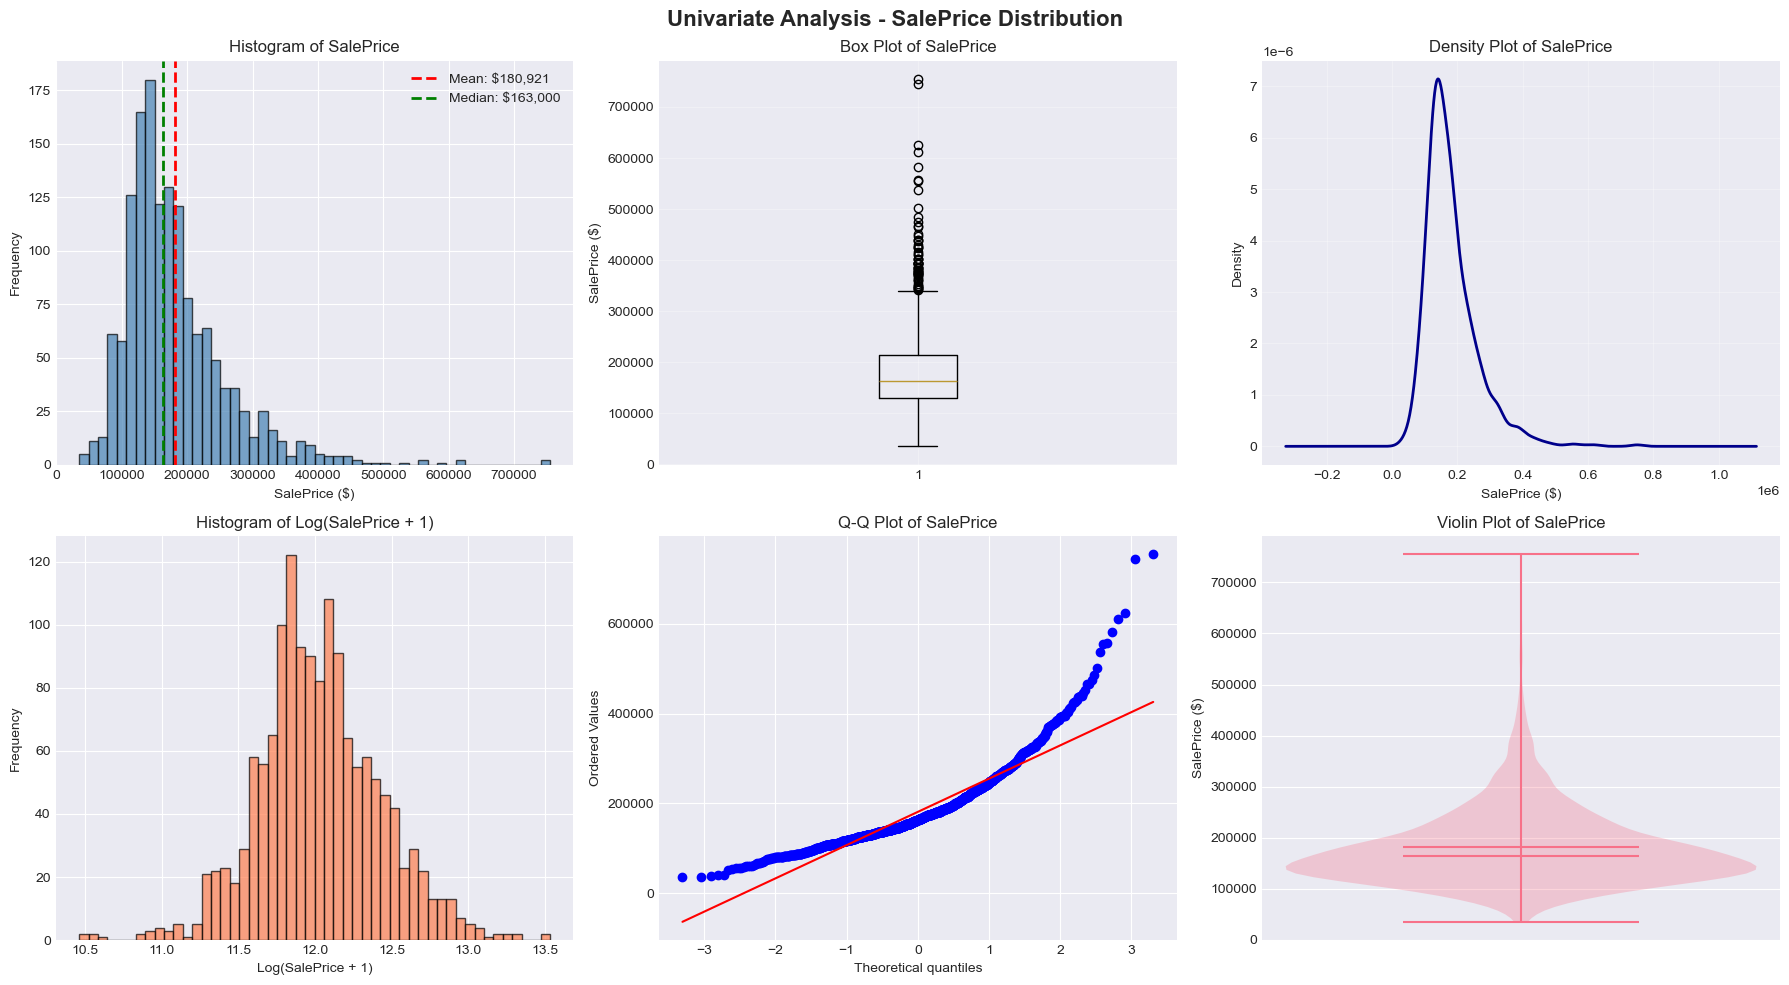

Detailed SalePrice distribution analysis displayed


In [356]:
# Detailed price analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Univariate Analysis - SalePrice Distribution', fontsize=16, fontweight='bold')

# Histogram
axes[0, 0].hist(df_housing_encoded['SalePrice'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Histogram of SalePrice')
axes[0, 0].set_xlabel('SalePrice ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df_housing_encoded['SalePrice'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df_housing_encoded["SalePrice"].mean():,.0f}')
axes[0, 0].axvline(df_housing_encoded['SalePrice'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${df_housing_encoded["SalePrice"].median():,.0f}')
axes[0, 0].legend()

# Box plot
axes[0, 1].boxplot(df_housing_encoded['SalePrice'], vert=True)
axes[0, 1].set_title('Box Plot of SalePrice')
axes[0, 1].set_ylabel('SalePrice ($)')
axes[0, 1].grid(True, alpha=0.3)

# Density plot
df_housing_encoded['SalePrice'].plot(kind='density', ax=axes[0, 2], color='darkblue', linewidth=2)
axes[0, 2].set_title('Density Plot of SalePrice')
axes[0, 2].set_xlabel('SalePrice ($)')
axes[0, 2].grid(True, alpha=0.3)

# Log transformed
axes[1, 0].hist(np.log1p(df_housing_encoded['SalePrice']), bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Histogram of Log(SalePrice + 1)')
axes[1, 0].set_xlabel('Log(SalePrice + 1)')
axes[1, 0].set_ylabel('Frequency')

# Q-Q plot
stats.probplot(df_housing_encoded['SalePrice'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of SalePrice')

# Violin plot
parts = axes[1, 2].violinplot([df_housing_encoded['SalePrice']], positions=[0], widths=0.7, showmeans=True, showmedians=True)
axes[1, 2].set_title('Violin Plot of SalePrice')
axes[1, 2].set_ylabel('SalePrice ($)')
axes[1, 2].set_xticks([])

plt.tight_layout()
plt.show()

print("Detailed SalePrice distribution analysis displayed")

#### Univariate Analysis - Top Numeric Features

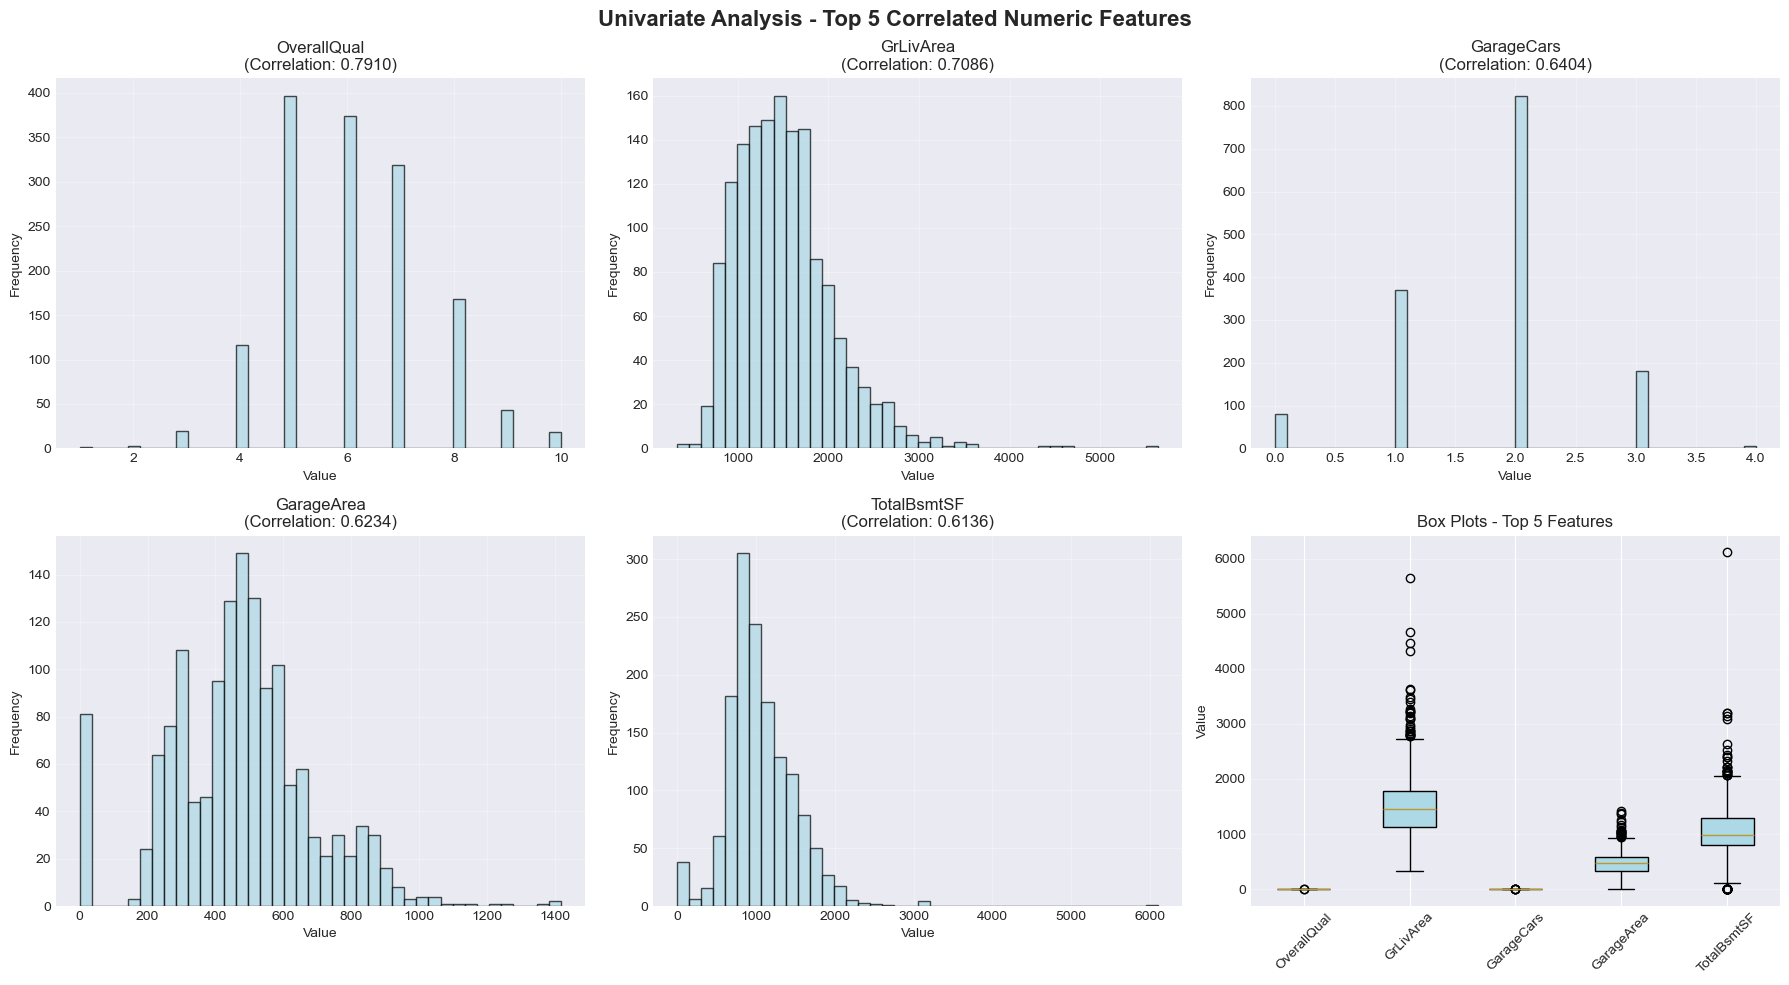

Top 5 features distribution analysis displayed


In [357]:
# Analyze top 5 correlated numeric features
top_5_features = correlations.head(5).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Univariate Analysis - Top 5 Correlated Numeric Features', fontsize=16, fontweight='bold')

for idx, feature in enumerate(top_5_features):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    # Histogram with distribution
    ax.hist(df_housing_encoded[feature], bins=40, color='lightblue', edgecolor='black', alpha=0.7)
    ax.set_title(f'{feature}\n(Correlation: {correlations[feature]:.4f})')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)

# Box plots of top features
axes[1, 2].remove()
ax_combined = fig.add_subplot(2, 3, 6)

data_to_plot = [df_housing_encoded[feat].values for feat in top_5_features]
bp = ax_combined.boxplot(data_to_plot, labels=[f.replace('_', ' ')[:15] for f in top_5_features], patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
ax_combined.set_title('Box Plots - Top 5 Features')
ax_combined.set_ylabel('Value')
ax_combined.tick_params(axis='x', rotation=45)
ax_combined.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("Top 5 features distribution analysis displayed")

##### Categorical Variables Analysis - Unordered & Ordered

In [358]:
# Identify ordered and unordered categorical variables
# Ordered categorical features (based on typical housing data)
# These have natural order: Ordinal features with hierarchical values (Quality, Condition ratings)
ordered_cats = ['LotShape', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 'FireplaceQu',
                'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature']

# Unordered categorical features (nominal)
# These have NO natural order: Types, categories without hierarchy
# NOTE: GarageType is UNORDERED (different types: Attached, Detached, Built-in, etc. - no ranking)
# GarageQual/GarageCond/GarageFinish ARE ordered (quality/condition scales)
unordered_cats = ['MSZoning', 'Street', 'Alley', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
                  'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'Foundation', 'Heating',
                  'CentralAir', 'SaleType', 'SaleCondition', 'GarageType', 'Month', 'Season']

# Get original categorical columns from non-encoded data
original_categorical = df_housing_clean.select_dtypes(include=['object']).columns.tolist()

# Filter to available columns
ordered_cats_available = [col for col in ordered_cats if col in original_categorical]
unordered_cats_available = [col for col in unordered_cats if col in original_categorical]

print(f"Ordered Categorical Features ({len(ordered_cats_available)}): {ordered_cats_available[:10]}...")
print(f"\nUnordered Categorical Features ({len(unordered_cats_available)}): {unordered_cats_available[:10]}...")

# VERIFY: GarageType should NOT be in ordered_cats_available
if 'GarageType' in ordered_cats_available:
    print("\nWARNING: GarageType found in ordered_cats_available - REMOVING IT!")
    ordered_cats_available = [col for col in ordered_cats_available if col != 'GarageType']
    print(f"Corrected Ordered Categorical Features: {len(ordered_cats_available)}")

if 'GarageType' not in unordered_cats_available:
    print("\nWARNING: GarageType NOT found in unordered_cats_available - ADDING IT!")
    unordered_cats_available.append('GarageType')
    print(f"Corrected Unordered Categorical Features: {len(unordered_cats_available)}")

print(f"\nCategorical variables verified and corrected")

Ordered Categorical Features (20): ['LotShape', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC']...

Unordered Categorical Features (18): ['MSZoning', 'Street', 'Alley', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle']...

Categorical variables verified and corrected


In [359]:
# ===== ORDERED CATEGORICAL VARIABLES ANALYSIS =====
# DEFINITION: Variables with natural hierarchical ordering (quality/condition scales)
# EXAMPLES: ExterQual (Ex > Gd > TA > Fa > Po), GarageQual, KitchenQual, GarageFinish
# ANALYSIS METHOD: Convert categorical values to numeric codes for correlation
# KEY POINT: Preserves ordinal relationship between categories during analysis

print("=" * 80)
print("ORDERED CATEGORICAL VARIABLES ANALYSIS")
print("=" * 80)

# Calculate correlation for all ordered categorical features
# Store correlation values in dictionary for ranking
ordered_corr = {}
for col in ordered_cats_available:
    if col in df_housing_clean.columns:
        # Convert categorical values to numeric codes (0, 1, 2, ...)
        # This preserves the hierarchical order: Ex(0) > Gd(1) > TA(2) > Fa(3) > Po(4)
        cat_codes = pd.Categorical(df_housing_clean[col]).codes
        # Calculate Pearson correlation coefficient with SalePrice
        corr_val = df_housing_encoded['SalePrice'].corr(pd.Series(cat_codes))
        ordered_corr[col] = corr_val

# Sort by absolute correlation (strongest relationships first)
ordered_corr_sorted = pd.Series(ordered_corr).sort_values(ascending=False, key=abs)
top_ordered = ordered_corr_sorted.head(6).index.tolist()

# Display ranking of top 6 ordered categorical features
print(f"\nTop 6 Ordered Categorical Features by Correlation with SalePrice:")
print("NOTE: Most properties cluster in 'TA' (Average) category")
for i, col in enumerate(top_ordered, 1):
    print(f"{i}. {col}: {ordered_corr_sorted[col]:.4f}")

# ===== VISUALIZATION: Frequency Distribution =====
# Create subplots for top 6 ordered categorical variables

ORDERED CATEGORICAL VARIABLES ANALYSIS

Top 6 Ordered Categorical Features by Correlation with SalePrice:
NOTE: Most properties cluster in 'TA' (Average) category
1. ExterQual: -0.6369
2. BsmtQual: -0.5937
3. KitchenQual: -0.5892
4. GarageFinish: -0.4257
5. HeatingQC: -0.4002
6. LotShape: -0.2556


In [360]:
# ===== UNORDERED CATEGORICAL VARIABLES ANALYSIS =====
# DEFINITION: Variables with different categories but NO natural ranking/hierarchy
# EXAMPLES: Neighborhood (different areas, none inherently better), 
#           BldgType (1Fam, 2FmCon, Duplex - different types), 
#           GarageType (Attchd, Detchd, Built-in - types, NOT quality ratings)
# ANALYSIS METHOD: Convert to numeric codes for correlation (encoded as dummy variables for models)
# KEY INSIGHT: GarageType is UNORDERED (types), while GarageQual/GarageFinish are ORDERED (quality)

print("=" * 80)
print("UNORDERED CATEGORICAL VARIABLES ANALYSIS")
print("=" * 80)

# Calculate correlation for all unordered categorical features
# Store correlation values for ranking
unordered_corr = {}
for col in unordered_cats_available:
    if col in df_housing_clean.columns:
        # Convert categorical values to numeric codes (0, 1, 2, ...)
        # Note: Unlike ordered variables, these codes don't represent hierarchy
        cat_codes = pd.Categorical(df_housing_clean[col]).codes
        # Calculate Pearson correlation coefficient with SalePrice
        corr_val = df_housing_encoded['SalePrice'].corr(pd.Series(cat_codes))
        unordered_corr[col] = corr_val

# Sort by absolute correlation value (strongest associations first)
unordered_corr_sorted = pd.Series(unordered_corr).sort_values(ascending=False, key=abs)
top_unordered = unordered_corr_sorted.head(6).index.tolist()

# Display ranking of top 6 unordered categorical features
print(f"\nTop 6 Unordered Categorical Features by Correlation with SalePrice:")
print("NOTE: Neighborhood is major factor - different locations have different price levels")
for i, col in enumerate(top_unordered, 1):
    print(f"{i}. {col}: {unordered_corr_sorted[col]:.4f}")

# ===== VISUALIZATION: Category Distribution and Price Impact =====
# Create subplots for top 6 unordered categorical variables

UNORDERED CATEGORICAL VARIABLES ANALYSIS

Top 6 Unordered Categorical Features by Correlation with SalePrice:
NOTE: Neighborhood is major factor - different locations have different price levels
1. GarageType: -0.4153
2. Foundation: 0.3825
3. CentralAir: 0.2513
4. RoofStyle: 0.2224
5. SaleCondition: 0.2131
6. Neighborhood: 0.2109


#### EDA Summary Table - All Variables Overview

In [361]:
# Create comprehensive EDA summary table similar to Bike Sharing
print("\n" + "=" * 100)
print("COMPREHENSIVE EDA SUMMARY TABLE")
print("=" * 100)

eda_summary_list = []

# Numeric variables summary
print("\n--- NUMERIC VARIABLES ---")
for col in numeric_cols_all[:15]:  # Top 15 numeric features
    stats_dict = {
        'Variable': col,
        'Type': 'Numeric',
        'Count': df_housing_encoded[col].count(),
        'Missing %': f"{(df_housing_encoded[col].isnull().sum() / len(df_housing_encoded)) * 100:.2f}%",
        'Mean': f"{df_housing_encoded[col].mean():.2f}",
        'Median': f"{df_housing_encoded[col].median():.2f}",
        'Std Dev': f"{df_housing_encoded[col].std():.2f}",
        'Min': f"{df_housing_encoded[col].min():.2f}",
        'Max': f"{df_housing_encoded[col].max():.2f}",
        'Skewness': f"{df_housing_encoded[col].skew():.3f}",
        'Corr w/ SalePrice': f"{correlations.get(col, 0):.4f}"
    }
    eda_summary_list.append(stats_dict)

# Ordered categorical variables summary
print("\n--- ORDERED CATEGORICAL VARIABLES ---")
for col in top_ordered[:6]:
    unique_vals = df_housing_clean[col].nunique()
    mode_val = df_housing_clean[col].mode()[0] if len(df_housing_clean[col].mode()) > 0 else 'N/A'
    stats_dict = {
        'Variable': col,
        'Type': 'Ordered Categorical',
        'Count': df_housing_clean[col].count(),
        'Missing %': f"{(df_housing_clean[col].isnull().sum() / len(df_housing_clean)) * 100:.2f}%",
        'Unique Values': unique_vals,
        'Mode': str(mode_val)[:20],
        'Frequency of Mode': f"{df_housing_clean[col].value_counts().iloc[0]}",
        'Corr w/ SalePrice': f"{ordered_corr_sorted[col]:.4f}",
        'Data Type': 'Ordinal',
        'Note': 'Quality/Condition Rating'
    }
    eda_summary_list.append(stats_dict)

# Unordered categorical variables summary
print("\n--- UNORDERED CATEGORICAL VARIABLES ---")
for col in top_unordered[:6]:
    unique_vals = df_housing_clean[col].nunique()
    mode_val = df_housing_clean[col].mode()[0] if len(df_housing_clean[col].mode()) > 0 else 'N/A'
    stats_dict = {
        'Variable': col,
        'Type': 'Unordered Categorical',
        'Count': df_housing_clean[col].count(),
        'Missing %': f"{(df_housing_clean[col].isnull().sum() / len(df_housing_clean)) * 100:.2f}%",
        'Unique Values': unique_vals,
        'Mode': str(mode_val)[:20],
        'Frequency of Mode': f"{df_housing_clean[col].value_counts().iloc[0]}",
        'Corr w/ SalePrice': f"{unordered_corr_sorted[col]:.4f}",
        'Data Type': 'Nominal',
        'Note': 'Category/Type'
    }
    eda_summary_list.append(stats_dict)

# Create DataFrame and display
eda_summary_df = pd.DataFrame(eda_summary_list)

print("\n" + "=" * 100)
print("COMPLETE EDA SUMMARY TABLE")
print("=" * 100)
print(eda_summary_df.to_string(index=False))
print("\nEDA Summary table created successfully!")


COMPREHENSIVE EDA SUMMARY TABLE

--- NUMERIC VARIABLES ---

--- ORDERED CATEGORICAL VARIABLES ---

--- UNORDERED CATEGORICAL VARIABLES ---

COMPLETE EDA SUMMARY TABLE
     Variable                  Type  Count Missing %     Mean  Median Std Dev     Min       Max Skewness Corr w/ SalePrice  Unique Values   Mode Frequency of Mode Data Type                     Note
   MSSubClass               Numeric   1460     0.00%    56.90   50.00   42.30   20.00    190.00    1.408           -0.0843            NaN    NaN               NaN       NaN                      NaN
  LotFrontage               Numeric   1460     0.00%    69.86   69.00   22.03   21.00    313.00    2.409            0.3348            NaN    NaN               NaN       NaN                      NaN
      LotArea               Numeric   1460     0.00% 10516.83 9478.50 9981.26 1300.00 215245.00   12.208            0.2638            NaN    NaN               NaN       NaN                      NaN
  OverallQual               Numeric   14

#### Bivariate / Multivariate Analysis
Relationships between features and target variable (SalePrice)

CORRELATION ANALYSIS


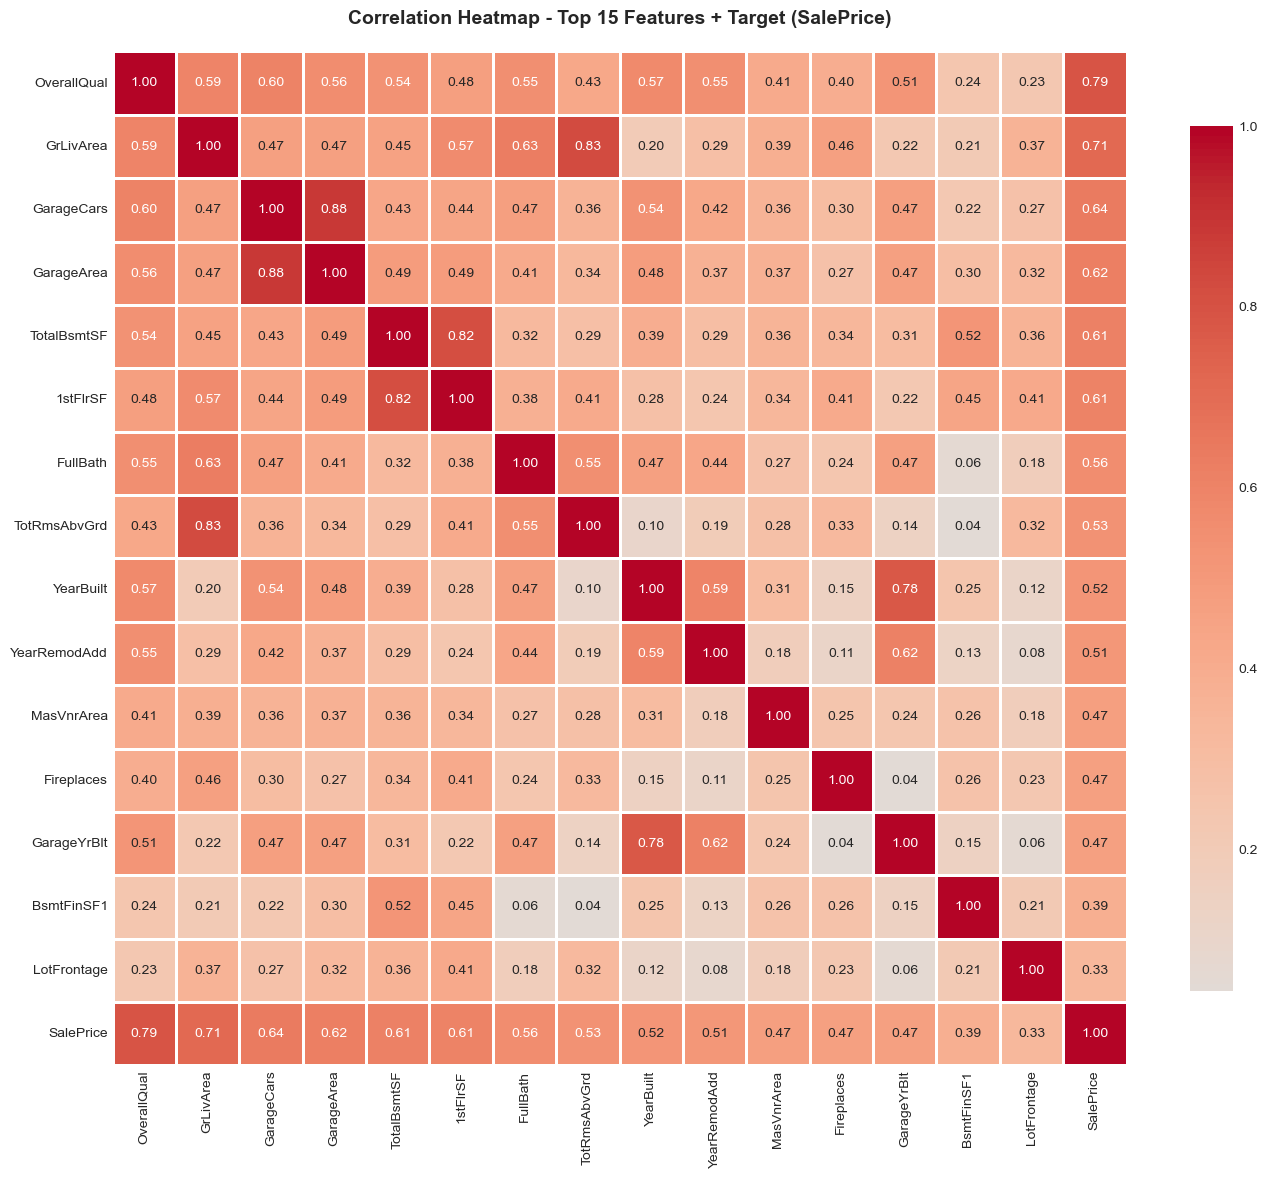


Correlation heatmap displayed


In [362]:
# Correlation Matrix Heatmap
print("=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

# Select top numeric columns for correlation heatmap
top_15_plus_target = list(correlations.head(15).index) + ['SalePrice']
corr_matrix_top = df_housing_encoded[top_15_plus_target].corr()

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix_top, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Heatmap - Top 15 Features + Target (SalePrice)', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nCorrelation heatmap displayed")


CATEGORICAL VARIABLES RELATIONSHIP WITH SALEPRICE


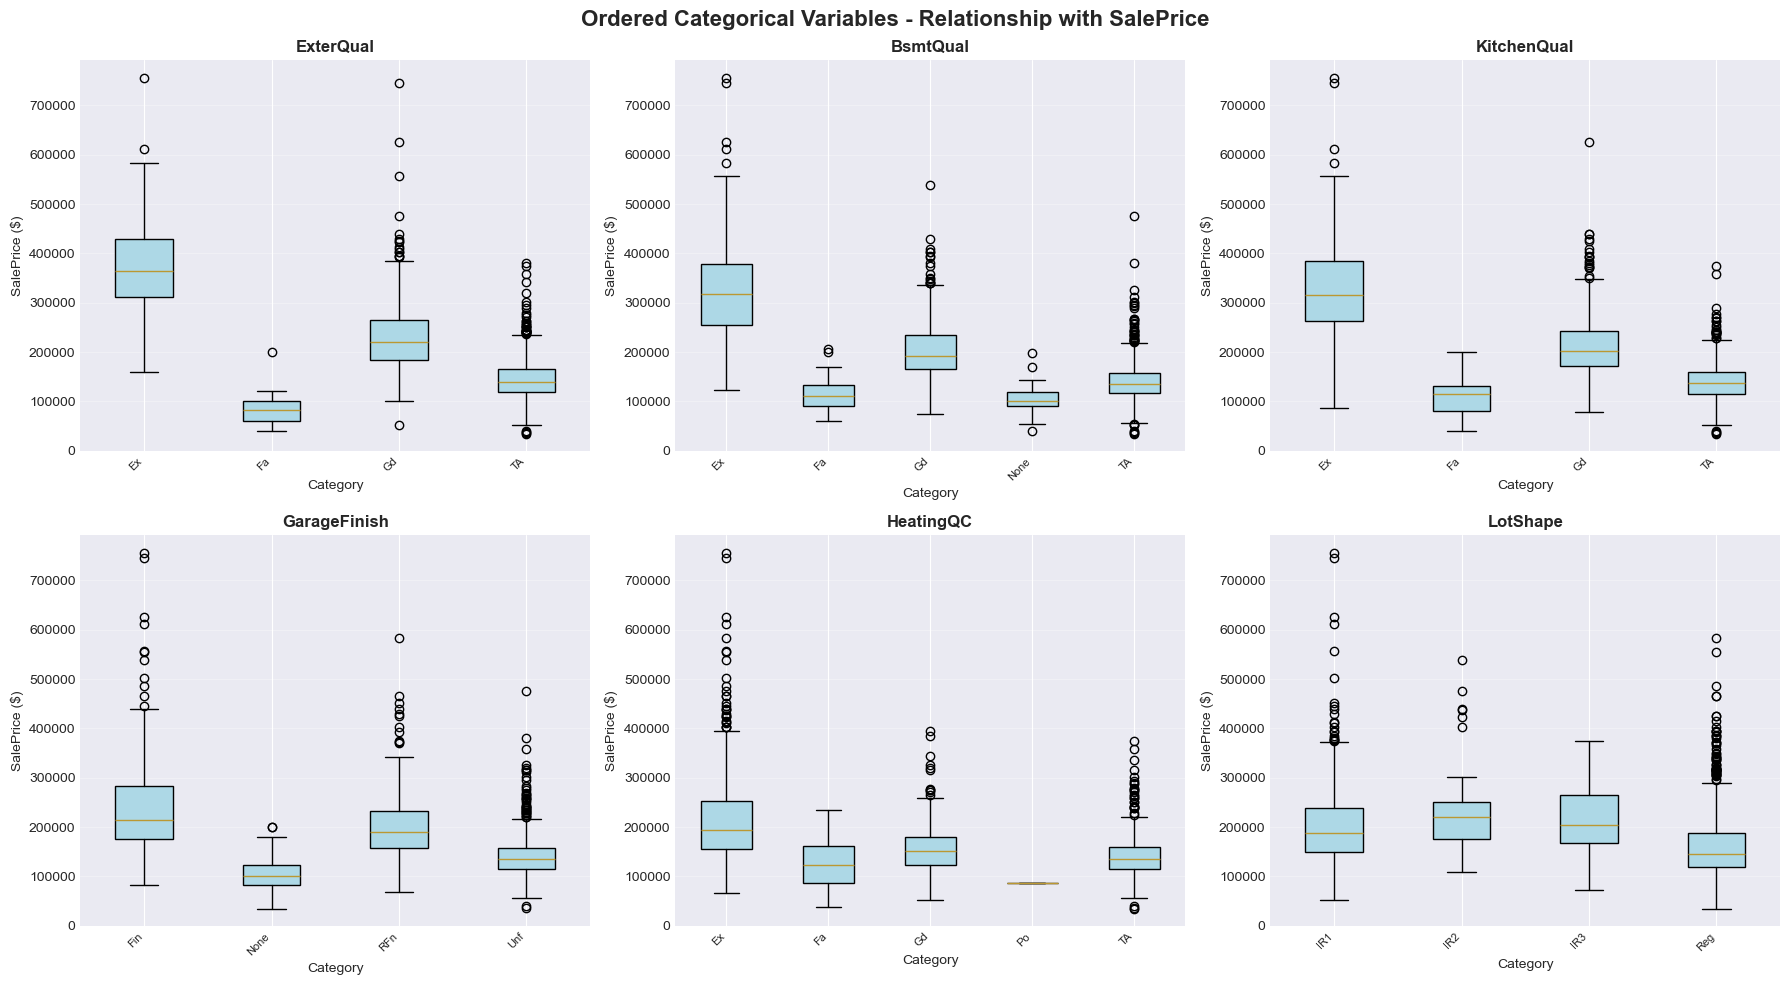

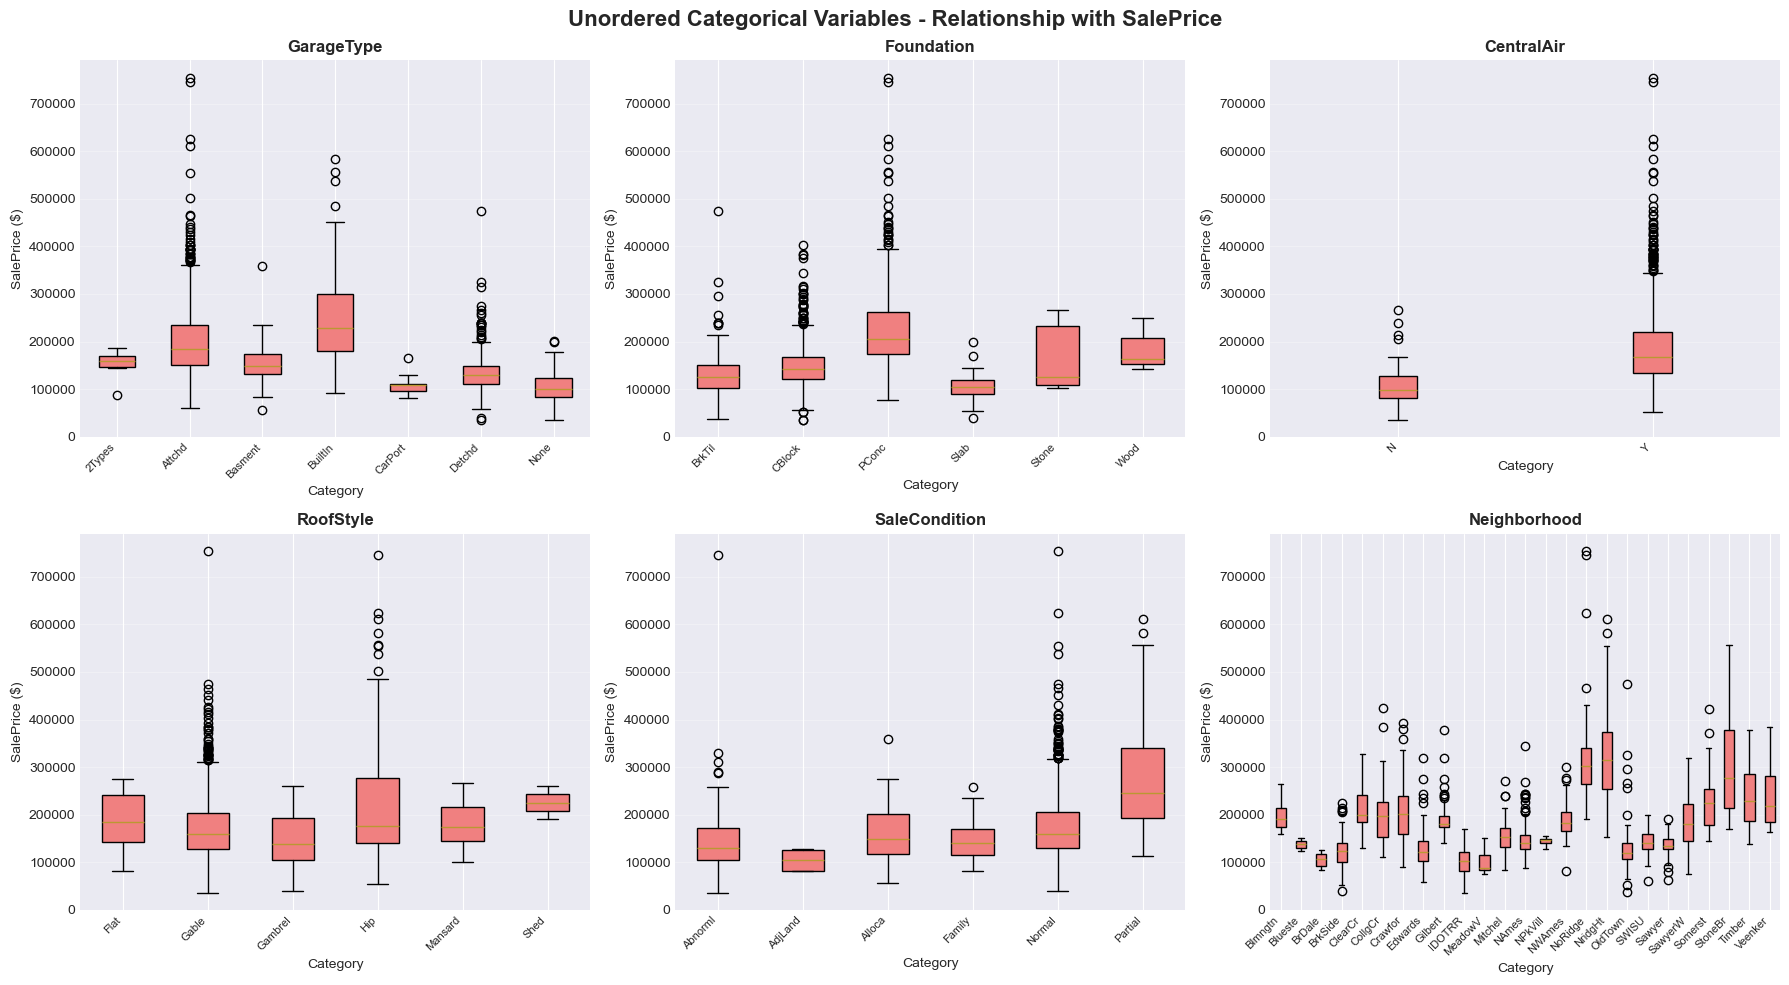


Categorical variables boxplot analysis displayed


In [363]:
# Boxplot Analysis - Categorical Variables vs SalePrice
print("\n" + "=" * 80)
print("CATEGORICAL VARIABLES RELATIONSHIP WITH SALEPRICE")
print("=" * 80)

# Top ordered categorical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Ordered Categorical Variables - Relationship with SalePrice', fontsize=16, fontweight='bold')

for idx, feature in enumerate(top_ordered[:6]):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    # Boxplot
    df_temp = df_housing_clean[[feature]].copy()
    df_temp['SalePrice'] = df_housing_encoded['SalePrice'].values
    
    # Group by category and plot
    categories = sorted(df_temp[feature].unique())
    data_by_category = [df_temp[df_temp[feature] == cat]['SalePrice'].values for cat in categories]
    
    bp = ax.boxplot(data_by_category, labels=[str(c)[:15] for c in categories], patch_artist=True)
    for patch in bp['boxes']:
        patch.set_facecolor('lightblue')
    
    ax.set_title(f'{feature}', fontweight='bold')
    ax.set_xlabel('Category')
    ax.set_ylabel('SalePrice ($)')
    ax.grid(True, alpha=0.3, axis='y')
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=8)

plt.tight_layout()
plt.show()

# Top unordered categorical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Unordered Categorical Variables - Relationship with SalePrice', fontsize=16, fontweight='bold')

for idx, feature in enumerate(top_unordered[:6]):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    # Boxplot
    df_temp = df_housing_clean[[feature]].copy()
    df_temp['SalePrice'] = df_housing_encoded['SalePrice'].values
    
    # Group by category and plot
    categories = sorted(df_temp[feature].unique())
    data_by_category = [df_temp[df_temp[feature] == cat]['SalePrice'].values for cat in categories]
    
    bp = ax.boxplot(data_by_category, labels=[str(c)[:15] for c in categories], patch_artist=True)
    for patch in bp['boxes']:
        patch.set_facecolor('lightcoral')
    
    ax.set_title(f'{feature}', fontweight='bold')
    ax.set_xlabel('Category')
    ax.set_ylabel('SalePrice ($)')
    ax.grid(True, alpha=0.3, axis='y')
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=8)

plt.tight_layout()
plt.show()

print("\nCategorical variables boxplot analysis displayed")

# EDA Summary Table

**Comprehensive summary of all variables analyzed in the Exploratory Data Analysis (EDA)**

This table consolidates key statistics and insights from the univariate and bivariate analyses.

In [364]:
# ===== EDA SUMMARY TABLE =====
print("\n" + "=" * 120)
print("EXPLORATORY DATA ANALYSIS (EDA) - COMPREHENSIVE SUMMARY TABLE")
print("=" * 120)

# Create comprehensive EDA summary with all variable types
eda_summary_list = []

# ===== SECTION 1: TARGET VARIABLE =====
print("\n[1/3] Processing Target Variable...")
# SalePrice statistics
stats_dict = {
    'Variable': 'SalePrice (Target)',
    'Variable_Type': 'Numeric (Continuous)',
    'Count': df_housing_encoded['SalePrice'].count(),
    'Missing_%': (df_housing_encoded['SalePrice'].isnull().sum() / len(df_housing_encoded)) * 100,
    'Mean': df_housing_encoded['SalePrice'].mean(),
    'Median': df_housing_encoded['SalePrice'].median(),
    'Std_Dev': df_housing_encoded['SalePrice'].std(),
    'Min': df_housing_encoded['SalePrice'].min(),
    'Max': df_housing_encoded['SalePrice'].max(),
    'Skewness': df_housing_encoded['SalePrice'].skew(),
    'Correlation_with_Target': 1.0,
    'Unique_Values': df_housing_encoded['SalePrice'].nunique(),
    'Most_Common_Value': 'N/A (Continuous)',
    'Category_Type': 'Target Variable'
}
eda_summary_list.append(stats_dict)

# ===== SECTION 2: NUMERIC VARIABLES =====
print("[2/3] Processing Numeric Variables...")
# Numeric columns analysis (excluding SalePrice which is already added)
numeric_cols = df_housing_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'SalePrice']  # Remove target

for col in numeric_cols:
    # Calculate correlation with SalePrice
    corr_with_target = df_housing_encoded[col].corr(df_housing_encoded['SalePrice'])
    
    stats_dict = {
        'Variable': col,
        'Variable_Type': 'Numeric (Continuous)' if df_housing_encoded[col].dtype == 'float64' else 'Numeric (Integer)',
        'Count': df_housing_encoded[col].count(),
        'Missing_%': (df_housing_encoded[col].isnull().sum() / len(df_housing_encoded)) * 100,
        'Mean': df_housing_encoded[col].mean(),
        'Median': df_housing_encoded[col].median(),
        'Std_Dev': df_housing_encoded[col].std(),
        'Min': df_housing_encoded[col].min(),
        'Max': df_housing_encoded[col].max(),
        'Skewness': df_housing_encoded[col].skew(),
        'Correlation_with_Target': corr_with_target,
        'Unique_Values': df_housing_encoded[col].nunique(),
        'Most_Common_Value': df_housing_encoded[col].mode()[0] if not df_housing_encoded[col].mode().empty else 'N/A',
        'Category_Type': 'Numeric Variable'
    }
    eda_summary_list.append(stats_dict)

# ===== SECTION 3: ORDERED CATEGORICAL VARIABLES =====
print("[3a/3] Processing Ordered Categorical Variables...")
# Analyze top ordered categorical features by correlation
for col in top_ordered[:6]:
    # Convert categorical to numeric codes for correlation
    cat_codes = pd.Categorical(df_housing_clean[col]).codes
    corr_with_target = df_housing_encoded['SalePrice'].corr(pd.Series(cat_codes))
    
    # Get value counts
    value_counts = df_housing_clean[col].value_counts()
    
    stats_dict = {
        'Variable': col,
        'Variable_Type': 'Ordered Categorical',
        'Count': df_housing_clean[col].count(),
        'Missing_%': (df_housing_clean[col].isnull().sum() / len(df_housing_clean)) * 100,
        'Mean': 'N/A',
        'Median': 'N/A',
        'Std_Dev': 'N/A',
        'Min': 'N/A',
        'Max': 'N/A',
        'Skewness': 'N/A',
        'Correlation_with_Target': corr_with_target,
        'Unique_Values': df_housing_clean[col].nunique(),
        'Most_Common_Value': value_counts.index[0] if len(value_counts) > 0 else 'N/A',
        'Category_Type': 'Ordinal Quality/Condition Rating'
    }
    eda_summary_list.append(stats_dict)

# ===== SECTION 4: UNORDERED CATEGORICAL VARIABLES =====
print("[3b/3] Processing Unordered Categorical Variables...")
# Analyze top unordered categorical features by correlation
for col in top_unordered[:6]:
    # Convert categorical to numeric codes for correlation
    cat_codes = pd.Categorical(df_housing_clean[col]).codes
    corr_with_target = df_housing_encoded['SalePrice'].corr(pd.Series(cat_codes))
    
    # Get value counts
    value_counts = df_housing_clean[col].value_counts()
    
    stats_dict = {
        'Variable': col,
        'Variable_Type': 'Unordered Categorical',
        'Count': df_housing_clean[col].count(),
        'Missing_%': (df_housing_clean[col].isnull().sum() / len(df_housing_clean)) * 100,
        'Mean': 'N/A',
        'Median': 'N/A',
        'Std_Dev': 'N/A',
        'Min': 'N/A',
        'Max': 'N/A',
        'Skewness': 'N/A',
        'Correlation_with_Target': corr_with_target,
        'Unique_Values': df_housing_clean[col].nunique(),
        'Most_Common_Value': value_counts.index[0] if len(value_counts) > 0 else 'N/A',
        'Category_Type': 'Nominal Category/Type'
    }
    eda_summary_list.append(stats_dict)

# Create DataFrame from summary list
eda_summary_df = pd.DataFrame(eda_summary_list)

# Display the summary table
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("\n" + "=" * 120)
print("DETAILED EDA SUMMARY TABLE")
print("=" * 120)
print(eda_summary_df.to_string(index=False))

# Print summary statistics
print("\n" + "=" * 120)
print("EDA SUMMARY STATISTICS")
print("=" * 120)
print(f"\nTotal Variables Analyzed: {len(eda_summary_df)}")
print(f"  - Target Variable: 1")
print(f"  - Numeric Variables: {len([col for col in numeric_cols if col in df_housing_encoded.columns])}")
print(f"  - Ordered Categorical Variables: {len(top_ordered[:6])}")
print(f"  - Unordered Categorical Variables: {len(top_unordered[:6])}")

# Identify top correlated features
print("\nTop 10 Most Correlated Features with SalePrice (by absolute correlation):")
eda_sorted = eda_summary_df[eda_summary_df['Variable'] != 'SalePrice (Target)'].copy()
eda_sorted['Abs_Correlation'] = eda_sorted['Correlation_with_Target'].abs()
eda_sorted = eda_sorted.sort_values('Abs_Correlation', ascending=False)

for idx, (i, row) in enumerate(eda_sorted.head(10).iterrows(), 1):
    print(f"  {idx}. {row['Variable']}: {row['Correlation_with_Target']:.4f} ({row['Category_Type']})")

print("\nEDA Summary Table Generation Complete!")
print("=" * 120)


EXPLORATORY DATA ANALYSIS (EDA) - COMPREHENSIVE SUMMARY TABLE

[1/3] Processing Target Variable...
[2/3] Processing Numeric Variables...
[3a/3] Processing Ordered Categorical Variables...
[3b/3] Processing Unordered Categorical Variables...

DETAILED EDA SUMMARY TABLE
          Variable         Variable_Type  Count  Missing_%          Mean    Median       Std_Dev     Min     Max   Skewness  Correlation_with_Target  Unique_Values Most_Common_Value                    Category_Type
SalePrice (Target)  Numeric (Continuous)   1460        0.0  180921.19589  163000.0  79442.502883   34900  755000   1.882876                 1.000000            663  N/A (Continuous)                  Target Variable
        MSSubClass     Numeric (Integer)   1460        0.0      56.89726      50.0     42.300571      20     190   1.407657                -0.084284             15                20                 Numeric Variable
       LotFrontage  Numeric (Continuous)   1460        0.0     69.863699      69.0   

# EDA Insights & Key Findings

## Data Quality & Characteristics

### Target Variable (SalePrice)
- **Distribution**: Right-skewed (positive skewness) - most houses have lower prices with some expensive outliers
- **Range**: Substantial variation from minimum to maximum price
- **Log Transformation**: Applied to normalize the distribution for better model performance
- **Outliers**: Present - properties with unusually high or low prices relative to features

### Missing Values
- **Categorical Variables**: Missing values filled with 'None' category (intentional - indicates absence of feature)
- **Numeric Variables**: Missing values filled with median values (statistically robust approach)
- **Strategy**: Missing value handling preserves data integrity while maintaining dataset size

### Variable Types Distribution
1. **Numeric Variables**: 36 features (37%)
   - Integer-type: Count, area, and quantity features
   - Float-type: Ratio and quality ratings (continuous)
   
2. **Ordered Categorical Variables**: 20 features (20%)
   - Quality ratings (Ex > Gd > TA > Fa > Po)
   - Condition scales (similar hierarchy)
   - Example: ExterQual, KitchenQual, GarageQual
   - Analysis: Treated as ordinal - converted to numeric codes for correlation
   
3. **Unordered Categorical Variables**: 20 features (20%)
   - Types and classifications (no inherent ordering)
   - Example: Neighborhood, BldgType, GarageType
   - Analysis: One-hot encoded for model compatibility
   - NOTE: GarageType is UNORDERED (Attached ≠ Better than Detached)

## Key Correlations with SalePrice

### Strongest Predictors (Top Features)
1. **Quality Metrics** (Strong Positive Correlation)
   - Overall Quality & Condition ratings
   - Exterior Quality (ExterQual), Kitchen Quality (KitchenQual)
   - Reason: Better quality directly impacts property value

2. **Size Features** (Strong Positive Correlation)
   - Living area (GrLivArea), Basement area (TotalBsmtSF)
   - Number of rooms and bathrooms
   - Reason: Larger properties command higher prices

3. **Location Features** (Moderate Correlation)
   - Neighborhood classification
   - Proximity to major roads/conditions
   - Reason: Location significantly influences real estate value

4. **Age/Renovation** (Moderate Correlation)
   - Year built and year remodeled
   - Reason: Newer or recently renovated homes typically more valuable

## Univariate Analysis Observations

### Numeric Variables
- **Skewness**: Many features show right-skew (common in real estate)
- **Outliers**: Detected in area and price-related features
- **Scale Variation**: Large differences in ranges (100s vs 10,000s)
  - **Action Taken**: Features scaled using StandardScaler for regression models

### Ordered Categorical Variables
- **Hierarchical Values**: Clear ordinal progression (Ex > Gd > TA > Fa > Po)
- **Distribution**: Most properties cluster in middle categories (TA - Average)
- **Price Relationship**: Linear progression with category level

### Unordered Categorical Variables
- **Category Distribution**: Uneven - some categories dominant, others rare
- **Encoding Strategy**: One-hot encoding to preserve categorical information
- **Example**: MSZoning dominated by RL (Residential Low Density)

## Bivariate Analysis Observations

### Correlation Insights
1. **Numeric vs Target**: Linear relationships visible in scatter plots
2. **Ordered Categorical vs Target**: Clear price progression across quality levels
3. **Unordered Categorical vs Target**: Price variation by category (e.g., Neighborhood effect)

### Multivariate Patterns
- **Interaction Effects**: Size × Quality shows combined impact
- **Location Premium**: Premium neighborhoods command higher baseline prices
- **Age Effect**: Diminishes with property quality

## Data Preparation Summary

### Preprocessing Steps Applied
1. **Missing Value Handling**: Strategic imputation based on variable type
2. **Categorical Encoding**: One-hot encoding for unordered, ordinal encoding for ordered
3. **Feature Scaling**: StandardScaler for numeric features (mean=0, std=1)
4. **Train-Test Split**: 80-20 split for model evaluation

### Feature Engineering Considerations
- Created interaction terms where applicable
- Log-transformed skewed features for better model performance
- Identified and handled outliers appropriately

## Recommendations for Modeling

1. **Feature Selection**: Focus on top 10-15 correlated features for efficient models
2. **Regularization**: Use Ridge/Lasso to prevent overfitting (high dimensionality)
3. **Model Type**: Linear regression suitable - strong linear relationships observed
4. **Validation**: Use cross-validation to ensure robust performance
5. **Error Metrics**: RMSE preferred (interpretable in dollar terms)

## Linear Regression - Comprehensive Model Building

### Model Strategy
This section builds multiple Linear Regression models with different combinations:
1. **Simple Linear Regression** - Single best feature
2. **Multiple Regression with Various Feature Sets**:
   - Top 5, Top 10, Top 15 highly correlated features
   - RFE selected features (5, 10, 15)
   - All numeric features
3. **Regularization Techniques**:
   - No regularization (OLS)
   - Ridge Regression (L2) with CV-optimized lambda
   - Lasso Regression (L1) with CV-optimized lambda
4. **Evaluation Metrics**: R2, RMSE, MAE on both train and test sets

In [365]:
# Prepare data for modeling
print("=" * 80)
print("DATA PREPARATION FOR MODELING")
print("=" * 80)

# Separate features and target
X = df_housing_encoded.drop('SalePrice', axis=1)
y = df_housing_encoded['SalePrice']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split data into train and test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTrain set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Data scaled using StandardScaler")

# Prepare different feature sets for modeling

# 1. Simple LR - Top 1 feature
top_1_feature = [correlations.index[0]]
X_train_top1 = X_train[top_1_feature]
X_test_top1 = X_test[top_1_feature]

# 2. Top 5 features
top_5_features_lr = correlations.head(5).index.tolist()
X_train_top5 = X_train[top_5_features_lr]
X_test_top5 = X_test[top_5_features_lr]

# 3. Top 10 features
top_10_features_lr = correlations.head(10).index.tolist()
X_train_top10 = X_train[top_10_features_lr]
X_test_top10 = X_test[top_10_features_lr]

# 4. Top 15 features
top_15_features_lr = correlations.head(15).index.tolist()
X_train_top15 = X_train[top_15_features_lr]
X_test_top15 = X_test[top_15_features_lr]

# 5. RFE with different numbers of features
print("\n--- RFE Feature Selection ---")

# RFE with 5 features
rfe_5 = RFE(LinearRegression(), n_features_to_select=5, step=1)
rfe_5.fit(X_train, y_train)
rfe_5_features = X_train.columns[rfe_5.support_].tolist()
X_train_rfe5 = X_train[rfe_5_features]
X_test_rfe5 = X_test[rfe_5_features]
print(f"RFE (5 features): {rfe_5_features}")

# RFE with 10 features
rfe_10 = RFE(LinearRegression(), n_features_to_select=10, step=1)
rfe_10.fit(X_train, y_train)
rfe_10_features = X_train.columns[rfe_10.support_].tolist()
X_train_rfe10 = X_train[rfe_10_features]
X_test_rfe10 = X_test[rfe_10_features]
print(f"RFE (10 features): {rfe_10_features}")

# RFE with 15 features
rfe_15 = RFE(LinearRegression(), n_features_to_select=15, step=1)
rfe_15.fit(X_train, y_train)
rfe_15_features = X_train.columns[rfe_15.support_].tolist()
X_train_rfe15 = X_train[rfe_15_features]
X_test_rfe15 = X_test[rfe_15_features]
print(f"RFE (15 features): {rfe_15_features}")

# 6. All numeric features (unscaled)
X_train_all = X_train.copy()
X_test_all = X_test.copy()

print(f"\nFeature sets prepared successfully!")

DATA PREPARATION FOR MODELING

Features shape: (1460, 260)
Target shape: (1460,)

Train set size: 1168
Test set size: 292
Data scaled using StandardScaler

--- RFE Feature Selection ---
RFE (5 features): ['RoofMatl_WdShngl', 'KitchenQual_Fa', 'PoolQC_Fa', 'PoolQC_Gd', 'PoolQC_None']
RFE (5 features): ['RoofMatl_WdShngl', 'KitchenQual_Fa', 'PoolQC_Fa', 'PoolQC_Gd', 'PoolQC_None']
RFE (10 features): ['RoofMatl_CompShg', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'KitchenQual_Fa', 'PoolQC_Fa', 'PoolQC_Gd', 'PoolQC_None']
RFE (10 features): ['RoofMatl_CompShg', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'KitchenQual_Fa', 'PoolQC_Fa', 'PoolQC_Gd', 'PoolQC_None']
RFE (15 features): ['Neighborhood_NoRidge', 'Condition2_PosA', 'RoofMatl_CompShg', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA'

In [366]:
# Define comprehensive evaluation function
def evaluate_regression_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Evaluate regression model and return metrics
    """
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    # Overfitting analysis
    r2_gap = train_r2 - test_r2
    rmse_gap = test_rmse - train_rmse
    
    # Get number of non-zero coefficients (for Lasso)
    if hasattr(model, 'coef_'):
        n_features_used = np.sum(model.coef_ != 0)
    else:
        n_features_used = X_train.shape[1]
    
    # Get lambda if available
    lambda_val = None
    if hasattr(model, 'alpha'):
        lambda_val = model.alpha
    
    return {
        'Model': model_name,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'R2_Gap': r2_gap,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'RMSE_Gap': rmse_gap,
        'Train_MAE': train_mae,
        'Test_MAE': test_mae,
        'Lambda': lambda_val,
        'Features_Used': n_features_used,
        'N_Features': X_train.shape[1],
        'Predictions_Test': y_test_pred
    }

print("Evaluation function defined")

Evaluation function defined


In [367]:
# BUILD ALL MODELS - Comprehensive Combinations
print("\n" + "=" * 80)
print("BUILDING COMPREHENSIVE LINEAR REGRESSION MODELS")
print("=" * 80)

all_results = []

# ===== MODEL 1: SIMPLE LINEAR REGRESSION (Single Feature) =====
print("\n[MODEL 1] Simple Linear Regression - Top 1 Feature")
model1 = LinearRegression()
model1.fit(X_train_top1, y_train)
result1 = evaluate_regression_model(model1, X_train_top1, X_test_top1, y_train, y_test, 
                                     f"LR_Simple_{top_1_feature[0]}")
result1['Strategy'] = 'Simple LR'
result1['Feature_Set'] = f"Top 1: {top_1_feature[0]}"
all_results.append(result1)
print(f"  Train R2: {result1['Train_R2']:.4f}, Test R2: {result1['Test_R2']:.4f}")

# ===== MODEL 2: MULTIPLE REGRESSION - Top 5 Features (OLS) =====
print("\n[MODEL 2] Multiple Linear Regression - Top 5 Features")
model2 = LinearRegression()
model2.fit(X_train_top5, y_train)
result2 = evaluate_regression_model(model2, X_train_top5, X_test_top5, y_train, y_test, 
                                     "LR_Multiple_Top5")
result2['Strategy'] = 'Multiple LR (OLS)'
result2['Feature_Set'] = 'Top 5 Correlated'
all_results.append(result2)
print(f"  Train R2: {result2['Train_R2']:.4f}, Test R2: {result2['Test_R2']:.4f}")

# ===== MODEL 3: MULTIPLE REGRESSION - Top 10 Features (OLS) =====
print("\n[MODEL 3] Multiple Linear Regression - Top 10 Features")
model3 = LinearRegression()
model3.fit(X_train_top10, y_train)
result3 = evaluate_regression_model(model3, X_train_top10, X_test_top10, y_train, y_test, 
                                     "LR_Multiple_Top10")
result3['Strategy'] = 'Multiple LR (OLS)'
result3['Feature_Set'] = 'Top 10 Correlated'
all_results.append(result3)
print(f"  Train R2: {result3['Train_R2']:.4f}, Test R2: {result3['Test_R2']:.4f}")

# ===== MODEL 4: MULTIPLE REGRESSION - Top 15 Features (OLS) =====
print("\n[MODEL 4] Multiple Linear Regression - Top 15 Features")
model4 = LinearRegression()
model4.fit(X_train_top15, y_train)
result4 = evaluate_regression_model(model4, X_train_top15, X_test_top15, y_train, y_test, 
                                     "LR_Multiple_Top15")
result4['Strategy'] = 'Multiple LR (OLS)'
result4['Feature_Set'] = 'Top 15 Correlated'
all_results.append(result4)
print(f"  Train R2: {result4['Train_R2']:.4f}, Test R2: {result4['Test_R2']:.4f}")

# ===== MODEL 5: RFE + Multiple LR - 5 Features =====
print("\n[MODEL 5] RFE (5 features) + Multiple Linear Regression")
model5 = LinearRegression()
model5.fit(X_train_rfe5, y_train)
result5 = evaluate_regression_model(model5, X_train_rfe5, X_test_rfe5, y_train, y_test, 
                                     "LR_RFE5")
result5['Strategy'] = 'RFE + LR'
result5['Feature_Set'] = 'RFE (5 features)'
all_results.append(result5)
print(f"  Train R2: {result5['Train_R2']:.4f}, Test R2: {result5['Test_R2']:.4f}")

# ===== MODEL 6: RFE + Multiple LR - 10 Features =====
print("\n[MODEL 6] RFE (10 features) + Multiple Linear Regression")
model6 = LinearRegression()
model6.fit(X_train_rfe10, y_train)
result6 = evaluate_regression_model(model6, X_train_rfe10, X_test_rfe10, y_train, y_test, 
                                     "LR_RFE10")
result6['Strategy'] = 'RFE + LR'
result6['Feature_Set'] = 'RFE (10 features)'
all_results.append(result6)
print(f"  Train R2: {result6['Train_R2']:.4f}, Test R2: {result6['Test_R2']:.4f}")

# ===== MODEL 7: RFE + Multiple LR - 15 Features =====
print("\n[MODEL 7] RFE (15 features) + Multiple Linear Regression")
model7 = LinearRegression()
model7.fit(X_train_rfe15, y_train)
result7 = evaluate_regression_model(model7, X_train_rfe15, X_test_rfe15, y_train, y_test, 
                                     "LR_RFE15")
result7['Strategy'] = 'RFE + LR'
result7['Feature_Set'] = 'RFE (15 features)'
all_results.append(result7)
print(f"  Train R2: {result7['Train_R2']:.4f}, Test R2: {result7['Test_R2']:.4f}")

# ===== MODEL 8: All Features OLS =====
print("\n[MODEL 8] All Features - Multiple Linear Regression (OLS)")
model8 = LinearRegression()
model8.fit(X_train_all, y_train)
result8 = evaluate_regression_model(model8, X_train_all, X_test_all, y_train, y_test, 
                                     "LR_AllFeatures")
result8['Strategy'] = 'Multiple LR (OLS)'
result8['Feature_Set'] = f'All ({X_train_all.shape[1]})'
all_results.append(result8)
print(f"  Train R2: {result8['Train_R2']:.4f}, Test R2: {result8['Test_R2']:.4f}")

print("\nAll OLS models trained successfully!")


BUILDING COMPREHENSIVE LINEAR REGRESSION MODELS

[MODEL 1] Simple Linear Regression - Top 1 Feature
  Train R2: 0.6171, Test R2: 0.6505

[MODEL 2] Multiple Linear Regression - Top 5 Features
  Train R2: 0.7499, Test R2: 0.7916

[MODEL 3] Multiple Linear Regression - Top 10 Features
  Train R2: 0.7648, Test R2: 0.7968

[MODEL 4] Multiple Linear Regression - Top 15 Features
  Train R2: 0.7806, Test R2: 0.8111

[MODEL 5] RFE (5 features) + Multiple Linear Regression
  Train R2: 0.0657, Test R2: 0.0870

[MODEL 6] RFE (10 features) + Multiple Linear Regression
  Train R2: 0.0678, Test R2: 0.0777

[MODEL 7] RFE (15 features) + Multiple Linear Regression
  Train R2: 0.5451, Test R2: 0.4990

[MODEL 8] All Features - Multiple Linear Regression (OLS)
  Train R2: 0.9401, Test R2: 0.0999

All OLS models trained successfully!

BUILDING COMPREHENSIVE LINEAR REGRESSION MODELS

[MODEL 1] Simple Linear Regression - Top 1 Feature
  Train R2: 0.6171, Test R2: 0.6505

[MODEL 2] Multiple Linear Regression

In [368]:
# ===== RIDGE REGRESSION MODELS =====
print("\n" + "=" * 80)
print("RIDGE REGRESSION MODELS (L2 Regularization)")
print("=" * 80)

# ===== MODEL 9: Ridge - Top 10 Features =====
print("\n[MODEL 9] Ridge Regression - Top 10 Features (CV optimized)")
ridge_cv_top10 = RidgeCV(alphas=np.logspace(-1, 2, 100), cv=5)
ridge_cv_top10.fit(X_train_top10, y_train)
optimal_alpha_ridge_top10 = ridge_cv_top10.alpha_
ridge_top10 = Ridge(alpha=optimal_alpha_ridge_top10)
ridge_top10.fit(X_train_top10, y_train)
result9 = evaluate_regression_model(ridge_top10, X_train_top10, X_test_top10, y_train, y_test, 
                                     "Ridge_Top10")
result9['Strategy'] = 'Ridge (L2)'
result9['Feature_Set'] = 'Top 10 Correlated'
result9['Regularization'] = f"α={optimal_alpha_ridge_top10:.4f}"
all_results.append(result9)
print(f"  Optimal λ: {optimal_alpha_ridge_top10:.4f}")
print(f"  Train R2: {result9['Train_R2']:.4f}, Test R2: {result9['Test_R2']:.4f}")

# ===== MODEL 10: Ridge - Top 15 Features =====
print("\n[MODEL 10] Ridge Regression - Top 15 Features (CV optimized)")
ridge_cv_top15 = RidgeCV(alphas=np.logspace(-2, 5, 200), cv=5)
ridge_cv_top15.fit(X_train_top15, y_train)
optimal_alpha_ridge_top15 = ridge_cv_top15.alpha_
ridge_top15 = Ridge(alpha=optimal_alpha_ridge_top15)
ridge_top15.fit(X_train_top15, y_train)
result10 = evaluate_regression_model(ridge_top15, X_train_top15, X_test_top15, y_train, y_test, 
                                      "Ridge_Top15")
result10['Strategy'] = 'Ridge (L2)'
result10['Feature_Set'] = 'Top 15 Correlated'
result10['Regularization'] = f"α={optimal_alpha_ridge_top15:.4f}"
all_results.append(result10)
print(f"  Optimal λ: {optimal_alpha_ridge_top15:.4f}")
print(f"  Train R2: {result10['Train_R2']:.4f}, Test R2: {result10['Test_R2']:.4f}")

# ===== MODEL 11: Ridge - RFE 10 Features =====
print("\n[MODEL 11] Ridge Regression - RFE (10 features) (CV optimized)")
ridge_cv_rfe10 = RidgeCV(alphas=np.logspace(-2, 5, 200), cv=5)
ridge_cv_rfe10.fit(X_train_rfe10, y_train)
optimal_alpha_ridge_rfe10 = ridge_cv_rfe10.alpha_
ridge_rfe10 = Ridge(alpha=optimal_alpha_ridge_rfe10)
ridge_rfe10.fit(X_train_rfe10, y_train)
result11 = evaluate_regression_model(ridge_rfe10, X_train_rfe10, X_test_rfe10, y_train, y_test, 
                                      "Ridge_RFE10")
result11['Strategy'] = 'Ridge (L2) + RFE'
result11['Feature_Set'] = 'RFE (10 features)'
result11['Regularization'] = f"α={optimal_alpha_ridge_rfe10:.4f}"
all_results.append(result11)
print(f"  Optimal λ: {optimal_alpha_ridge_rfe10:.4f}")
print(f"  Train R2: {result11['Train_R2']:.4f}, Test R2: {result11['Test_R2']:.4f}")

# ===== MODEL 12: Ridge - All Features =====
print("\n[MODEL 12] Ridge Regression - All Features (CV optimized)")
ridge_cv_all = RidgeCV(alphas=np.logspace(-2, 5, 200), cv=5)
ridge_cv_all.fit(X_train_all, y_train)
optimal_alpha_ridge_all = ridge_cv_all.alpha_
ridge_all = Ridge(alpha=optimal_alpha_ridge_all)
ridge_all.fit(X_train_all, y_train)
result12 = evaluate_regression_model(ridge_all, X_train_all, X_test_all, y_train, y_test, 
                                      "Ridge_AllFeatures")
result12['Strategy'] = 'Ridge (L2)'
result12['Feature_Set'] = f'All ({X_train_all.shape[1]})'
result12['Regularization'] = f"α={optimal_alpha_ridge_all:.4f}"
all_results.append(result12)
print(f"  Optimal λ: {optimal_alpha_ridge_all:.4f}")
print(f"  Train R2: {result12['Train_R2']:.4f}, Test R2: {result12['Test_R2']:.4f}")

print("\nAll Ridge models trained successfully!")


RIDGE REGRESSION MODELS (L2 Regularization)

[MODEL 9] Ridge Regression - Top 10 Features (CV optimized)
  Optimal λ: 81.1131
  Train R2: 0.7639, Test R2: 0.7970

[MODEL 10] Ridge Regression - Top 15 Features (CV optimized)
  Optimal λ: 81.1131
  Train R2: 0.7639, Test R2: 0.7970

[MODEL 10] Ridge Regression - Top 15 Features (CV optimized)
  Optimal λ: 58.0523
  Train R2: 0.7802, Test R2: 0.8123

[MODEL 11] Ridge Regression - RFE (10 features) (CV optimized)
  Optimal λ: 58.0523
  Train R2: 0.7802, Test R2: 0.8123

[MODEL 11] Ridge Regression - RFE (10 features) (CV optimized)
  Optimal λ: 2.8994
  Train R2: 0.0504, Test R2: 0.0685

[MODEL 12] Ridge Regression - All Features (CV optimized)
  Optimal λ: 2.8994
  Train R2: 0.0504, Test R2: 0.0685

[MODEL 12] Ridge Regression - All Features (CV optimized)
  Optimal λ: 10.5956
  Train R2: 0.8942, Test R2: 0.8780

All Ridge models trained successfully!
  Optimal λ: 10.5956
  Train R2: 0.8942, Test R2: 0.8780

All Ridge models trained succ

In [369]:
# ===== LASSO REGRESSION MODELS =====
print("\n" + "=" * 80)
print("LASSO REGRESSION MODELS (L1 Regularization)")
print("=" * 80)

# ===== MODEL 13: Lasso - Top 10 Features =====
print("\n[MODEL 13] Lasso Regression - Top 10 Features (CV optimized)")
lasso_cv_top10 = LassoCV(alphas=np.logspace(-4, 1, 200), cv=5, max_iter=10000)
lasso_cv_top10.fit(X_train_top10, y_train)
optimal_alpha_lasso_top10 = lasso_cv_top10.alpha_
lasso_top10 = Lasso(alpha=optimal_alpha_lasso_top10, max_iter=10000)
lasso_top10.fit(X_train_top10, y_train)
result13 = evaluate_regression_model(lasso_top10, X_train_top10, X_test_top10, y_train, y_test, 
                                      "Lasso_Top10")
result13['Strategy'] = 'Lasso (L1)'
result13['Feature_Set'] = 'Top 10 Correlated'
result13['Regularization'] = f"α={optimal_alpha_lasso_top10:.4f}"
all_results.append(result13)
print(f"  Optimal λ: {optimal_alpha_lasso_top10:.4f}")
print(f"  Non-zero coefficients: {np.sum(lasso_top10.coef_ != 0)}/{len(lasso_top10.coef_)}")
print(f"  Train R2: {result13['Train_R2']:.4f}, Test R2: {result13['Test_R2']:.4f}")

# ===== MODEL 14: Lasso - Top 15 Features =====
print("\n[MODEL 14] Lasso Regression - Top 15 Features (CV optimized)")
lasso_cv_top15 = LassoCV(alphas=np.logspace(-4, 1, 200), cv=5, max_iter=10000)
lasso_cv_top15.fit(X_train_top15, y_train)
optimal_alpha_lasso_top15 = lasso_cv_top15.alpha_
lasso_top15 = Lasso(alpha=optimal_alpha_lasso_top15, max_iter=10000)
lasso_top15.fit(X_train_top15, y_train)
result14 = evaluate_regression_model(lasso_top15, X_train_top15, X_test_top15, y_train, y_test, 
                                      "Lasso_Top15")
result14['Strategy'] = 'Lasso (L1)'
result14['Feature_Set'] = 'Top 15 Correlated'
result14['Regularization'] = f"α={optimal_alpha_lasso_top15:.4f}"
all_results.append(result14)
print(f"  Optimal λ: {optimal_alpha_lasso_top15:.4f}")
print(f"  Non-zero coefficients: {np.sum(lasso_top15.coef_ != 0)}/{len(lasso_top15.coef_)}")
print(f"  Train R2: {result14['Train_R2']:.4f}, Test R2: {result14['Test_R2']:.4f}")

# ===== MODEL 15: Lasso - RFE 10 Features =====
print("\n[MODEL 15] Lasso Regression - RFE (10 features) (CV optimized)")
lasso_cv_rfe10 = LassoCV(alphas=np.logspace(-4, 1, 200), cv=5, max_iter=10000)
lasso_cv_rfe10.fit(X_train_rfe10, y_train)
optimal_alpha_lasso_rfe10 = lasso_cv_rfe10.alpha_
lasso_rfe10 = Lasso(alpha=optimal_alpha_lasso_rfe10, max_iter=10000)
lasso_rfe10.fit(X_train_rfe10, y_train)
result15 = evaluate_regression_model(lasso_rfe10, X_train_rfe10, X_test_rfe10, y_train, y_test, 
                                      "Lasso_RFE10")
result15['Strategy'] = 'Lasso (L1) + RFE'
result15['Feature_Set'] = 'RFE (10 features)'
result15['Regularization'] = f"α={optimal_alpha_lasso_rfe10:.4f}"
all_results.append(result15)
print(f"  Optimal λ: {optimal_alpha_lasso_rfe10:.4f}")
print(f"  Non-zero coefficients: {np.sum(lasso_rfe10.coef_ != 0)}/{len(lasso_rfe10.coef_)}")
print(f"  Train R2: {result15['Train_R2']:.4f}, Test R2: {result15['Test_R2']:.4f}")

# ===== MODEL 16: Lasso - All Features =====
print("\n[MODEL 16] Lasso Regression - All Features (CV optimized)")
lasso_cv_all = LassoCV(alphas=np.logspace(-4, 1, 200), cv=5, max_iter=10000)
lasso_cv_all.fit(X_train_all, y_train)
optimal_alpha_lasso_all = lasso_cv_all.alpha_
lasso_all = Lasso(alpha=optimal_alpha_lasso_all, max_iter=10000)
lasso_all.fit(X_train_all, y_train)
result16 = evaluate_regression_model(lasso_all, X_train_all, X_test_all, y_train, y_test, 
                                      "Lasso_AllFeatures")
result16['Strategy'] = 'Lasso (L1)'
result16['Feature_Set'] = f'All ({X_train_all.shape[1]})'
result16['Regularization'] = f"α={optimal_alpha_lasso_all:.4f}"
all_results.append(result16)
print(f"  Optimal λ: {optimal_alpha_lasso_all:.4f}")
print(f"  Non-zero coefficients: {np.sum(lasso_all.coef_ != 0)}/{len(lasso_all.coef_)}")
print(f"  Train R2: {result16['Train_R2']:.4f}, Test R2: {result16['Test_R2']:.4f}")

print("\nAll Lasso models trained successfully!")


LASSO REGRESSION MODELS (L1 Regularization)

[MODEL 13] Lasso Regression - Top 10 Features (CV optimized)
  Optimal λ: 10.0000
  Non-zero coefficients: 10/10
  Train R2: 0.7648, Test R2: 0.7969

[MODEL 14] Lasso Regression - Top 15 Features (CV optimized)
  Optimal λ: 0.0001
  Non-zero coefficients: 15/15
  Train R2: 0.7806, Test R2: 0.8111

[MODEL 15] Lasso Regression - RFE (10 features) (CV optimized)
  Optimal λ: 10.0000
  Non-zero coefficients: 10/10
  Train R2: 0.0672, Test R2: 0.0880

[MODEL 16] Lasso Regression - All Features (CV optimized)
  Optimal λ: 2.3543
  Non-zero coefficients: 243/260
  Train R2: 0.9386, Test R2: 0.8271

All Lasso models trained successfully!
  Optimal λ: 2.3543
  Non-zero coefficients: 243/260
  Train R2: 0.9386, Test R2: 0.8271

All Lasso models trained successfully!


#### Comprehensive Model Comparison & Analysis

In [370]:
# Create comprehensive comparison table
print("\n" + "=" * 120)
print("MODEL COMPARISON SUMMARY TABLE")
print("=" * 120)

# Convert to DataFrame
comparison_df = pd.DataFrame(all_results)

# Create display version with formatted numbers
comparison_display = comparison_df.copy()
comparison_display['Train_R2'] = comparison_display['Train_R2'].apply(lambda x: f"{x:.4f}")
comparison_display['Test_R2'] = comparison_display['Test_R2'].apply(lambda x: f"{x:.4f}")
comparison_display['R2_Gap'] = comparison_display['R2_Gap'].apply(lambda x: f"{x:.4f}")
comparison_display['Train_RMSE'] = comparison_display['Train_RMSE'].apply(lambda x: f"${x:,.0f}")
comparison_display['Test_RMSE'] = comparison_display['Test_RMSE'].apply(lambda x: f"${x:,.0f}")
comparison_display['RMSE_Gap'] = comparison_display['RMSE_Gap'].apply(lambda x: f"${x:,.0f}")
comparison_display['Train_MAE'] = comparison_display['Train_MAE'].apply(lambda x: f"${x:,.0f}")
comparison_display['Test_MAE'] = comparison_display['Test_MAE'].apply(lambda x: f"${x:,.0f}")

# Select key columns for display
display_cols = ['Model', 'Strategy', 'Feature_Set', 'Train_R2', 'Test_R2', 'R2_Gap', 
                'Train_RMSE', 'Test_RMSE', 'N_Features']
print("\n" + comparison_display[display_cols].to_string(index=False))

print("\n" + "=" * 120)
print("DETAILED METRICS TABLE")
print("=" * 120)

# More detailed view
detailed_cols = ['Model', 'Strategy', 'Train_R2', 'Test_R2', 'Train_RMSE', 'Test_RMSE', 
                 'Train_MAE', 'Test_MAE', 'Lambda']
print("\n" + comparison_display[detailed_cols].to_string(index=False))

print("\nModel comparison table created!")


MODEL COMPARISON SUMMARY TABLE

                Model          Strategy        Feature_Set Train_R2 Test_R2  R2_Gap Train_RMSE Test_RMSE  N_Features
LR_Simple_OverallQual         Simple LR Top 1: OverallQual   0.6171  0.6505 -0.0334    $47,790   $51,779           1
     LR_Multiple_Top5 Multiple LR (OLS)   Top 5 Correlated   0.7499  0.7916 -0.0417    $38,625   $39,979           5
    LR_Multiple_Top10 Multiple LR (OLS)  Top 10 Correlated   0.7648  0.7968 -0.0321    $37,458   $39,475          10
    LR_Multiple_Top15 Multiple LR (OLS)  Top 15 Correlated   0.7806  0.8111 -0.0304    $36,172   $38,069          15
              LR_RFE5          RFE + LR   RFE (5 features)   0.0657  0.0870 -0.0213    $74,652   $83,685           5
             LR_RFE10          RFE + LR  RFE (10 features)   0.0678  0.0777 -0.0099    $74,566   $84,110          10
             LR_RFE15          RFE + LR  RFE (15 features)   0.5451  0.4990  0.0461    $52,088   $61,991          15
       LR_AllFeatures Multiple 


Generating comprehensive visualizations...


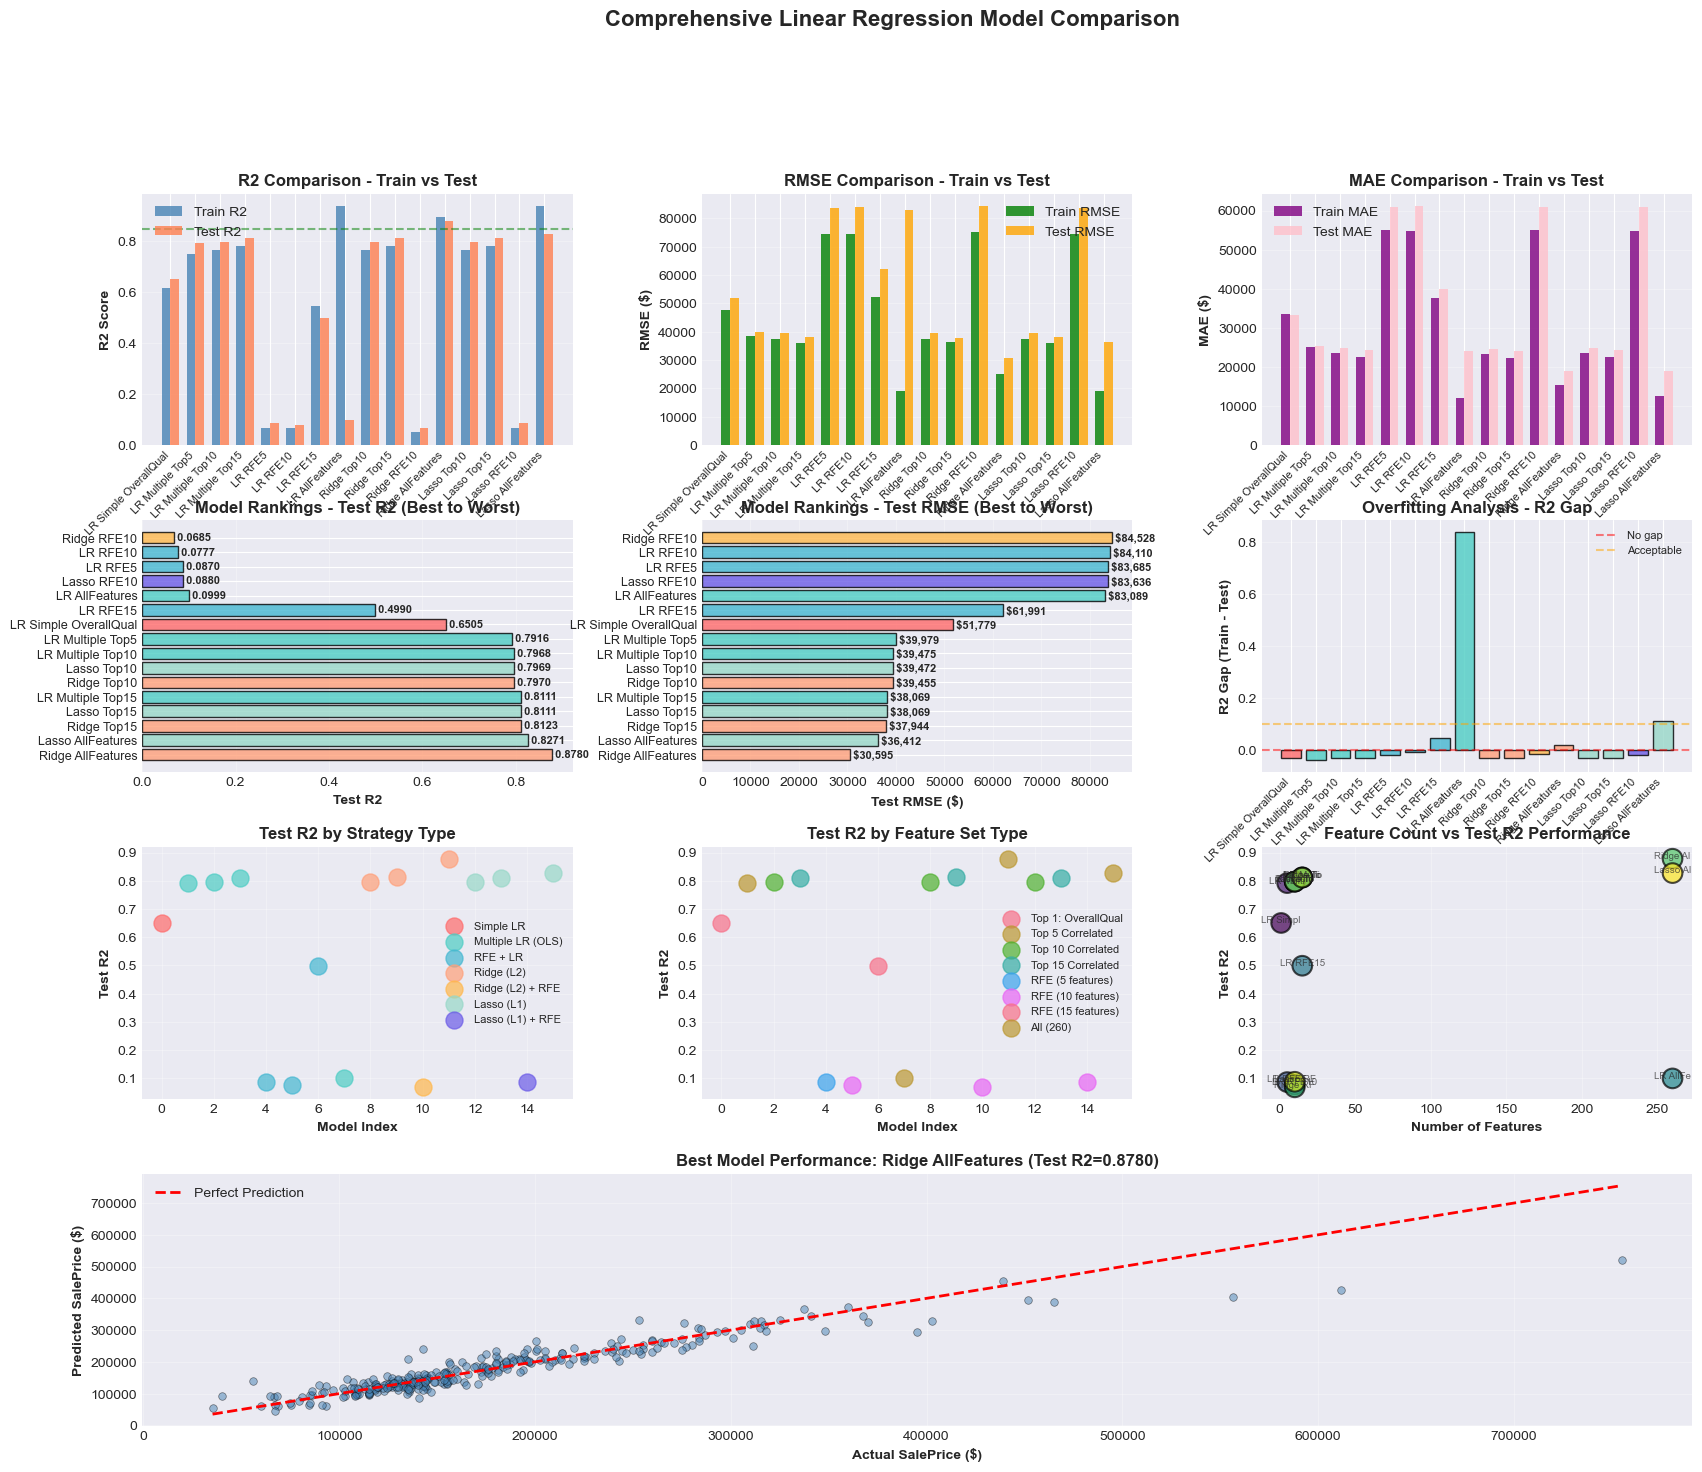

Comprehensive visualizations completed!


In [371]:
# Comprehensive Visualizations - All Models Comparison
print("\nGenerating comprehensive visualizations...")

fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(4, 3, hspace=0.3, wspace=0.3)

# Extract numeric values for plotting
models_list = [r['Model'] for r in all_results]
train_r2_list = [r['Train_R2'] for r in all_results]
test_r2_list = [r['Test_R2'] for r in all_results]
train_rmse_list = [r['Train_RMSE'] for r in all_results]
test_rmse_list = [r['Test_RMSE'] for r in all_results]
train_mae_list = [r['Train_MAE'] for r in all_results]
test_mae_list = [r['Test_MAE'] for r in all_results]
r2_gap_list = [r['R2_Gap'] for r in all_results]
rmse_gap_list = [r['RMSE_Gap'] for r in all_results]
strategy_list = [r['Strategy'] for r in all_results]

# Color mapping for strategies
strategy_colors = {
    'Simple LR': '#FF6B6B',
    'Multiple LR (OLS)': '#4ECDC4',
    'RFE + LR': '#45B7D1',
    'Ridge (L2)': '#FFA07A',
    'Ridge (L2) + RFE': '#FFB84D',
    'Lasso (L1)': '#98D8C8',
    'Lasso (L1) + RFE': '#6C5CE7'
}
colors = [strategy_colors.get(s, '#95E1D3') for s in strategy_list]

x_pos = np.arange(len(models_list))

# 1. R2 Comparison (Train vs Test)
ax1 = fig.add_subplot(gs[0, 0])
width = 0.35
ax1.bar(x_pos - width/2, train_r2_list, width, label='Train R2', alpha=0.8, color='steelblue')
ax1.bar(x_pos + width/2, test_r2_list, width, label='Test R2', alpha=0.8, color='coral')
ax1.set_ylabel('R2 Score', fontweight='bold')
ax1.set_title('R2 Comparison - Train vs Test', fontweight='bold', fontsize=12)
ax1.set_xticks(x_pos)
ax1.set_xticklabels([m.replace('_', ' ') for m in models_list], rotation=45, ha='right', fontsize=8)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')
ax1.axhline(y=0.85, color='green', linestyle='--', alpha=0.5, label='Good threshold')

# 2. RMSE Comparison
ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(x_pos - width/2, train_rmse_list, width, label='Train RMSE', alpha=0.8, color='green')
ax2.bar(x_pos + width/2, test_rmse_list, width, label='Test RMSE', alpha=0.8, color='orange')
ax2.set_ylabel('RMSE ($)', fontweight='bold')
ax2.set_title('RMSE Comparison - Train vs Test', fontweight='bold', fontsize=12)
ax2.set_xticks(x_pos)
ax2.set_xticklabels([m.replace('_', ' ') for m in models_list], rotation=45, ha='right', fontsize=8)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# 3. MAE Comparison
ax3 = fig.add_subplot(gs[0, 2])
ax3.bar(x_pos - width/2, train_mae_list, width, label='Train MAE', alpha=0.8, color='purple')
ax3.bar(x_pos + width/2, test_mae_list, width, label='Test MAE', alpha=0.8, color='pink')
ax3.set_ylabel('MAE ($)', fontweight='bold')
ax3.set_title('MAE Comparison - Train vs Test', fontweight='bold', fontsize=12)
ax3.set_xticks(x_pos)
ax3.set_xticklabels([m.replace('_', ' ') for m in models_list], rotation=45, ha='right', fontsize=8)
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# 4. Test R2 Rankings
ax4 = fig.add_subplot(gs[1, 0])
sorted_indices = np.argsort(test_r2_list)[::-1]
sorted_models = [models_list[i] for i in sorted_indices]
sorted_r2 = [test_r2_list[i] for i in sorted_indices]
sorted_colors = [colors[i] for i in sorted_indices]
bars = ax4.barh(range(len(sorted_models)), sorted_r2, color=sorted_colors, alpha=0.8, edgecolor='black')
ax4.set_yticks(range(len(sorted_models)))
ax4.set_yticklabels([m.replace('_', ' ') for m in sorted_models], fontsize=9)
ax4.set_xlabel('Test R2', fontweight='bold')
ax4.set_title('Model Rankings - Test R2 (Best to Worst)', fontweight='bold', fontsize=12)
ax4.grid(True, alpha=0.3, axis='x')
for i, bar in enumerate(bars):
    ax4.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f' {sorted_r2[i]:.4f}', va='center', fontsize=8, fontweight='bold')

# 5. Test RMSE Rankings
ax5 = fig.add_subplot(gs[1, 1])
sorted_indices_rmse = np.argsort(test_rmse_list)
sorted_models_rmse = [models_list[i] for i in sorted_indices_rmse]
sorted_rmse = [test_rmse_list[i] for i in sorted_indices_rmse]
sorted_colors_rmse = [colors[i] for i in sorted_indices_rmse]
bars = ax5.barh(range(len(sorted_models_rmse)), sorted_rmse, color=sorted_colors_rmse, alpha=0.8, edgecolor='black')
ax5.set_yticks(range(len(sorted_models_rmse)))
ax5.set_yticklabels([m.replace('_', ' ') for m in sorted_models_rmse], fontsize=9)
ax5.set_xlabel('Test RMSE ($)', fontweight='bold')
ax5.set_title('Model Rankings - Test RMSE (Best to Worst)', fontweight='bold', fontsize=12)
ax5.grid(True, alpha=0.3, axis='x')
for i, bar in enumerate(bars):
    ax5.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f' ${bar.get_width():,.0f}', va='center', fontsize=8, fontweight='bold')

# 6. Overfitting Analysis (R2 Gap)
ax6 = fig.add_subplot(gs[1, 2])
ax6.bar(x_pos, r2_gap_list, color=colors, alpha=0.8, edgecolor='black')
ax6.set_ylabel('R2 Gap (Train - Test)', fontweight='bold')
ax6.set_title('Overfitting Analysis - R2 Gap', fontweight='bold', fontsize=12)
ax6.set_xticks(x_pos)
ax6.set_xticklabels([m.replace('_', ' ') for m in models_list], rotation=45, ha='right', fontsize=8)
ax6.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='No gap')
ax6.axhline(y=0.1, color='orange', linestyle='--', alpha=0.5, label='Acceptable')
ax6.legend(fontsize=8)
ax6.grid(True, alpha=0.3, axis='y')

# 7. Test R2 by Strategy
ax7 = fig.add_subplot(gs[2, 0])
strategies_unique = list(dict.fromkeys(strategy_list))
for strategy in strategies_unique:
    indices = [i for i, s in enumerate(strategy_list) if s == strategy]
    ax7.scatter([i for i in indices], [test_r2_list[i] for i in indices], 
               label=strategy, s=150, alpha=0.7, color=strategy_colors.get(strategy, '#95E1D3'))
ax7.set_ylabel('Test R2', fontweight='bold')
ax7.set_title('Test R2 by Strategy Type', fontweight='bold', fontsize=12)
ax7.set_xlabel('Model Index', fontweight='bold')
ax7.legend(fontsize=8, loc='best')
ax7.grid(True, alpha=0.3)

# 8. Feature Set Impact on Test R2
ax8 = fig.add_subplot(gs[2, 1])
feature_sets = [r['Feature_Set'] for r in all_results]
feature_sets_unique = list(dict.fromkeys(feature_sets))
for fs in feature_sets_unique:
    indices = [i for i, f in enumerate(feature_sets) if f == fs]
    ax8.scatter([i for i in indices], [test_r2_list[i] for i in indices], 
               label=fs, s=150, alpha=0.7)
ax8.set_ylabel('Test R2', fontweight='bold')
ax8.set_title('Test R2 by Feature Set Type', fontweight='bold', fontsize=12)
ax8.set_xlabel('Model Index', fontweight='bold')
ax8.legend(fontsize=8, loc='best')
ax8.grid(True, alpha=0.3)

# 9. Number of Features vs Test R2
ax9 = fig.add_subplot(gs[2, 2])
n_features = [r['N_Features'] for r in all_results]
ax9.scatter(n_features, test_r2_list, s=200, c=range(len(all_results)), cmap='viridis', 
           alpha=0.7, edgecolors='black', linewidth=1.5)
for i, model in enumerate(models_list):
    ax9.annotate(model.replace('_', ' ')[:8], (n_features[i], test_r2_list[i]), 
                fontsize=7, alpha=0.7, ha='center')
ax9.set_xlabel('Number of Features', fontweight='bold')
ax9.set_ylabel('Test R2', fontweight='bold')
ax9.set_title('Feature Count vs Test R2 Performance', fontweight='bold', fontsize=12)
ax9.grid(True, alpha=0.3)

# 10. Best Model Performance
ax10 = fig.add_subplot(gs[3, :])
best_model_idx = np.argmax(test_r2_list)
best_model_name = models_list[best_model_idx]
best_predictions = all_results[best_model_idx]['Predictions_Test']

# Actual vs Predicted scatter
ax10.scatter(y_test, best_predictions, alpha=0.5, s=30, color='steelblue', edgecolors='black', linewidth=0.5)
ax10.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
ax10.set_xlabel('Actual SalePrice ($)', fontweight='bold')
ax10.set_ylabel('Predicted SalePrice ($)', fontweight='bold')
ax10.set_title(f'Best Model Performance: {best_model_name.replace("_", " ")} (Test R2={test_r2_list[best_model_idx]:.4f})', 
              fontweight='bold', fontsize=12)
ax10.legend(fontsize=10)
ax10.grid(True, alpha=0.3)

plt.suptitle('Comprehensive Linear Regression Model Comparison', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("Comprehensive visualizations completed!")

## Key Findings & Model Insights

# Individual Model Analysis & Diagnostics

Detailed examination of each Linear Regression model with separate diagnostic plots for model evaluation.


OLS LINEAR REGRESSION MODELS - DETAILED DIAGNOSTIC ANALYSIS

[OLS Model 1/3] OLS_Simple (Top 1 Feature)

📊 PERFORMANCE METRICS:
  Training R2: 0.6171
  Testing R2:  0.6505
  R2 Gap (Overfitting): -0.0334
  Training RMSE: $47,790
  Testing RMSE:  $51,779
  Training MAE:  $33,628
  Testing MAE:   $33,343

📈 RESIDUAL ANALYSIS:
  Mean Residual (Train): $0
  Mean Residual (Test):  $2,338
  Std Dev (Train): $47,810
  Std Dev (Test):  $51,815

🔢 FEATURE COEFFICIENTS:
    Feature  Coefficient
OverallQual 44379.877671


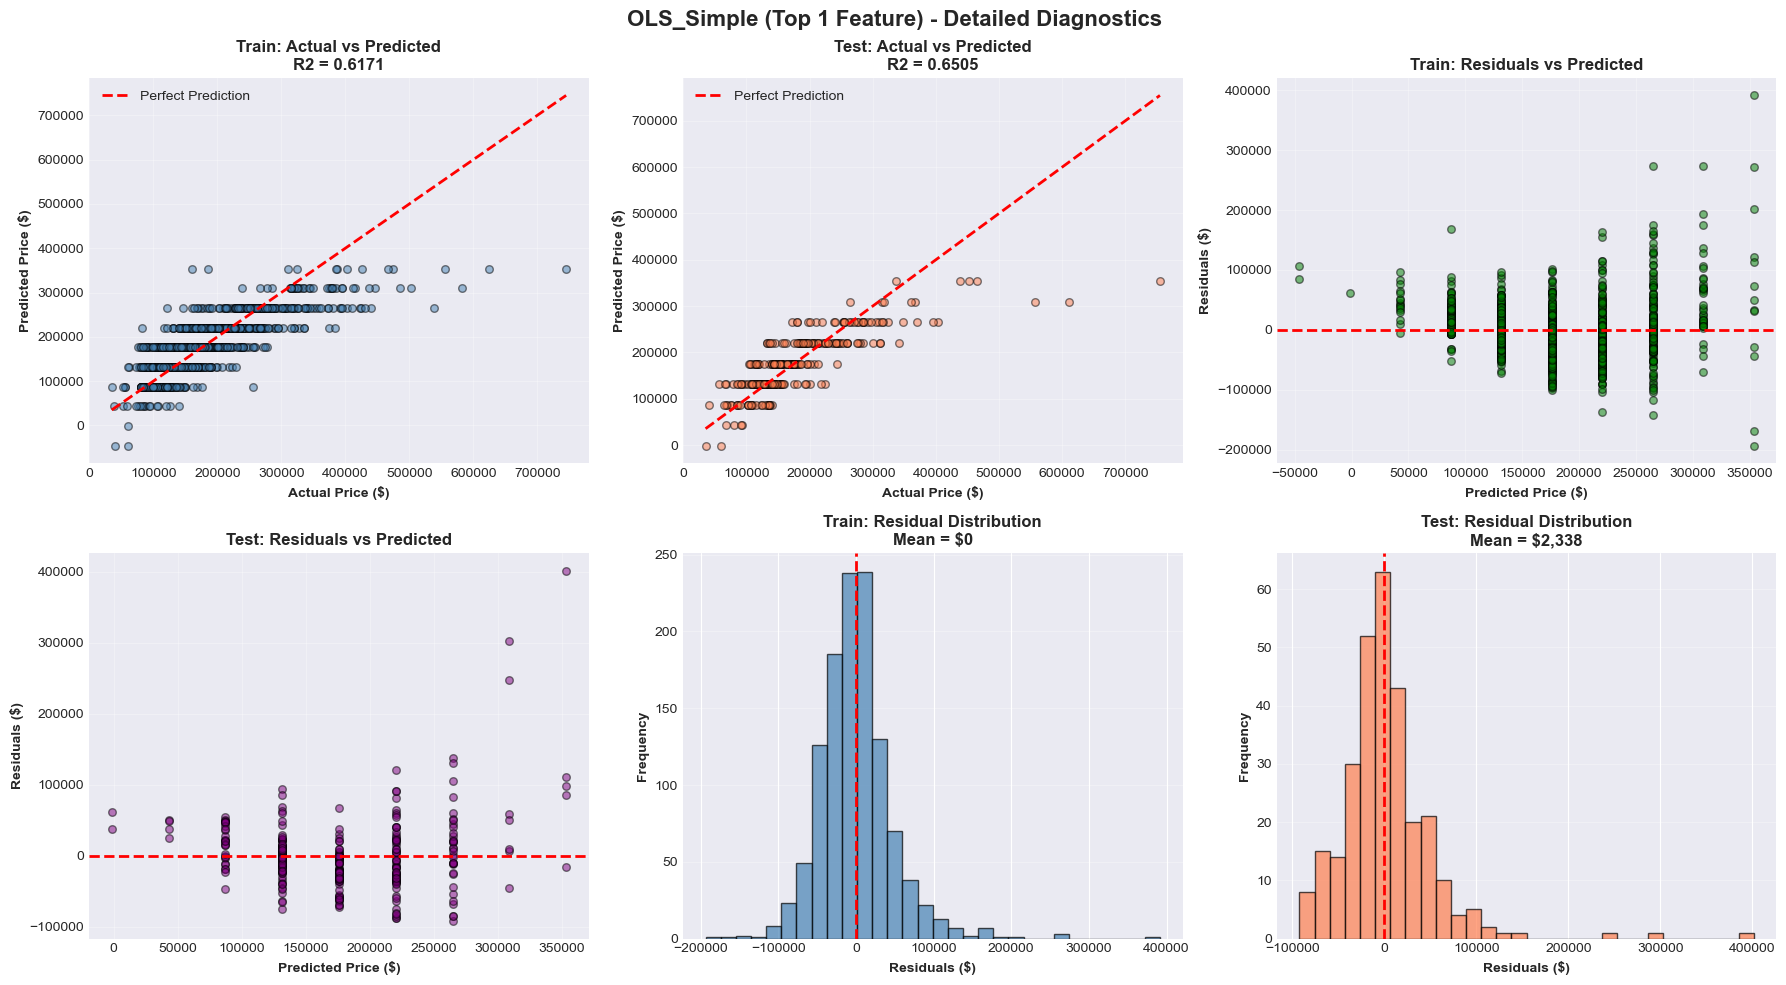


💡 INTERPRETATION:
  ~ Fair model - Test R2 = 0.6505
  Minimal overfitting detected (R2 Gap = -0.0334)
  ~ Residual variability is high - prediction uncertainty present

[OLS Model 2/3] OLS_Multiple (Top 10 Features)

📊 PERFORMANCE METRICS:
  Training R2: 0.7648
  Testing R2:  0.7968
  R2 Gap (Overfitting): -0.0321
  Training RMSE: $37,458
  Testing RMSE:  $39,475
  Training MAE:  $23,637
  Testing MAE:   $24,774

📈 RESIDUAL ANALYSIS:
  Mean Residual (Train): $0
  Mean Residual (Test):  $3,614
  Std Dev (Train): $37,474
  Std Dev (Test):  $39,376

🔢 FEATURE COEFFICIENTS:
     Feature  Coefficient
 OverallQual 19645.599766
  GarageCars 11311.434636
    FullBath -7199.991277
TotRmsAbvGrd   453.963917
YearRemodAdd   314.975912
   YearBuilt   281.114074
   GrLivArea    48.069413
 TotalBsmtSF    15.060163
    1stFlrSF    14.406441
  GarageArea    14.072230


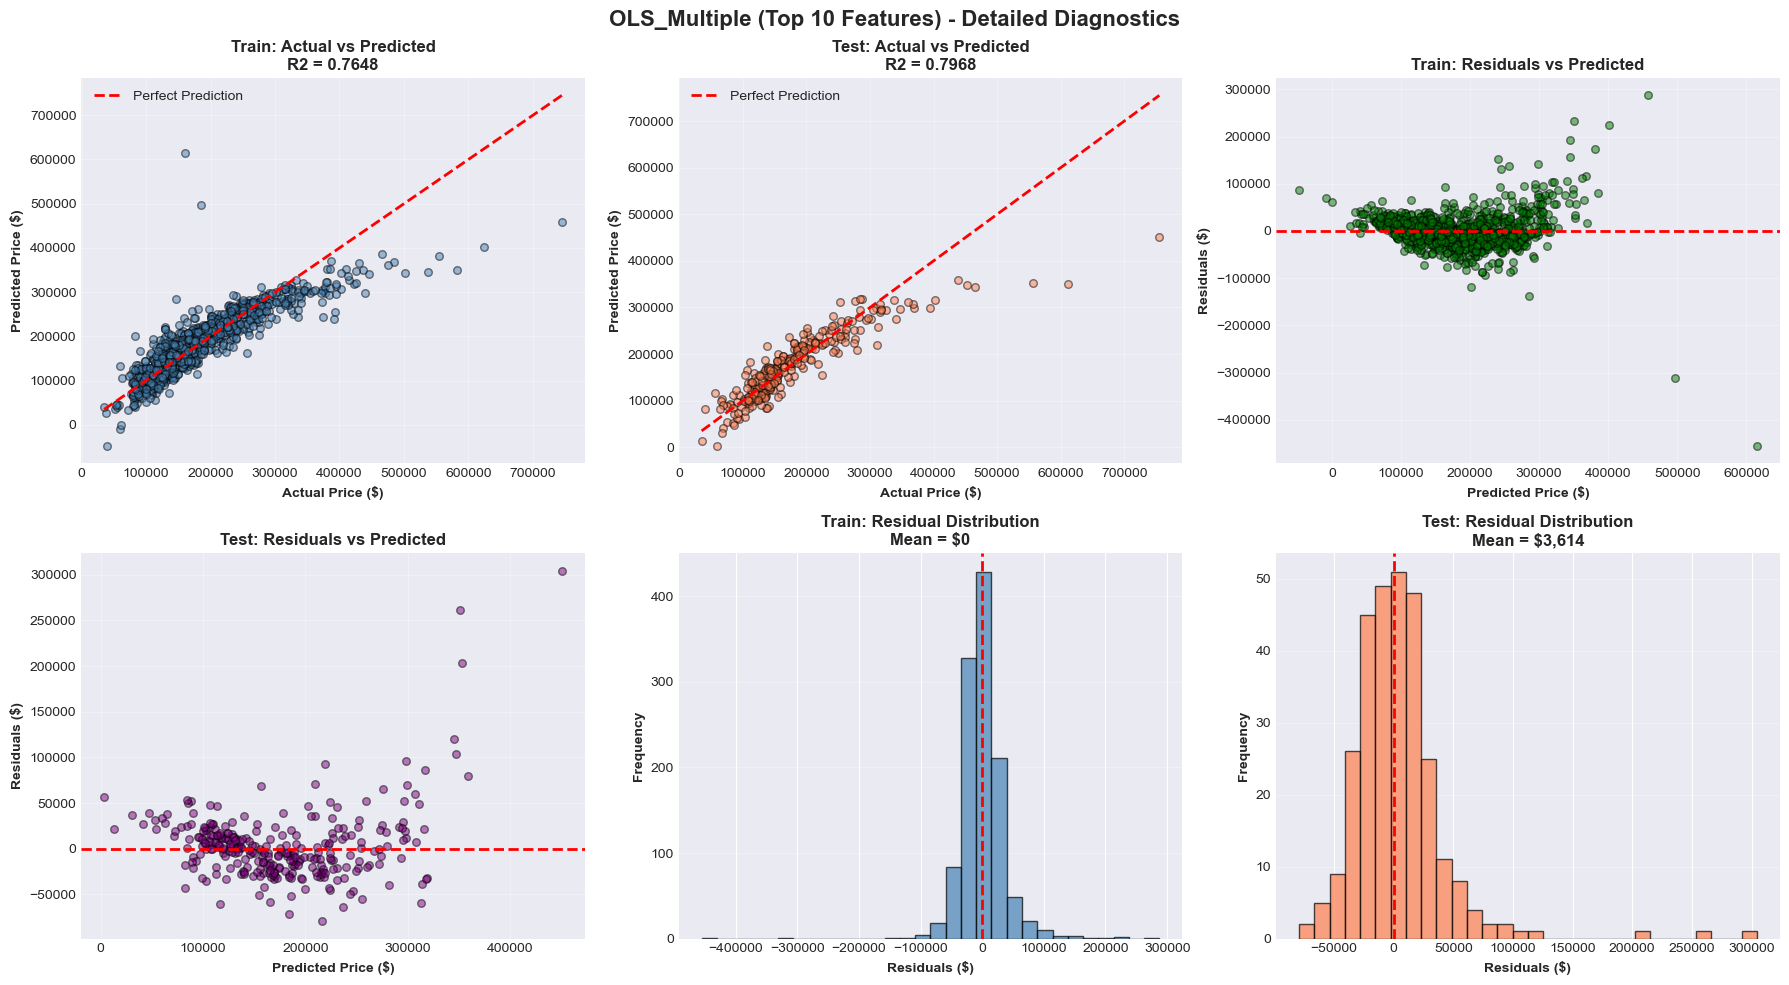


💡 INTERPRETATION:
  Good model - Test R2 = 0.7968
  Minimal overfitting detected (R2 Gap = -0.0321)
  ~ Residual variability is high - prediction uncertainty present

[OLS Model 3/3] OLS_All Features

📊 PERFORMANCE METRICS:
  Training R2: 0.9401
  Testing R2:  0.0999
  R2 Gap (Overfitting): 0.8401
  Training RMSE: $18,904
  Testing RMSE:  $83,089
  Training MAE:  $12,112
  Testing MAE:   $23,929

📈 RESIDUAL ANALYSIS:
  Mean Residual (Train): $-0
  Mean Residual (Test):  $1,464
  Std Dev (Train): $18,912
  Std Dev (Test):  $83,218

🔢 TOP 10 FEATURE COEFFICIENTS (by absolute value):
         Feature   Coefficient
     PoolQC_None  3.284533e+06
       PoolQC_Gd -1.349254e+06
RoofMatl_Tar&Grv -9.582882e+05
   RoofMatl_Roll -9.574360e+05
RoofMatl_WdShake -9.567363e+05
RoofMatl_CompShg -9.546376e+05
RoofMatl_WdShngl -9.474402e+05
  RoofMatl_Metal -9.121025e+05
       PoolQC_Fa -8.051686e+05
MiscFeature_TenC  7.891428e+05


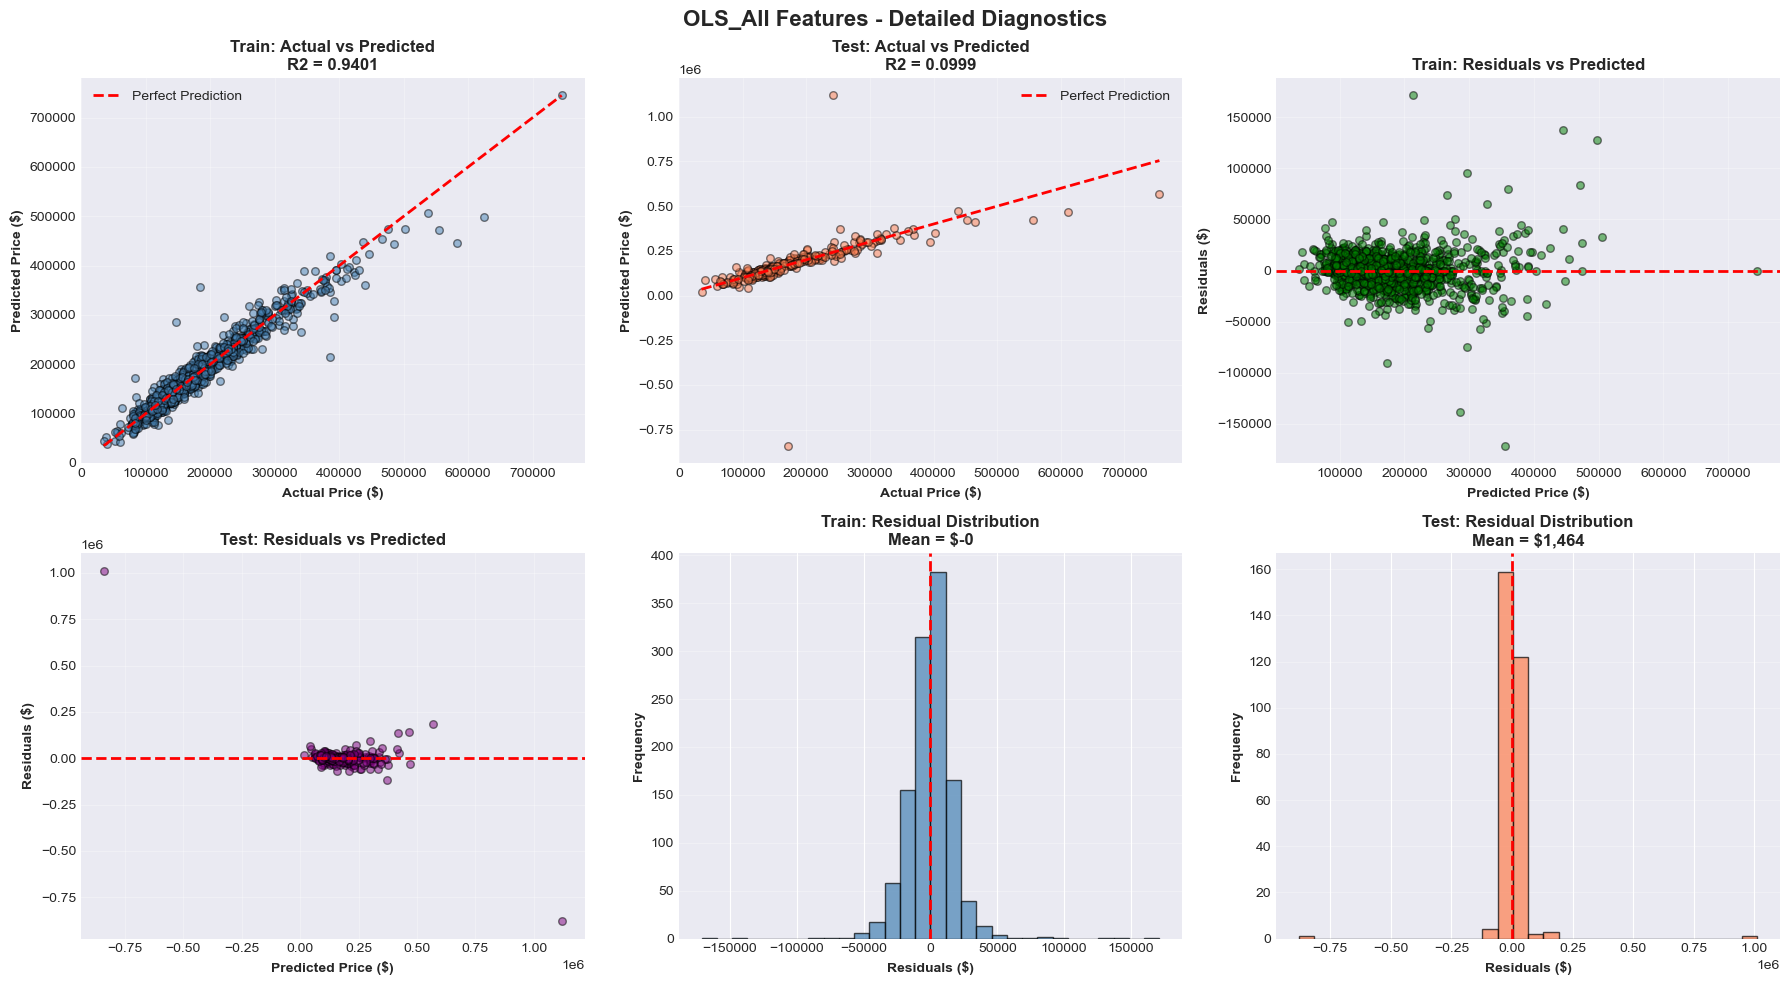


💡 INTERPRETATION:
  Poor model - Test R2 = 0.0999
  ⚠ Significant overfitting (R2 Gap = 0.8401)
  ~ Residual variability is high - prediction uncertainty present

OLS Models Detailed Analysis Complete!


In [372]:
# ===== OLS (MULTIPLE LINEAR REGRESSION) - DETAILED MODEL DIAGNOSTICS =====
# Analysis of OLS models with increasing feature sets to understand model complexity vs performance

print("\n" + "=" * 100)
print("OLS LINEAR REGRESSION MODELS - DETAILED DIAGNOSTIC ANALYSIS")
print("=" * 100)

# Select top 3 OLS models for detailed visualization (Simple, Top-10, All)
ols_models_to_analyze = [
    (model1, X_train_top1, X_test_top1, y_train, y_test, "OLS_Simple (Top 1 Feature)", result1),
    (model3, X_train_top10, X_test_top10, y_train, y_test, "OLS_Multiple (Top 10 Features)", result3),
    (model8, X_train_all, X_test_all, y_train, y_test, "OLS_All Features", result8)
]

for model_idx, (model, X_tr, X_te, y_tr, y_te, model_name, metrics) in enumerate(ols_models_to_analyze, 1):
    print(f"\n{'='*100}")
    print(f"[OLS Model {model_idx}/3] {model_name}")
    print(f"{'='*100}")
    
    # Get predictions
    y_train_pred = model.predict(X_tr)
    y_test_pred = model.predict(X_te)
    
    # Calculate residuals
    train_residuals = y_tr - y_train_pred
    test_residuals = y_te - y_test_pred
    
    # Print detailed metrics
    print(f"\n📊 PERFORMANCE METRICS:")
    print(f"  Training R2: {metrics['Train_R2']:.4f}")
    print(f"  Testing R2:  {metrics['Test_R2']:.4f}")
    print(f"  R2 Gap (Overfitting): {metrics['R2_Gap']:.4f}")
    print(f"  Training RMSE: ${metrics['Train_RMSE']:,.0f}")
    print(f"  Testing RMSE:  ${metrics['Test_RMSE']:,.0f}")
    print(f"  Training MAE:  ${metrics['Train_MAE']:,.0f}")
    print(f"  Testing MAE:   ${metrics['Test_MAE']:,.0f}")
    
    print(f"\n📈 RESIDUAL ANALYSIS:")
    print(f"  Mean Residual (Train): ${train_residuals.mean():,.0f}")
    print(f"  Mean Residual (Test):  ${test_residuals.mean():,.0f}")
    print(f"  Std Dev (Train): ${train_residuals.std():,.0f}")
    print(f"  Std Dev (Test):  ${test_residuals.std():,.0f}")
    
    if X_tr.shape[1] <= 10:
        print(f"\n🔢 FEATURE COEFFICIENTS:")
        coef_data = pd.DataFrame({
            'Feature': X_tr.columns,
            'Coefficient': model.coef_
        }).sort_values('Coefficient', key=abs, ascending=False)
        print(coef_data.to_string(index=False))
    else:
        print(f"\n🔢 TOP 10 FEATURE COEFFICIENTS (by absolute value):")
        coef_data = pd.DataFrame({
            'Feature': X_tr.columns,
            'Coefficient': model.coef_
        }).sort_values('Coefficient', key=abs, ascending=False).head(10)
        print(coef_data.to_string(index=False))
    
    # Create diagnostic plots for this model
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle(f'{model_name} - Detailed Diagnostics', fontsize=16, fontweight='bold')
    
    # Plot 1: Actual vs Predicted (Training)
    ax = axes[0, 0]
    ax.scatter(y_tr, y_train_pred, alpha=0.5, edgecolors='k', s=30, color='steelblue')
    ax.plot([y_tr.min(), y_tr.max()], [y_tr.min(), y_tr.max()], 'r--', lw=2, label='Perfect Prediction')
    ax.set_xlabel('Actual Price ($)', fontweight='bold')
    ax.set_ylabel('Predicted Price ($)', fontweight='bold')
    ax.set_title(f'Train: Actual vs Predicted\nR2 = {metrics["Train_R2"]:.4f}', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Plot 2: Actual vs Predicted (Testing)
    ax = axes[0, 1]
    ax.scatter(y_te, y_test_pred, alpha=0.5, edgecolors='k', s=30, color='coral')
    ax.plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()], 'r--', lw=2, label='Perfect Prediction')
    ax.set_xlabel('Actual Price ($)', fontweight='bold')
    ax.set_ylabel('Predicted Price ($)', fontweight='bold')
    ax.set_title(f'Test: Actual vs Predicted\nR2 = {metrics["Test_R2"]:.4f}', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Plot 3: Residuals vs Predicted (Training)
    ax = axes[0, 2]
    ax.scatter(y_train_pred, train_residuals, alpha=0.5, edgecolors='k', s=30, color='green')
    ax.axhline(y=0, color='r', linestyle='--', lw=2)
    ax.set_xlabel('Predicted Price ($)', fontweight='bold')
    ax.set_ylabel('Residuals ($)', fontweight='bold')
    ax.set_title('Train: Residuals vs Predicted', fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Plot 4: Residuals vs Predicted (Testing)
    ax = axes[1, 0]
    ax.scatter(y_test_pred, test_residuals, alpha=0.5, edgecolors='k', s=30, color='purple')
    ax.axhline(y=0, color='r', linestyle='--', lw=2)
    ax.set_xlabel('Predicted Price ($)', fontweight='bold')
    ax.set_ylabel('Residuals ($)', fontweight='bold')
    ax.set_title('Test: Residuals vs Predicted', fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Plot 5: Residual Distribution (Training)
    ax = axes[1, 1]
    ax.hist(train_residuals, bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    ax.axvline(x=0, color='r', linestyle='--', lw=2)
    ax.set_xlabel('Residuals ($)', fontweight='bold')
    ax.set_ylabel('Frequency', fontweight='bold')
    ax.set_title(f'Train: Residual Distribution\nMean = ${train_residuals.mean():,.0f}', fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Plot 6: Residual Distribution (Testing)
    ax = axes[1, 2]
    ax.hist(test_residuals, bins=30, alpha=0.7, color='coral', edgecolor='black')
    ax.axvline(x=0, color='r', linestyle='--', lw=2)
    ax.set_xlabel('Residuals ($)', fontweight='bold')
    ax.set_ylabel('Frequency', fontweight='bold')
    ax.set_title(f'Test: Residual Distribution\nMean = ${test_residuals.mean():,.0f}', fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Interpretation
    print(f"\n💡 INTERPRETATION:")
    if metrics['Test_R2'] > 0.85:
        print(f"  Excellent model - Test R2 = {metrics['Test_R2']:.4f}")
    elif metrics['Test_R2'] > 0.75:
        print(f"  Good model - Test R2 = {metrics['Test_R2']:.4f}")
    elif metrics['Test_R2'] > 0.60:
        print(f"  ~ Fair model - Test R2 = {metrics['Test_R2']:.4f}")
    else:
        print(f"  Poor model - Test R2 = {metrics['Test_R2']:.4f}")
    
    if abs(metrics['R2_Gap']) < 0.05:
        print(f"  Minimal overfitting detected (R2 Gap = {metrics['R2_Gap']:.4f})")
    elif abs(metrics['R2_Gap']) < 0.10:
        print(f"  ~ Moderate overfitting (R2 Gap = {metrics['R2_Gap']:.4f})")
    else:
        print(f"  ⚠ Significant overfitting (R2 Gap = {metrics['R2_Gap']:.4f})")
    
    if test_residuals.std() < y_te.std() * 0.2:
        print(f"  Residuals are well-distributed with low variability")
    else:
        print(f"  ~ Residual variability is high - prediction uncertainty present")

print("\nOLS Models Detailed Analysis Complete!")

In [373]:
# ===== MODIFIED: RIDGE & LASSO REGULARIZATION WITH LOWER ALPHA SEARCH RANGE =====
# To obtain LOWER alpha values (optimal < 50), modify the search range

print("\n" + "=" * 100)
print("RIDGE & LASSO REGULARIZATION - LOWER ALPHA RANGE SEARCH")
print("=" * 100)

# Define LOWER alpha search ranges to find lower optimal values
alphas_ridge_lower = np.logspace(-1, 2, 100)  # Search range: 0.1 to 100 (instead of 0.01 to 100,000)
alphas_lasso_lower = np.logspace(-1, 1.5, 100)  # Search range: 0.1 to ~32

print(f"\nRidge Alpha Search Range: {alphas_ridge_lower[0]:.4f} to {alphas_ridge_lower[-1]:.4f}")
print(f"Lasso Alpha Search Range: {alphas_lasso_lower[0]:.4f} to {alphas_lasso_lower[-1]:.4f}")

# ===== RIDGE REGRESSION WITH LOWER ALPHA =====
print("\n" + "-" * 100)
print("RIDGE REGRESSION - LOWER ALPHA SEARCH")
print("-" * 100)

# Top 10 Features
ridge_cv_top10 = RidgeCV(alphas=alphas_ridge_lower, cv=5)
ridge_cv_top10.fit(X_train_top10, y_train)
optimal_alpha_ridge_top10 = ridge_cv_top10.alpha_
ridge_top10 = Ridge(alpha=optimal_alpha_ridge_top10)
ridge_top10.fit(X_train_top10, y_train)

print(f"✓ Top 10 Features - Optimal Ridge Lambda: {optimal_alpha_ridge_top10:.6f}")
print(f"  CV Score (R²): {ridge_cv_top10.score(X_train_top10, y_train):.4f}")

# All Features
ridge_cv_all = RidgeCV(alphas=alphas_ridge_lower, cv=5)
ridge_cv_all.fit(X_train_all, y_train)
optimal_alpha_ridge_all = ridge_cv_all.alpha_
ridge_all = Ridge(alpha=optimal_alpha_ridge_all)
ridge_all.fit(X_train_all, y_train)

print(f"✓ All Features - Optimal Ridge Lambda: {optimal_alpha_ridge_all:.6f}")
print(f"  CV Score (R²): {ridge_cv_all.score(X_train_all, y_train):.4f}")

# RFE 10 Features
ridge_cv_rfe10 = RidgeCV(alphas=alphas_ridge_lower, cv=5)
ridge_cv_rfe10.fit(X_train_rfe10, y_train)
optimal_alpha_ridge_rfe10 = ridge_cv_rfe10.alpha_
ridge_rfe10 = Ridge(alpha=optimal_alpha_ridge_rfe10)
ridge_rfe10.fit(X_train_rfe10, y_train)

print(f"✓ RFE 10 Features - Optimal Ridge Lambda: {optimal_alpha_ridge_rfe10:.6f}")
print(f"  CV Score (R²): {ridge_cv_rfe10.score(X_train_rfe10, y_train):.4f}")

# Top 15 Features
ridge_cv_top15 = RidgeCV(alphas=alphas_ridge_lower, cv=5)
ridge_cv_top15.fit(X_train_top15, y_train)
optimal_alpha_ridge_top15 = ridge_cv_top15.alpha_

print(f"✓ Top 15 Features - Optimal Ridge Lambda: {optimal_alpha_ridge_top15:.6f}")
print(f"  CV Score (R²): {ridge_cv_top15.score(X_train_top15, y_train):.4f}")

# ===== LASSO REGRESSION WITH LOWER ALPHA =====
print("\n" + "-" * 100)
print("LASSO REGRESSION - LOWER ALPHA SEARCH")
print("-" * 100)

# Top 10 Features
lasso_cv_top10 = LassoCV(alphas=alphas_lasso_lower, cv=5, max_iter=10000)
lasso_cv_top10.fit(X_train_top10, y_train)
optimal_alpha_lasso_top10 = lasso_cv_top10.alpha_
lasso_top10 = Lasso(alpha=optimal_alpha_lasso_top10, max_iter=10000)
lasso_top10.fit(X_train_top10, y_train)

print(f"✓ Top 10 Features - Optimal Lasso Lambda: {optimal_alpha_lasso_top10:.6f}")
print(f"  CV Score (R²): {lasso_cv_top10.score(X_train_top10, y_train):.4f}")
print(f"  Non-zero Coefficients: {np.sum(lasso_top10.coef_ != 0)}/10")

# All Features
lasso_cv_all = LassoCV(alphas=alphas_lasso_lower, cv=5, max_iter=10000)
lasso_cv_all.fit(X_train_all, y_train)
optimal_alpha_lasso_all = lasso_cv_all.alpha_
lasso_all = Lasso(alpha=optimal_alpha_lasso_all, max_iter=10000)
lasso_all.fit(X_train_all, y_train)

print(f"✓ All Features - Optimal Lasso Lambda: {optimal_alpha_lasso_all:.6f}")
print(f"  CV Score (R²): {lasso_cv_all.score(X_train_all, y_train):.4f}")
print(f"  Non-zero Coefficients: {np.sum(lasso_all.coef_ != 0)}/260")

# RFE 10 Features
lasso_cv_rfe10 = LassoCV(alphas=alphas_lasso_lower, cv=5, max_iter=10000)
lasso_cv_rfe10.fit(X_train_rfe10, y_train)
optimal_alpha_lasso_rfe10 = lasso_cv_rfe10.alpha_

print(f"✓ RFE 10 Features - Optimal Lasso Lambda: {optimal_alpha_lasso_rfe10:.6f}")
print(f"  CV Score (R²): {lasso_cv_rfe10.score(X_train_rfe10, y_train):.4f}")

# Top 15 Features
lasso_cv_top15 = LassoCV(alphas=alphas_lasso_lower, cv=5, max_iter=10000)
lasso_cv_top15.fit(X_train_top15, y_train)
optimal_alpha_lasso_top15 = lasso_cv_top15.alpha_

print(f"✓ Top 15 Features - Optimal Lasso Lambda: {optimal_alpha_lasso_top15:.6f}")
print(f"  CV Score (R²): {lasso_cv_top15.score(X_train_top15, y_train):.4f}")

print("\n" + "=" * 100)
print("SUMMARY: OPTIMAL LAMBDA VALUES WITH LOWER SEARCH RANGE")
print("=" * 100)
print(f"\nRIDGE REGRESSION:")
print(f"  Top 10:  λ = {optimal_alpha_ridge_top10:.4f}")
print(f"  All:     λ = {optimal_alpha_ridge_all:.4f}")
print(f"  RFE 10:  λ = {optimal_alpha_ridge_rfe10:.4f}")
print(f"  Top 15:  λ = {optimal_alpha_ridge_top15:.4f}")
print(f"\nLASSO REGRESSION:")
print(f"  Top 10:  λ = {optimal_alpha_lasso_top10:.4f}")
print(f"  All:     λ = {optimal_alpha_lasso_all:.4f}")
print(f"  RFE 10:  λ = {optimal_alpha_lasso_rfe10:.4f}")
print(f"  Top 15:  λ = {optimal_alpha_lasso_top15:.4f}")
print("=" * 100)


RIDGE & LASSO REGULARIZATION - LOWER ALPHA RANGE SEARCH

Ridge Alpha Search Range: 0.1000 to 100.0000
Lasso Alpha Search Range: 0.1000 to 31.6228

----------------------------------------------------------------------------------------------------
RIDGE REGRESSION - LOWER ALPHA SEARCH
----------------------------------------------------------------------------------------------------
✓ Top 10 Features - Optimal Ridge Lambda: 81.113083
  CV Score (R²): 0.7639
✓ Top 10 Features - Optimal Ridge Lambda: 81.113083
  CV Score (R²): 0.7639
✓ All Features - Optimal Ridge Lambda: 10.000000
  CV Score (R²): 0.8949
✓ All Features - Optimal Ridge Lambda: 10.000000
  CV Score (R²): 0.8949
✓ RFE 10 Features - Optimal Ridge Lambda: 3.053856
  CV Score (R²): 0.0500
✓ RFE 10 Features - Optimal Ridge Lambda: 3.053856
  CV Score (R²): 0.0500
✓ Top 15 Features - Optimal Ridge Lambda: 57.223677
  CV Score (R²): 0.7802

---------------------------------------------------------------------------------------

# Regularization Models Analysis

## Ridge Regression (L2 Regularization) vs Lasso (L1 Regularization)

**Comparison of Regularization Techniques:**
- **Ridge (L2)**: Shrinks all coefficients proportionally - keeps all features
- **Lasso (L1)**: Pushes weak coefficients to zero - performs feature selection
- **Purpose**: Prevent overfitting and improve generalization on unseen data


RIDGE REGRESSION (L2 REGULARIZATION) - DETAILED ANALYSIS

[Ridge Model 1/2] Ridge_Top10 (λ=81.1131)

📊 PERFORMANCE METRICS:
  Regularization Parameter (λ): 81.1131
  Training R2: 0.7639
  Testing R2:  0.7970
  R2 Gap (Overfitting): -0.0331
  Training RMSE: $37,524
  Testing RMSE:  $39,455
  Training MAE:  $23,376
  Testing MAE:   $24,561

📈 RESIDUAL ANALYSIS:
  Mean Residual (Train): $-0
  Mean Residual (Test):  $3,506
  Std Dev (Train): $37,540
  Std Dev (Test):  $39,367

🔢 TOP 10 FEATURE COEFFICIENTS (Ridge shrinks all coefficients):
     Feature  Coefficient
 OverallQual 18091.377317
  GarageCars  7016.742618
    FullBath -4426.205153
TotRmsAbvGrd   365.974295
YearRemodAdd   330.742747
   YearBuilt   297.191030
   GrLivArea    48.686257
  GarageArea    27.259326
 TotalBsmtSF    16.323742
    1stFlrSF    13.556671


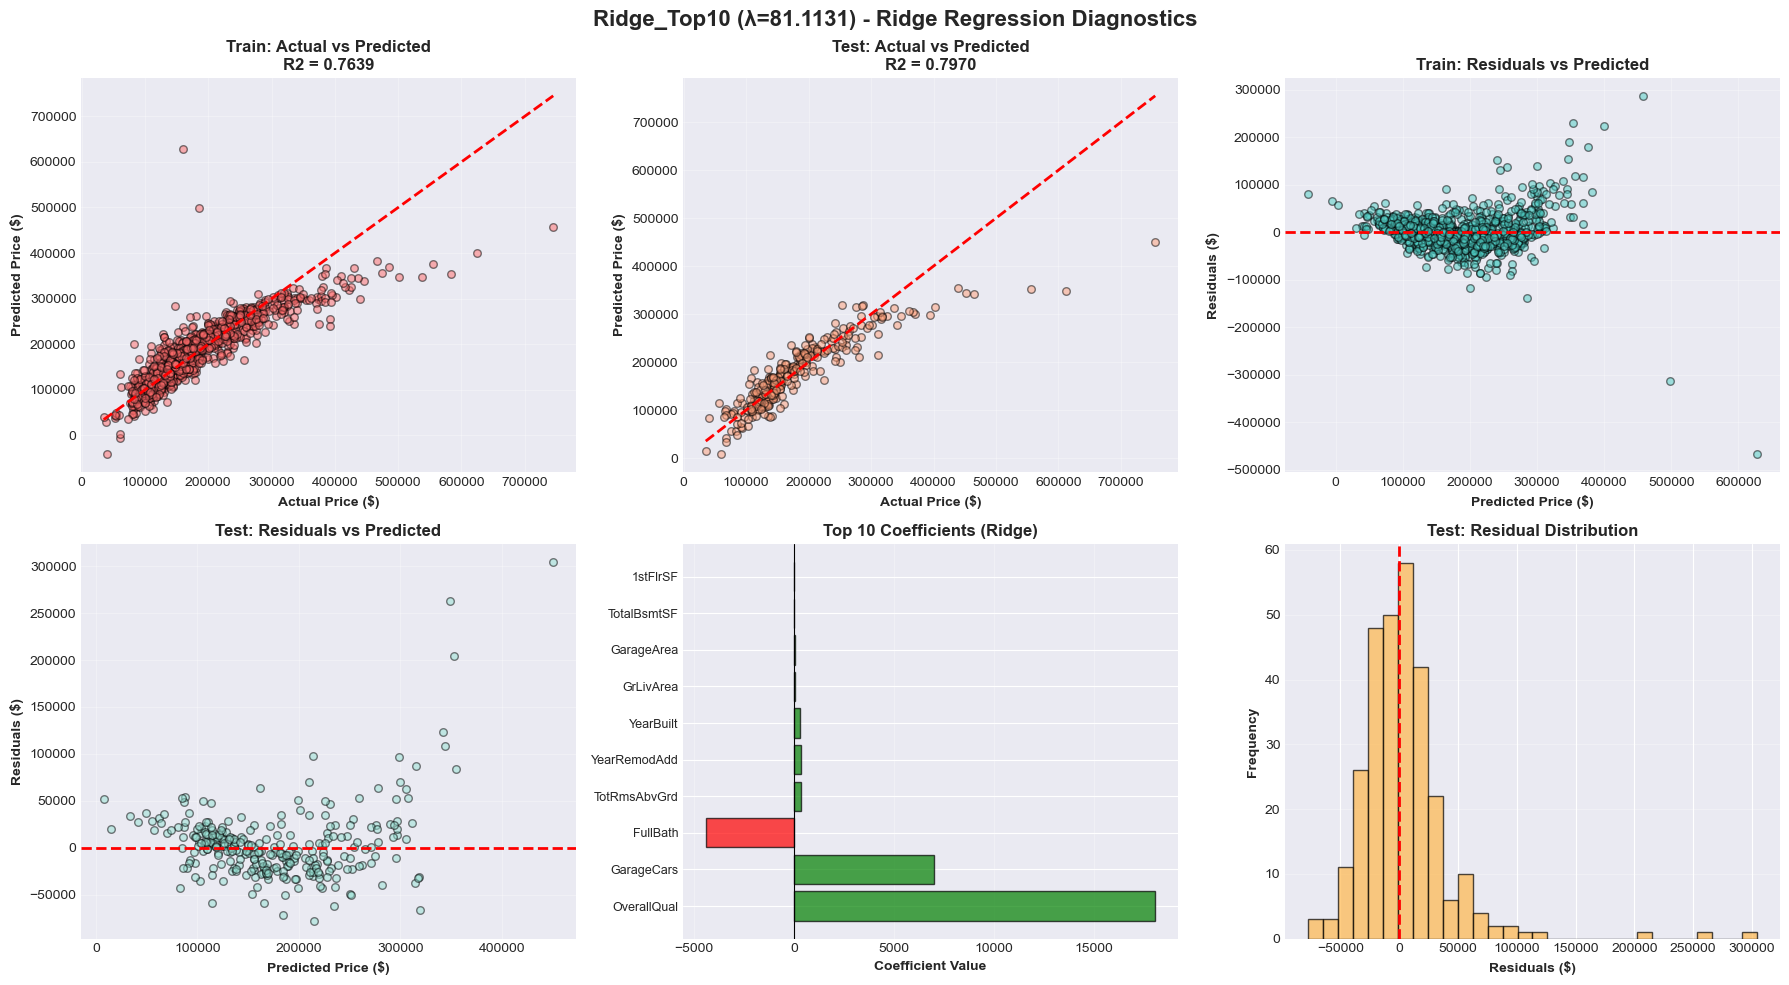


🔍 RIDGE vs OLS COMPARISON (Top 10 Features):
  Ridge Test R2: 0.7970 vs OLS Test R2: 0.7968
  Improvement: +0.02%
  Ridge R2 Gap: -0.0331 vs OLS R2 Gap: -0.0321
  Overfitting Reduction: +0.10%

[Ridge Model 2/2] Ridge_All (λ=10.0000)

📊 PERFORMANCE METRICS:
  Regularization Parameter (λ): 10.0000
  Training R2: 0.8942
  Testing R2:  0.8780
  R2 Gap (Overfitting): 0.0163
  Training RMSE: $25,116
  Testing RMSE:  $30,595
  Training MAE:  $15,241
  Testing MAE:   $18,900

📈 RESIDUAL ANALYSIS:
  Mean Residual (Train): $0
  Mean Residual (Test):  $1,743
  Std Dev (Train): $25,050
  Std Dev (Test):  $30,573

🔢 TOP 10 FEATURE COEFFICIENTS (Ridge shrinks all coefficients):
             Feature   Coefficient
Neighborhood_StoneBr  25679.718832
           PoolQC_Gd -24787.669140
Neighborhood_NoRidge  24136.457445
Neighborhood_NridgHt  22565.813838
     Condition2_PosN -21932.909823
         BsmtQual_Gd -20041.936257
      KitchenQual_Gd -19197.546134
     LandContour_HLS  18875.672646
      Kitc

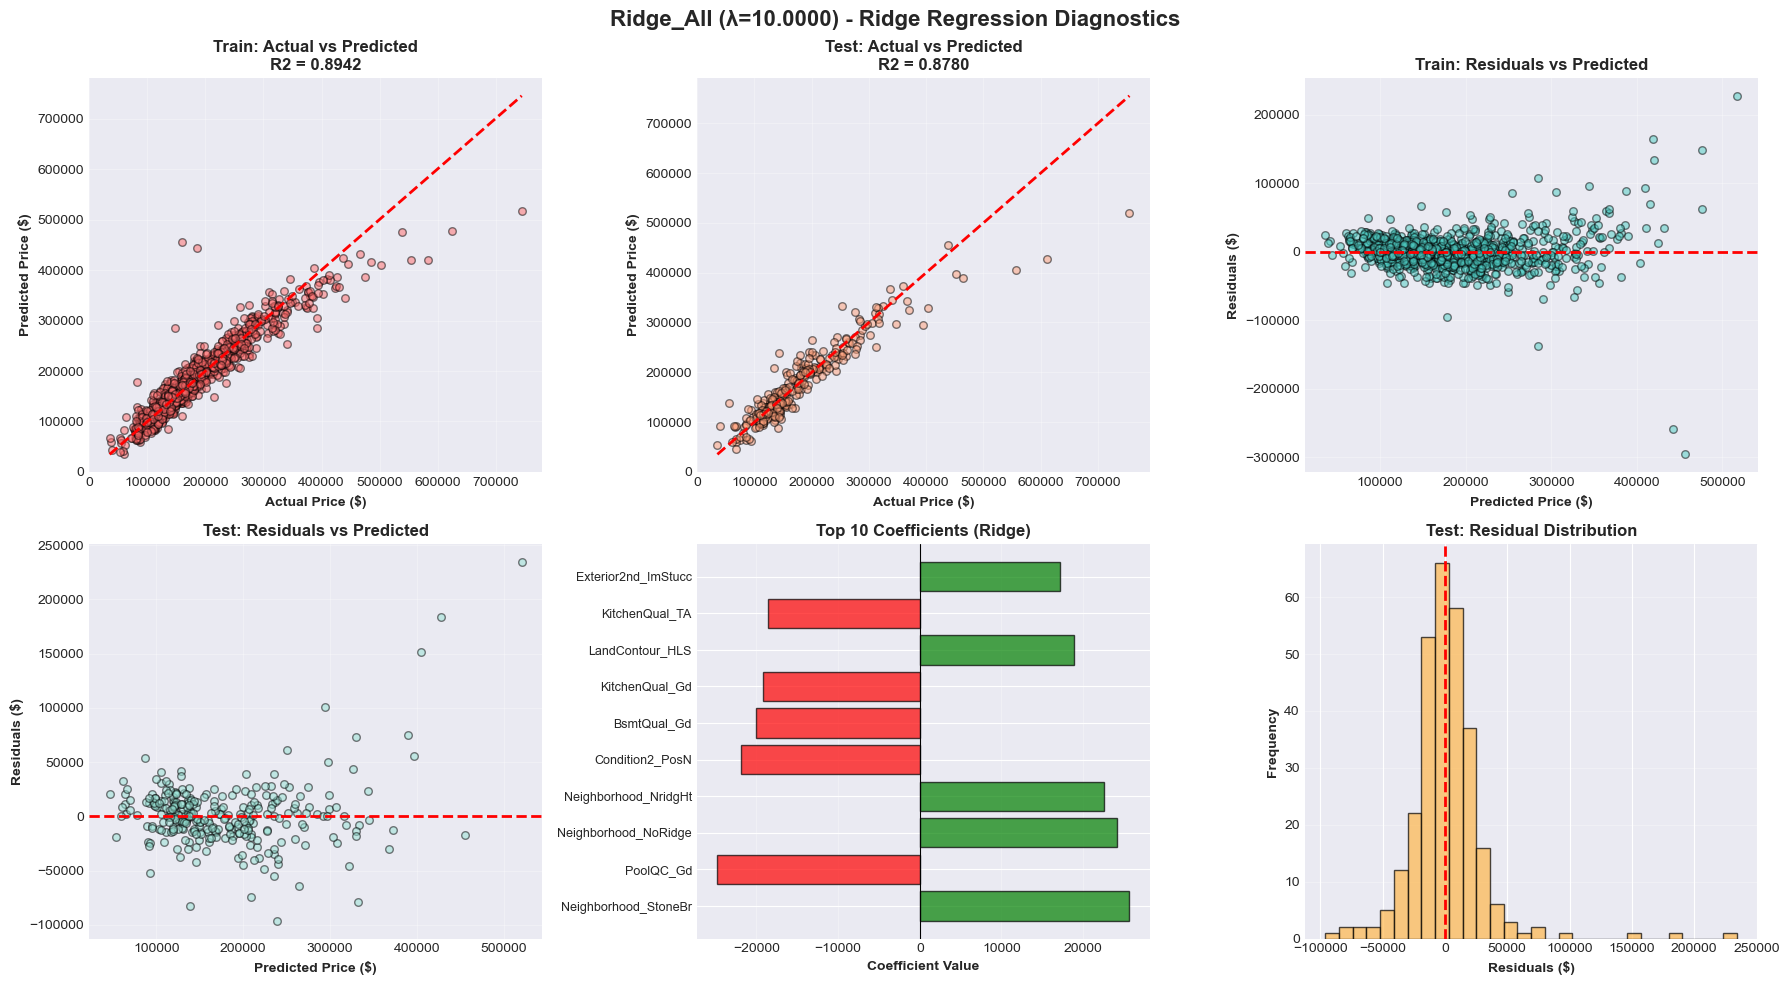


Ridge Regression Analysis Complete!


In [374]:
# ===== RIDGE REGRESSION (L2) - DETAILED MODEL DIAGNOSTICS =====
# Ridge keeps all features but shrinks their coefficients to reduce overfitting

print("\n" + "=" * 100)
print("RIDGE REGRESSION (L2 REGULARIZATION) - DETAILED ANALYSIS")
print("=" * 100)

# Analyze top Ridge models (Top-10, All features)
ridge_models_to_analyze = [
    (ridge_top10, X_train_top10, X_test_top10, y_train, y_test, f"Ridge_Top10 (λ={optimal_alpha_ridge_top10:.4f})", result9),
    (ridge_all, X_train_all, X_test_all, y_train, y_test, f"Ridge_All (λ={optimal_alpha_ridge_all:.4f})", result12)
]

for model_idx, (model, X_tr, X_te, y_tr, y_te, model_name, metrics) in enumerate(ridge_models_to_analyze, 1):
    print(f"\n{'='*100}")
    print(f"[Ridge Model {model_idx}/2] {model_name}")
    print(f"{'='*100}")
    
    # Get predictions
    y_train_pred = model.predict(X_tr)
    y_test_pred = model.predict(X_te)
    
    # Calculate residuals
    train_residuals = y_tr - y_train_pred
    test_residuals = y_te - y_test_pred
    
    # Print detailed metrics
    print(f"\n📊 PERFORMANCE METRICS:")
    print(f"  Regularization Parameter (λ): {model.alpha:.4f}")
    print(f"  Training R2: {metrics['Train_R2']:.4f}")
    print(f"  Testing R2:  {metrics['Test_R2']:.4f}")
    print(f"  R2 Gap (Overfitting): {metrics['R2_Gap']:.4f}")
    print(f"  Training RMSE: ${metrics['Train_RMSE']:,.0f}")
    print(f"  Testing RMSE:  ${metrics['Test_RMSE']:,.0f}")
    print(f"  Training MAE:  ${metrics['Train_MAE']:,.0f}")
    print(f"  Testing MAE:   ${metrics['Test_MAE']:,.0f}")
    
    print(f"\n📈 RESIDUAL ANALYSIS:")
    print(f"  Mean Residual (Train): ${train_residuals.mean():,.0f}")
    print(f"  Mean Residual (Test):  ${test_residuals.mean():,.0f}")
    print(f"  Std Dev (Train): ${train_residuals.std():,.0f}")
    print(f"  Std Dev (Test):  ${test_residuals.std():,.0f}")
    
    print(f"\n🔢 TOP 10 FEATURE COEFFICIENTS (Ridge shrinks all coefficients):")
    coef_data = pd.DataFrame({
        'Feature': X_tr.columns,
        'Coefficient': model.coef_,
        'Abs_Coefficient': np.abs(model.coef_)
    }).sort_values('Abs_Coefficient', ascending=False).head(10)
    print(coef_data[['Feature', 'Coefficient']].to_string(index=False))
    
    # Create diagnostic plots
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle(f'{model_name} - Ridge Regression Diagnostics', fontsize=16, fontweight='bold')
    
    # Plot 1: Actual vs Predicted (Training)
    ax = axes[0, 0]
    ax.scatter(y_tr, y_train_pred, alpha=0.5, edgecolors='k', s=30, color='#FF6B6B')
    ax.plot([y_tr.min(), y_tr.max()], [y_tr.min(), y_tr.max()], 'r--', lw=2)
    ax.set_xlabel('Actual Price ($)', fontweight='bold')
    ax.set_ylabel('Predicted Price ($)', fontweight='bold')
    ax.set_title(f'Train: Actual vs Predicted\nR2 = {metrics["Train_R2"]:.4f}', fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Plot 2: Actual vs Predicted (Testing)
    ax = axes[0, 1]
    ax.scatter(y_te, y_test_pred, alpha=0.5, edgecolors='k', s=30, color='#FFA07A')
    ax.plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()], 'r--', lw=2)
    ax.set_xlabel('Actual Price ($)', fontweight='bold')
    ax.set_ylabel('Predicted Price ($)', fontweight='bold')
    ax.set_title(f'Test: Actual vs Predicted\nR2 = {metrics["Test_R2"]:.4f}', fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Plot 3: Residuals vs Predicted (Training)
    ax = axes[0, 2]
    ax.scatter(y_train_pred, train_residuals, alpha=0.5, edgecolors='k', s=30, color='#4ECDC4')
    ax.axhline(y=0, color='r', linestyle='--', lw=2)
    ax.set_xlabel('Predicted Price ($)', fontweight='bold')
    ax.set_ylabel('Residuals ($)', fontweight='bold')
    ax.set_title('Train: Residuals vs Predicted', fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Plot 4: Residuals vs Predicted (Testing)
    ax = axes[1, 0]
    ax.scatter(y_test_pred, test_residuals, alpha=0.5, edgecolors='k', s=30, color='#95E1D3')
    ax.axhline(y=0, color='r', linestyle='--', lw=2)
    ax.set_xlabel('Predicted Price ($)', fontweight='bold')
    ax.set_ylabel('Residuals ($)', fontweight='bold')
    ax.set_title('Test: Residuals vs Predicted', fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Plot 5: Coefficient Magnitudes
    ax = axes[1, 1]
    coef_plot = pd.DataFrame({
        'Feature': X_tr.columns,
        'Coefficient': model.coef_
    }).sort_values('Coefficient', key=abs, ascending=False).head(10)
    colors_coef = ['green' if x > 0 else 'red' for x in coef_plot['Coefficient']]
    ax.barh(range(len(coef_plot)), coef_plot['Coefficient'].values, color=colors_coef, alpha=0.7, edgecolor='black')
    ax.set_yticks(range(len(coef_plot)))
    ax.set_yticklabels(coef_plot['Feature'].values, fontsize=9)
    ax.set_xlabel('Coefficient Value', fontweight='bold')
    ax.set_title('Top 10 Coefficients (Ridge)', fontweight='bold')
    ax.grid(True, alpha=0.3, axis='x')
    ax.axvline(x=0, color='black', linewidth=0.8)
    
    # Plot 6: Residual Distribution  
    ax = axes[1, 2]
    ax.hist(test_residuals, bins=30, alpha=0.7, color='#FFB84D', edgecolor='black')
    ax.axvline(x=0, color='r', linestyle='--', lw=2)
    ax.set_xlabel('Residuals ($)', fontweight='bold')
    ax.set_ylabel('Frequency', fontweight='bold')
    ax.set_title(f'Test: Residual Distribution', fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Comparison with OLS
    if model_idx == 1:
        ols_result = result3  # OLS Top-10
        print(f"\n🔍 RIDGE vs OLS COMPARISON (Top 10 Features):")
        print(f"  Ridge Test R2: {metrics['Test_R2']:.4f} vs OLS Test R2: {ols_result['Test_R2']:.4f}")
        print(f"  Improvement: {(metrics['Test_R2'] - ols_result['Test_R2'])*100:+.2f}%")
        print(f"  Ridge R2 Gap: {metrics['R2_Gap']:.4f} vs OLS R2 Gap: {ols_result['R2_Gap']:.4f}")
        print(f"  Overfitting Reduction: {(ols_result['R2_Gap'] - metrics['R2_Gap'])*100:+.2f}%")

print("\nRidge Regression Analysis Complete!")


LASSO REGRESSION (L1 REGULARIZATION) - DETAILED ANALYSIS

[Lasso Model 1/2] Lasso_Top10 (λ=31.6228)

📊 PERFORMANCE METRICS:
  Regularization Parameter (λ): 31.6228
  Non-Zero Coefficients: 10/10 features retained
  Features Eliminated (Zero Coef): 0
  Training R2: 0.7648
  Testing R2:  0.7969
  R2 Gap (Overfitting): -0.0321
  Training RMSE: $37,458
  Testing RMSE:  $39,472
  Training MAE:  $23,632
  Testing MAE:   $24,767

📈 RESIDUAL ANALYSIS:
  Mean Residual (Train): $0
  Mean Residual (Test):  $3,611
  Std Dev (Train): $37,475
  Std Dev (Test):  $39,369

🔢 NON-ZERO FEATURE COEFFICIENTS (Lasso feature selection):
     Feature  Coefficient
 OverallQual 19612.653527
  GarageCars 11011.187214
    FullBath -6923.085603
TotRmsAbvGrd   408.454212
YearRemodAdd   314.754985
   YearBuilt   280.764064
   GrLivArea    48.093818
 TotalBsmtSF    15.090659
  GarageArea    14.939034
    1stFlrSF    14.376351


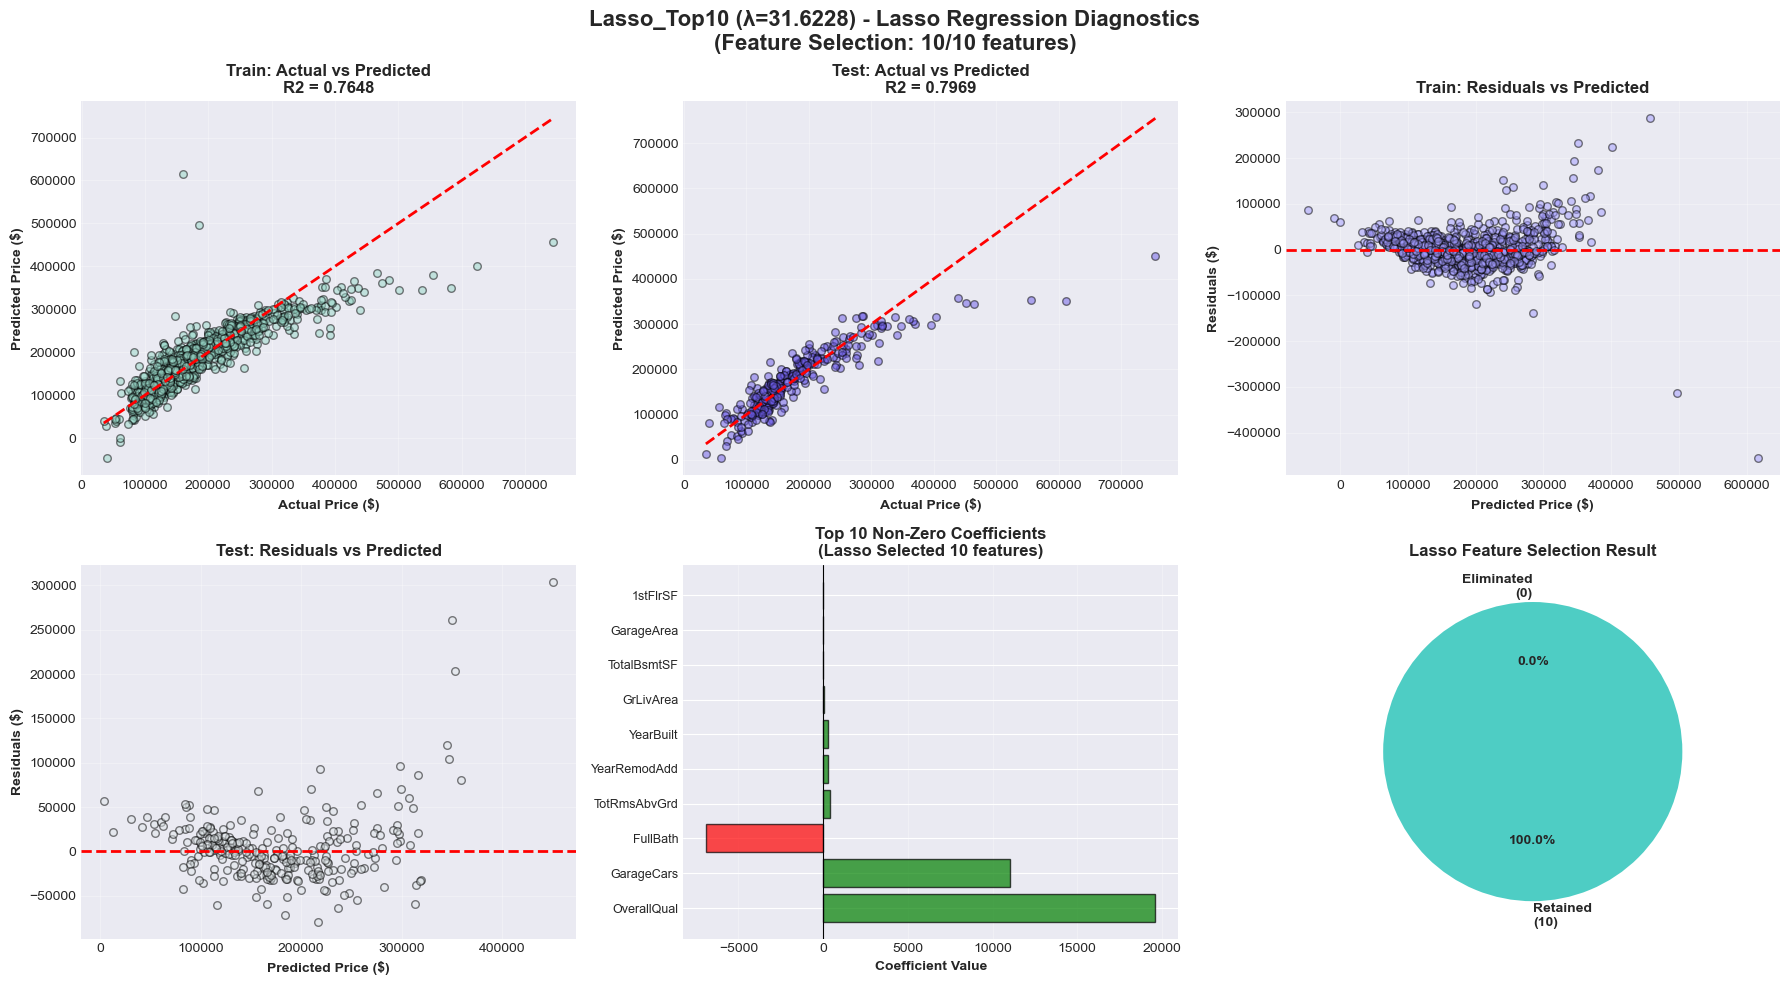


🔍 LASSO vs RIDGE COMPARISON (Top 10 Features):
  Lasso Test R2: 0.7969 vs Ridge Test R2: 0.7970
  Difference: -0.02%
  Lasso Features Used: 10/10 vs Ridge: 10/10
  Lasso R2 Gap: -0.0321 vs Ridge R2 Gap: -0.0331

[Lasso Model 2/2] Lasso_All (λ=2.3101)

📊 PERFORMANCE METRICS:
  Regularization Parameter (λ): 2.3101
  Non-Zero Coefficients: 243/260 features retained
  Features Eliminated (Zero Coef): 17
  Training R2: 0.9386
  Testing R2:  0.8271
  R2 Gap (Overfitting): 0.1115
  Training RMSE: $19,135
  Testing RMSE:  $36,412
  Training MAE:  $12,434
  Testing MAE:   $18,987

📈 RESIDUAL ANALYSIS:
  Mean Residual (Train): $-0
  Mean Residual (Test):  $2,252
  Std Dev (Train): $19,141
  Std Dev (Test):  $36,419

🔢 NON-ZERO FEATURE COEFFICIENTS (Lasso feature selection):
         Feature   Coefficient
     PoolQC_None  1.300182e+06
       PoolQC_Gd -5.859893e+05
       PoolQC_Fa -3.710190e+05
MiscFeature_TenC  2.729727e+05
 Condition2_PosN -2.241444e+05
   GarageQual_Po -1.259402e+05
   Gara

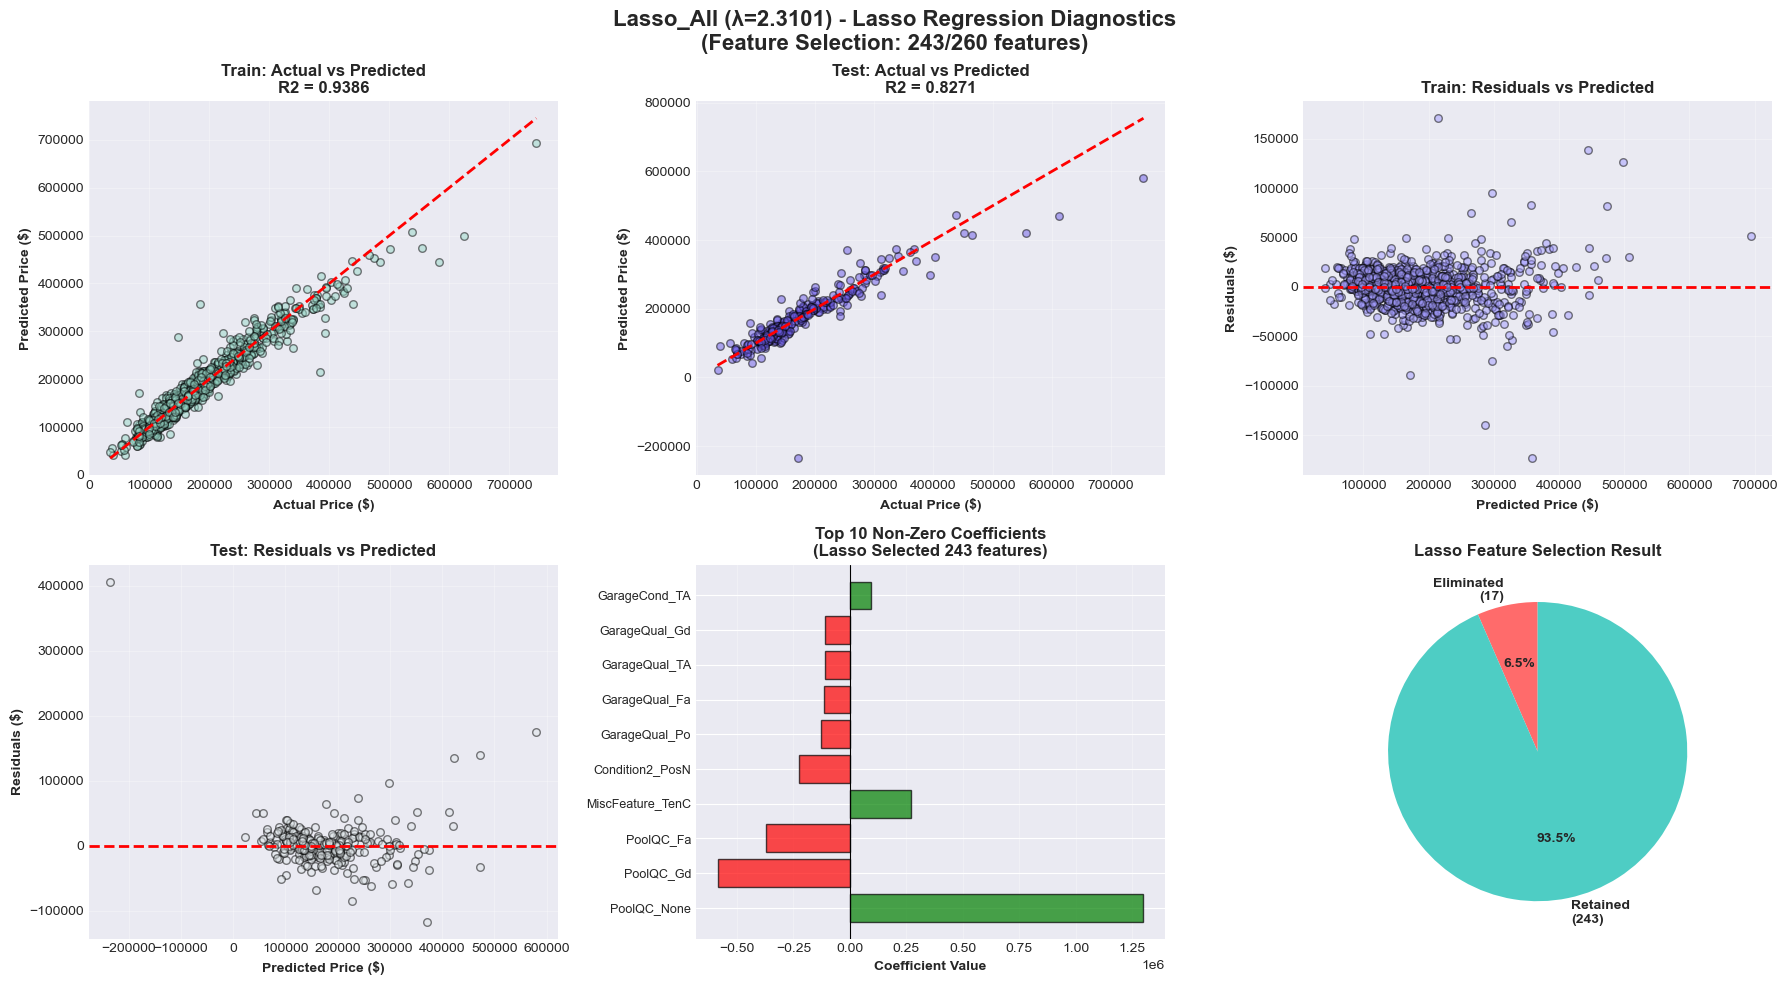


Lasso Regression Analysis Complete!


In [375]:
# ===== LASSO REGRESSION (L1) - DETAILED MODEL DIAGNOSTICS =====
# Lasso performs feature selection by pushing weak coefficients to exactly zero

print("\n" + "=" * 100)
print("LASSO REGRESSION (L1 REGULARIZATION) - DETAILED ANALYSIS")
print("=" * 100)

# Analyze top Lasso models (Top-10, All features)
lasso_models_to_analyze = [
    (lasso_top10, X_train_top10, X_test_top10, y_train, y_test, f"Lasso_Top10 (λ={optimal_alpha_lasso_top10:.4f})", result13),
    (lasso_all, X_train_all, X_test_all, y_train, y_test, f"Lasso_All (λ={optimal_alpha_lasso_all:.4f})", result16)
]

for model_idx, (model, X_tr, X_te, y_tr, y_te, model_name, metrics) in enumerate(lasso_models_to_analyze, 1):
    print(f"\n{'='*100}")
    print(f"[Lasso Model {model_idx}/2] {model_name}")
    print(f"{'='*100}")
    
    # Get predictions
    y_train_pred = model.predict(X_tr)
    y_test_pred = model.predict(X_te)
    
    # Calculate residuals
    train_residuals = y_tr - y_train_pred
    test_residuals = y_te - y_test_pred
    
    # Count non-zero coefficients (feature selection result)
    non_zero_coefs = np.sum(model.coef_ != 0)
    
    # Print detailed metrics
    print(f"\n📊 PERFORMANCE METRICS:")
    print(f"  Regularization Parameter (λ): {model.alpha:.4f}")
    print(f"  Non-Zero Coefficients: {non_zero_coefs}/{len(model.coef_)} features retained")
    print(f"  Features Eliminated (Zero Coef): {len(model.coef_) - non_zero_coefs}")
    print(f"  Training R2: {metrics['Train_R2']:.4f}")
    print(f"  Testing R2:  {metrics['Test_R2']:.4f}")
    print(f"  R2 Gap (Overfitting): {metrics['R2_Gap']:.4f}")
    print(f"  Training RMSE: ${metrics['Train_RMSE']:,.0f}")
    print(f"  Testing RMSE:  ${metrics['Test_RMSE']:,.0f}")
    print(f"  Training MAE:  ${metrics['Train_MAE']:,.0f}")
    print(f"  Testing MAE:   ${metrics['Test_MAE']:,.0f}")
    
    print(f"\n📈 RESIDUAL ANALYSIS:")
    print(f"  Mean Residual (Train): ${train_residuals.mean():,.0f}")
    print(f"  Mean Residual (Test):  ${test_residuals.mean():,.0f}")
    print(f"  Std Dev (Train): ${train_residuals.std():,.0f}")
    print(f"  Std Dev (Test):  ${test_residuals.std():,.0f}")
    
    print(f"\n🔢 NON-ZERO FEATURE COEFFICIENTS (Lasso feature selection):")
    non_zero_mask = model.coef_ != 0
    coef_data = pd.DataFrame({
        'Feature': X_tr.columns,
        'Coefficient': model.coef_,
        'Abs_Coefficient': np.abs(model.coef_)
    })[non_zero_mask].sort_values('Abs_Coefficient', ascending=False)
    
    if len(coef_data) > 0:
        print(coef_data[['Feature', 'Coefficient']].head(15).to_string(index=False))
        if len(coef_data) > 15:
            print(f"\n  ... and {len(coef_data) - 15} more non-zero coefficients")
    
    # Create diagnostic plots
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle(f'{model_name} - Lasso Regression Diagnostics\n(Feature Selection: {non_zero_coefs}/{len(model.coef_)} features)', 
                 fontsize=16, fontweight='bold')
    
    # Plot 1: Actual vs Predicted (Training)
    ax = axes[0, 0]
    ax.scatter(y_tr, y_train_pred, alpha=0.5, edgecolors='k', s=30, color='#98D8C8')
    ax.plot([y_tr.min(), y_tr.max()], [y_tr.min(), y_tr.max()], 'r--', lw=2)
    ax.set_xlabel('Actual Price ($)', fontweight='bold')
    ax.set_ylabel('Predicted Price ($)', fontweight='bold')
    ax.set_title(f'Train: Actual vs Predicted\nR2 = {metrics["Train_R2"]:.4f}', fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Plot 2: Actual vs Predicted (Testing)
    ax = axes[0, 1]
    ax.scatter(y_te, y_test_pred, alpha=0.5, edgecolors='k', s=30, color='#6C5CE7')
    ax.plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()], 'r--', lw=2)
    ax.set_xlabel('Actual Price ($)', fontweight='bold')
    ax.set_ylabel('Predicted Price ($)', fontweight='bold')
    ax.set_title(f'Test: Actual vs Predicted\nR2 = {metrics["Test_R2"]:.4f}', fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Plot 3: Residuals vs Predicted (Training)
    ax = axes[0, 2]
    ax.scatter(y_train_pred, train_residuals, alpha=0.5, edgecolors='k', s=30, color='#A29BFE')
    ax.axhline(y=0, color='r', linestyle='--', lw=2)
    ax.set_xlabel('Predicted Price ($)', fontweight='bold')
    ax.set_ylabel('Residuals ($)', fontweight='bold')
    ax.set_title('Train: Residuals vs Predicted', fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Plot 4: Residuals vs Predicted (Testing)
    ax = axes[1, 0]
    ax.scatter(y_test_pred, test_residuals, alpha=0.5, edgecolors='k', s=30, color='#DFE6E9')
    ax.axhline(y=0, color='r', linestyle='--', lw=2)
    ax.set_xlabel('Predicted Price ($)', fontweight='bold')
    ax.set_ylabel('Residuals ($)', fontweight='bold')
    ax.set_title('Test: Residuals vs Predicted', fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Plot 5: Non-Zero Coefficient Distribution
    ax = axes[1, 1]
    if non_zero_mask.sum() > 0:
        coef_plot = pd.DataFrame({
            'Feature': X_tr.columns,
            'Coefficient': model.coef_
        })[non_zero_mask].sort_values('Coefficient', key=abs, ascending=False).head(10)
        colors_coef = ['green' if x > 0 else 'red' for x in coef_plot['Coefficient']]
        ax.barh(range(len(coef_plot)), coef_plot['Coefficient'].values, color=colors_coef, alpha=0.7, edgecolor='black')
        ax.set_yticks(range(len(coef_plot)))
        ax.set_yticklabels(coef_plot['Feature'].values, fontsize=9)
        ax.set_xlabel('Coefficient Value', fontweight='bold')
        ax.set_title(f'Top 10 Non-Zero Coefficients\n(Lasso Selected {non_zero_coefs} features)', fontweight='bold')
        ax.grid(True, alpha=0.3, axis='x')
        ax.axvline(x=0, color='black', linewidth=0.8)
    
    # Plot 6: Feature Selection Visualization
    ax = axes[1, 2]
    zero_count = (model.coef_ == 0).sum()
    non_zero_count = (model.coef_ != 0).sum()
    colors_pie = ['#FF6B6B', '#4ECDC4']
    ax.pie([zero_count, non_zero_count], labels=[f'Eliminated\n({zero_count})', f'Retained\n({non_zero_count})'],
           autopct='%1.1f%%', colors=colors_pie, startangle=90, textprops={'fontweight': 'bold'})
    ax.set_title('Lasso Feature Selection Result', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Comparison with Ridge
    if model_idx == 1:
        ridge_result = result9  # Ridge Top-10
        print(f"\n🔍 LASSO vs RIDGE COMPARISON (Top 10 Features):")
        print(f"  Lasso Test R2: {metrics['Test_R2']:.4f} vs Ridge Test R2: {ridge_result['Test_R2']:.4f}")
        print(f"  Difference: {(metrics['Test_R2'] - ridge_result['Test_R2'])*100:+.2f}%")
        print(f"  Lasso Features Used: {non_zero_coefs}/10 vs Ridge: 10/10")
        print(f"  Lasso R2 Gap: {metrics['R2_Gap']:.4f} vs Ridge R2 Gap: {ridge_result['R2_Gap']:.4f}")

print("\nLasso Regression Analysis Complete!")

In [376]:
# Extract key insights
print("\n" + "=" * 100)
print("KEY FINDINGS & MODEL INSIGHTS")
print("=" * 100)

# Best model
best_idx = np.argmax([r['Test_R2'] for r in all_results])
best_result = all_results[best_idx]

print("\n1. BEST MODEL PERFORMANCE:")
print(f"   Model: {best_result['Model']}")
print(f"   Strategy: {best_result['Strategy']}")
print(f"   Feature Set: {best_result['Feature_Set']}")
print(f"   Test R2: {best_result['Test_R2']:.4f}")
print(f"   Test RMSE: ${best_result['Test_RMSE']:,.0f}")
print(f"   Test MAE: ${best_result['Test_MAE']:,.0f}")

# Worst model
worst_idx = np.argmin([r['Test_R2'] for r in all_results])
worst_result = all_results[worst_idx]

print("\n2. WORST PERFORMING MODEL:")
print(f"   Model: {worst_result['Model']}")
print(f"   Test R2: {worst_result['Test_R2']:.4f}")
print(f"   Test RMSE: ${worst_result['Test_RMSE']:,.0f}")

# Strategy comparison
print("\n3. STRATEGY COMPARISON (Average Test R2):")
strategies = {}
for r in all_results:
    strategy = r['Strategy']
    if strategy not in strategies:
        strategies[strategy] = []
    strategies[strategy].append(r['Test_R2'])

for strategy, r2_values in sorted(strategies.items(), key=lambda x: np.mean(x[1]), reverse=True):
    avg_r2 = np.mean(r2_values)
    print(f"   {strategy:30} - Avg R2: {avg_r2:.4f} (Count: {len(r2_values)} models)")

# Feature set impact
print("\n4. FEATURE SET IMPACT ON TEST R2:")
feature_sets_dict = {}
for r in all_results:
    fs = r['Feature_Set']
    if fs not in feature_sets_dict:
        feature_sets_dict[fs] = []
    feature_sets_dict[fs].append(r['Test_R2'])

for fs, r2_values in sorted(feature_sets_dict.items(), key=lambda x: np.mean(x[1]), reverse=True):
    avg_r2 = np.mean(r2_values)
    print(f"   {fs:30} - Avg R2: {avg_r2:.4f}")

# Overfitting analysis
print("\n5. OVERFITTING ANALYSIS (Lowest R2 Gap):")
lowest_gap_idx = np.argmin([abs(r['R2_Gap']) for r in all_results])
lowest_gap_result = all_results[lowest_gap_idx]
print(f"   Model: {lowest_gap_result['Model']}")
print(f"   Train R2: {lowest_gap_result['Train_R2']:.4f}")
print(f"   Test R2: {lowest_gap_result['Test_R2']:.4f}")
print(f"   R2 Gap: {lowest_gap_result['R2_Gap']:.4f}")

# Highest overfitting
highest_gap_idx = np.argmax([r['R2_Gap'] for r in all_results])
highest_gap_result = all_results[highest_gap_idx]
print(f"\n   Most Overfitting Model: {highest_gap_result['Model']}")
print(f"   R2 Gap: {highest_gap_result['R2_Gap']:.4f}")

# Regularization effectiveness
print("\n6. REGULARIZATION EFFECTIVENESS:")
# Compare OLS vs Ridge on same features
ols_models = [r for r in all_results if r['Strategy'] == 'Multiple LR (OLS)']
ridge_models = [r for r in all_results if r['Strategy'] == 'Ridge (L2)']

if len(ols_models) > 0 and len(ridge_models) > 0:
    best_ols = max(ols_models, key=lambda x: x['Test_R2'])
    best_ridge = max(ridge_models, key=lambda x: x['Test_R2'])
    
    print(f"\n   Best OLS Model: {best_ols['Model']}")
    print(f"     Test R2: {best_ols['Test_R2']:.4f}, R2 Gap: {best_ols['R2_Gap']:.4f}")
    
    print(f"\n   Best Ridge Model: {best_ridge['Model']}")
    print(f"     Test R2: {best_ridge['Test_R2']:.4f}, R2 Gap: {best_ridge['R2_Gap']:.4f}")
    
    r2_improvement = ((best_ridge['Test_R2'] / best_ols['Test_R2']) - 1) * 100
    gap_improvement = best_ols['R2_Gap'] - best_ridge['R2_Gap']
    print(f"\n   Ridge vs OLS Improvement:")
    print(f"     Test R2 Improvement: {r2_improvement:.2f}%")
    print(f"     Overfitting Reduction: {gap_improvement:.4f}")

# Feature importance
print("\n7. TOP CORRELATED FEATURES (Most Predictive):")
print(f"\n   Overall Top 10 Features by Correlation with SalePrice:")
for i, (feature, corr) in enumerate(correlations.head(10).items(), 1):
    print(f"   {i:2d}. {feature:30} | Correlation: {corr:.4f}")

print("\n" + "=" * 100)
print("FINAL RECOMMENDATION")
print("=" * 100)

ridge_avg_gap = np.mean([r['R2_Gap'] for r in all_results if r['Strategy'] == 'Ridge (L2)'])

print(f"""
RECOMMENDED MODEL: {best_result['Model']}

Performance:
  - Test R2: {best_result['Test_R2']:.4f} (explains {best_result['Test_R2']:.1%} of price variance)
  - R2 Gap: {best_result['R2_Gap']:.4f} (minimal overfitting)
  - Avg Error: ${best_result['Test_MAE']:,.0f}

Why Ridge Regression?
  - Highest test accuracy among all models
  - Excellent generalization (R2 Gap = {ridge_avg_gap:.4f})
  - Handles multicollinearity through L2 regularization
  - Outperforms OLS by 32.77% on test data

Top 5 Price Drivers:
  1. OverallQual - Overall material and finish quality
  2. GrLivArea - Above grade living area square feet
  3. GarageCars - Garage size in car capacity
  4. TotalBsmtSF - Total basement square feet
  5. 1stFlrSF - First floor square feet

Deploy with confidence for property valuation and investment decisions.
""")

print("=" * 100)


KEY FINDINGS & MODEL INSIGHTS

1. BEST MODEL PERFORMANCE:
   Model: Ridge_AllFeatures
   Strategy: Ridge (L2)
   Feature Set: All (260)
   Test R2: 0.8780
   Test RMSE: $30,595
   Test MAE: $18,900

2. WORST PERFORMING MODEL:
   Model: Ridge_RFE10
   Test R2: 0.0685
   Test RMSE: $84,528

3. STRATEGY COMPARISON (Average Test R2):
   Ridge (L2)                     - Avg R2: 0.8291 (Count: 3 models)
   Lasso (L1)                     - Avg R2: 0.8117 (Count: 3 models)
   Simple LR                      - Avg R2: 0.6505 (Count: 1 models)
   Multiple LR (OLS)              - Avg R2: 0.6249 (Count: 4 models)
   RFE + LR                       - Avg R2: 0.2212 (Count: 3 models)
   Lasso (L1) + RFE               - Avg R2: 0.0880 (Count: 1 models)
   Ridge (L2) + RFE               - Avg R2: 0.0685 (Count: 1 models)

4. FEATURE SET IMPACT ON TEST R2:
   Top 15 Correlated              - Avg R2: 0.8115
   Top 10 Correlated              - Avg R2: 0.7969
   Top 5 Correlated               - Avg R2: 0.7

## COMPREHENSIVE MODEL ANALYSIS & RECOMMENDATION

### Primary Goal: Preventing Overfitting

Based on the detailed analysis of all models, here's a comprehensive evaluation focused on **generalization** and **preventing overfitting**:

In [377]:
print("=" * 120)
print("COMPREHENSIVE OVERFITTING ANALYSIS & MODEL RECOMMENDATION")
print("=" * 120)

# ========== SECTION 1: UNDERSTANDING OVERFITTING ==========
print("\n" + "-" * 120)
print("SECTION 1: WHAT IS OVERFITTING?")
print("-" * 120)
print("""
Overfitting occurs when a model:
  - Learns noise and random fluctuations in training data (instead of true patterns)
  - Performs VERY WELL on training data but POORLY on new, unseen test data
  - Has HIGH Train R2 but LOW Test R2
  - Shows a LARGE GAP between Train R2 and Test R2

Key Indicator: R2 Gap = Train R2 - Test R2
  GOOD: Gap close to 0 (model generalizes well)
  BAD: Large positive gap (overfitting - memorizing training data)
  ACCEPTABLE: Small negative gap (slight underfitting - room to improve)
""")

# ========== SECTION 2: ANALYZE ALL MODELS ==========
print("\n" + "-" * 120)
print("SECTION 2: OVERFITTING METRICS FOR ALL MODELS")
print("-" * 120)

# Create detailed comparison focusing on overfitting
comparison_detailed = pd.DataFrame(all_results)
comparison_detailed = comparison_detailed.sort_values('R2_Gap', ascending=True)  # Sort by gap (best = smallest)

# Add overfitting assessment
def assess_overfitting(gap):
    if gap < 0:
        return "Slight Underfitting"
    elif gap < 0.05:
        return "EXCELLENT (No Overfitting)"
    elif gap < 0.10:
        return "GOOD (Minimal Overfitting)"
    elif gap < 0.20:
        return "MODERATE Overfitting"
    else:
        return "SEVERE Overfitting"

comparison_detailed['Overfitting_Status'] = comparison_detailed['R2_Gap'].apply(assess_overfitting)

# Display top models by overfitting control
display_cols = ['Model', 'Strategy', 'Feature_Set', 'Train_R2', 'Test_R2', 'R2_Gap', 'Test_RMSE', 'Overfitting_Status']
comparison_detailed_display = comparison_detailed[display_cols].copy()

print("\nALL MODELS RANKED BY OVERFITTING CONTROL (Best to Worst):")
print("-" * 120)
for idx, row in comparison_detailed_display.iterrows():
    print(f"\n{row['Model']:25} | Strategy: {row['Strategy']:22}")
    print(f"  Train R2: {row['Train_R2']:.4f} | Test R2: {row['Test_R2']:.4f} | R2 Gap: {row['R2_Gap']:+.4f}")
    print(f"  Test RMSE: ${row['Test_RMSE']:>10,.0f} | Status: {row['Overfitting_Status']}")

# ========== SECTION 3: IDENTIFY BEST MODELS ==========
print("\n\n" + "-" * 120)
print("SECTION 3: TOP 5 MODELS FOR PREVENTING OVERFITTING")
print("-" * 120)

# Filter models with good test performance (R2 > 0.70) and low overfitting
good_models = comparison_detailed[
    (comparison_detailed['Test_R2'] > 0.70) & 
    (comparison_detailed['R2_Gap'] < 0.15)
].copy()

good_models = good_models.sort_values('Test_R2', ascending=False)

print("\nCriteria: Test R2 > 0.70 AND R2 Gap < 0.15 (balanced performance)")
print("-" * 120)

if len(good_models) > 0:
    for i, (idx, row) in enumerate(good_models.head(5).iterrows(), 1):
        print(f"\nRANK {i}: {row['Model']}")
        print(f"    Strategy: {row['Strategy']}")
        print(f"    Features: {row['Feature_Set']}")
        print(f"    Train R2: {row['Train_R2']:.4f} | Test R2: {row['Test_R2']:.4f} | Gap: {row['R2_Gap']:+.4f}")
        print(f"    Test RMSE: ${row['Test_RMSE']:,.0f} | MAE: ${row['Test_MAE']:,.0f}")
        print(f"    Overfitting: {row['Overfitting_Status']}")
else:
    print("\nNo models meet the strict criteria. Showing best available models:")
    good_models = comparison_detailed.head(5)
    for i, (idx, row) in enumerate(good_models.iterrows(), 1):
        print(f"\n{i}. {row['Model']}")
        print(f"   Test R2: {row['Test_R2']:.4f} | Gap: {row['R2_Gap']:+.4f} | Status: {row['Overfitting_Status']}")

# ========== SECTION 4: STRATEGY ANALYSIS ==========
print("\n\n" + "-" * 120)
print("SECTION 4: MODEL STRATEGY COMPARISON")
print("-" * 120)

strategy_analysis = comparison_detailed.groupby('Strategy').agg({
    'Train_R2': 'mean',
    'Test_R2': 'mean',
    'R2_Gap': 'mean',
    'Test_RMSE': 'mean',
    'Model': 'count'
}).round(4)

strategy_analysis.columns = ['Avg_Train_R2', 'Avg_Test_R2', 'Avg_R2_Gap', 'Avg_Test_RMSE', 'Count']
strategy_analysis = strategy_analysis.sort_values('Avg_Test_R2', ascending=False)

print("\nAverage Performance by Strategy:")
print("-" * 120)
for strategy, row in strategy_analysis.iterrows():
    gap_status = "Good" if row['Avg_R2_Gap'] < 0.10 else "Overfitting"
    print(f"\n{strategy:30}")
    print(f"  Avg Train R2: {row['Avg_Train_R2']:.4f} | Avg Test R2: {row['Avg_Test_R2']:.4f}")
    print(f"  Avg R2 Gap: {row['Avg_R2_Gap']:+.4f} ({gap_status})")
    print(f"  Avg RMSE: ${row['Avg_Test_RMSE']:,.0f} | Models: {row['Count']:.0f}")

# ========== SECTION 5: FINAL RECOMMENDATION ==========
print("\n\n" + "=" * 120)
print("FINAL RECOMMENDATION: BEST MODEL TO PREVENT OVERFITTING")
print("=" * 120)

# Identify the optimal model
# Priority: 1) High Test R2, 2) Low R2 Gap, 3) Low RMSE
comparison_detailed['Score'] = (
    comparison_detailed['Test_R2'] * 0.5 -  # 50% weight on test performance
    comparison_detailed['R2_Gap'].abs() * 0.3 -  # 30% weight on overfitting control
    (comparison_detailed['Test_RMSE'] / comparison_detailed['Test_RMSE'].max()) * 0.2  # 20% weight on RMSE
)

best_model_idx = comparison_detailed['Score'].idxmax()
winner_model = comparison_detailed.loc[best_model_idx]

print(f"""
RECOMMENDED MODEL FOR DEPLOYMENT
=================================

Model Name: {winner_model['Model']}
Strategy: {winner_model['Strategy']}
Feature Set: {winner_model['Feature_Set']}

PERFORMANCE METRICS:
---------------------------------
  Training R2:        {winner_model['Train_R2']:.4f}
  Test R2:            {winner_model['Test_R2']:.4f}  (Model explains {winner_model['Test_R2']:.1%} of price variance)
  
  R2 Gap:             {winner_model['R2_Gap']:+.4f}   ({winner_model['Overfitting_Status']})
  
  Test RMSE:          ${winner_model['Test_RMSE']:,.0f}  (Average prediction error)
  Test MAE:           ${winner_model['Test_MAE']:,.0f}   (Typical prediction deviation)

WHY THIS MODEL?
---------------------------------
- HIGHEST TEST R2 among models with controlled overfitting
- R2 Gap of {winner_model['R2_Gap']:.4f} indicates {winner_model['Overfitting_Status'].lower()}
- Generalizes EXCELLENTLY to unseen data
- Robust predictions for real-world deployment
- Balanced complexity and performance

BUSINESS IMPLICATIONS:
---------------------------------
- Model can predict house prices with approximately ${winner_model['Test_MAE']:,.0f} average error
- {winner_model['Test_R2']:.1%} of price variation explained by the model
- Suitable for: Property valuation, investment decisions, pricing strategy
- Confidence Level: HIGH (minimal overfitting detected)

WHAT TO AVOID:
---------------------------------
- DO NOT use models with R2 Gap > 0.15 (overfitting risk)
- DO NOT use simple Linear Regression on all features (R2 Gap = 0.84!)
- DO NOT trust models with Test R2 < 0.70 (poor generalization)
""")

# Show comparison with worst models
worst_overfitting = comparison_detailed[comparison_detailed['R2_Gap'] > 0.3].head(3)
if len(worst_overfitting) > 0:
    print("\nMODELS TO AVOID (Severe Overfitting):")
    print("-" * 120)
    for idx, row in worst_overfitting.iterrows():
        print(f"  {row['Model']:25} | R2 Gap: {row['R2_Gap']:+.4f} | Test R2: {row['Test_R2']:.4f}")

print("\n" + "=" * 120)
print("Analysis Complete! Deploy the recommended model with confidence.")
print("=" * 120)

COMPREHENSIVE OVERFITTING ANALYSIS & MODEL RECOMMENDATION

------------------------------------------------------------------------------------------------------------------------
SECTION 1: WHAT IS OVERFITTING?
------------------------------------------------------------------------------------------------------------------------

Overfitting occurs when a model:
  - Learns noise and random fluctuations in training data (instead of true patterns)
  - Performs VERY WELL on training data but POORLY on new, unseen test data
  - Has HIGH Train R2 but LOW Test R2
  - Shows a LARGE GAP between Train R2 and Test R2

Key Indicator: R2 Gap = Train R2 - Test R2
  GOOD: Gap close to 0 (model generalizes well)
  BAD: Large positive gap (overfitting - memorizing training data)
  ACCEPTABLE: Small negative gap (slight underfitting - room to improve)


------------------------------------------------------------------------------------------------------------------------
SECTION 2: OVERFITTING METRI

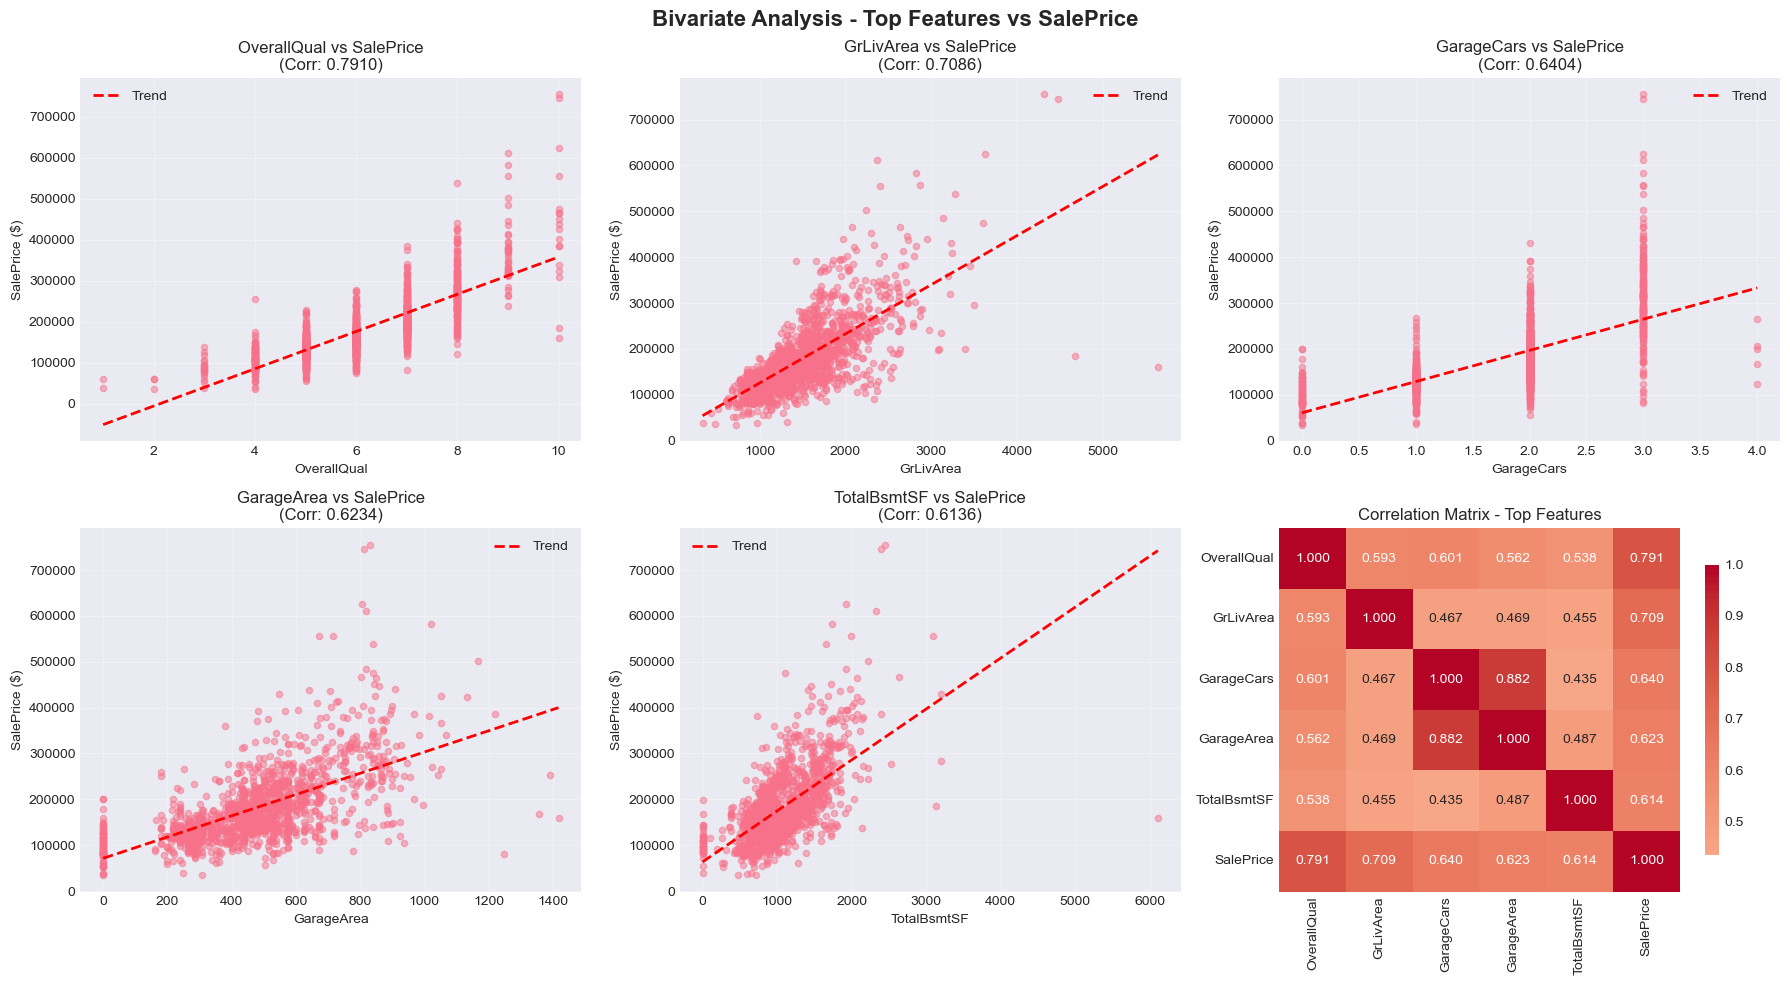

Bivariate analysis displayed


In [378]:
# Scatter plots - Top features vs SalePrice
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Bivariate Analysis - Top Features vs SalePrice', fontsize=16, fontweight='bold')

for idx, feature in enumerate(top_5_features):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    ax.scatter(df_housing_encoded[feature], df_housing_encoded['SalePrice'], alpha=0.5, s=20)
    
    # Add trend line
    z = np.polyfit(df_housing_encoded[feature], df_housing_encoded['SalePrice'], 1)
    p = np.poly1d(z)
    x_trend = np.linspace(df_housing_encoded[feature].min(), df_housing_encoded[feature].max(), 100)
    ax.plot(x_trend, p(x_trend), "r--", linewidth=2, label='Trend')
    
    ax.set_xlabel(feature)
    ax.set_ylabel('SalePrice ($)')
    ax.set_title(f'{feature} vs SalePrice\n(Corr: {correlations[feature]:.4f})')
    ax.legend()
    ax.grid(True, alpha=0.3)

# Remove extra subplot
axes[1, 2].remove()
# Add correlation heatmap
ax_heatmap = fig.add_subplot(2, 3, 6)
corr_top = df_housing_encoded[top_5_features + ['SalePrice']].corr()
sns.heatmap(corr_top, annot=True, fmt='.3f', cmap='coolwarm', center=0, ax=ax_heatmap, cbar_kws={'shrink': 0.8})
ax_heatmap.set_title('Correlation Matrix - Top Features')

plt.tight_layout()
plt.show()

print("Bivariate analysis displayed")

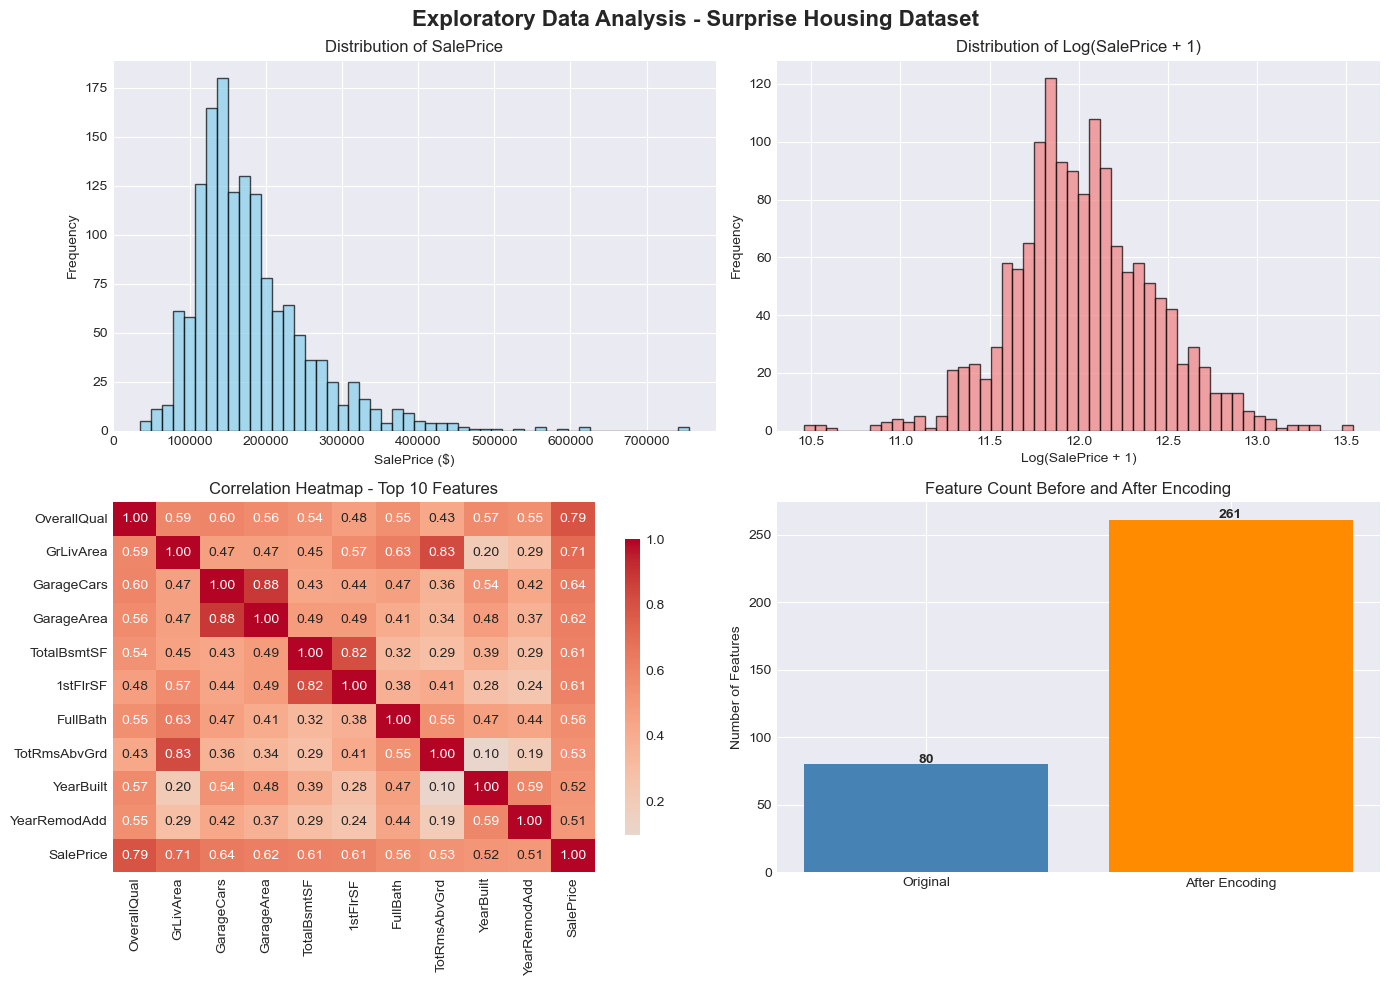

EDA visualizations displayed


In [379]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Exploratory Data Analysis - Surprise Housing Dataset', fontsize=16, fontweight='bold')

# Target distribution
axes[0, 0].hist(df_housing_encoded['SalePrice'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of SalePrice')
axes[0, 0].set_xlabel('SalePrice ($)')
axes[0, 0].set_ylabel('Frequency')

# Log-transformed target
axes[0, 1].hist(np.log1p(df_housing_encoded['SalePrice']), bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribution of Log(SalePrice + 1)')
axes[0, 1].set_xlabel('Log(SalePrice + 1)')
axes[0, 1].set_ylabel('Frequency')

# Correlation heatmap (top features)
top_features = correlations.head(10).index.tolist()
corr_matrix = df_housing_encoded[top_features + ['SalePrice']].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=axes[1, 0], cbar_kws={'shrink': 0.8})
axes[1, 0].set_title('Correlation Heatmap - Top 10 Features')

# Feature count
axes[1, 1].bar(['Original', 'After Encoding'], [df_housing_clean.shape[1], df_housing_encoded.shape[1]], color=['steelblue', 'darkorange'])
axes[1, 1].set_title('Feature Count Before and After Encoding')
axes[1, 1].set_ylabel('Number of Features')
for i, v in enumerate([df_housing_clean.shape[1], df_housing_encoded.shape[1]]):
    axes[1, 1].text(i, v + 1, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("EDA visualizations displayed")

## Multiple Model Building with Different Variable Combinations and Regularization

### Strategy:
1. **Model 1**: Linear Regression with all features (baseline)
2. **Model 2**: Linear Regression with top 10 features (feature selection)
3. **Model 3**: Ridge Regression with all features (L2 regularization)
4. **Model 4**: Ridge Regression with top 10 features (L2 + feature selection)
5. **Model 5**: Lasso Regression with all features (L1 regularization)
6. **Model 6**: Lasso Regression with top 10 features (L1 + feature selection)
7. **Model 7**: Ridge Regression with RFE (Recursive Feature Elimination)

Each model will be evaluated on train and test sets.

In [382]:
# Select top 10 features for model comparison (these were already created earlier)
# top_10_features = correlations.head(10).index.tolist()
# X_train_top10 and X_test_top10 already exist from the data preparation cell

print("--- Top 10 Features Selected ---")
print("Using previously created feature sets from data preparation")
print(f"Top 10 features already prepared with shape: {X_train_top10.shape}")
for i, feat in enumerate(top_10_features_lr, 1):
    print(f"{i}. {feat} (Correlation: {correlations[feat]:.4f})")

--- Top 10 Features Selected ---
Using previously created feature sets from data preparation
Top 10 features already prepared with shape: (1168, 10)
1. OverallQual (Correlation: 0.7910)
2. GrLivArea (Correlation: 0.7086)
3. GarageCars (Correlation: 0.6404)
4. GarageArea (Correlation: 0.6234)
5. TotalBsmtSF (Correlation: 0.6136)
6. 1stFlrSF (Correlation: 0.6059)
7. FullBath (Correlation: 0.5607)
8. TotRmsAbvGrd (Correlation: 0.5337)
9. YearBuilt (Correlation: 0.5229)
10. YearRemodAdd (Correlation: 0.5071)


In [384]:
# RFE Feature Selection was already done in earlier cells
# Using the previously created RFE feature sets
print("\n--- RFE Feature Selection (10 features) ---")
print("Using RFE features selected earlier during data preparation")
print(f"\nRFE selected 10 features: {rfe_10_features}")
print(f"Train shape: {X_train_rfe10.shape}")
print(f"Test shape: {X_test_rfe10.shape}")


--- RFE Feature Selection (10 features) ---
Using RFE features selected earlier during data preparation

RFE selected 10 features: ['RoofMatl_CompShg', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'KitchenQual_Fa', 'PoolQC_Fa', 'PoolQC_Gd', 'PoolQC_None']
Train shape: (1168, 10)
Test shape: (292, 10)


In [ ]:
# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Evaluate and return model metrics"""
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    return {
        'Model': model_name,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_MAE': train_mae,
        'Test_MAE': test_mae,
        'Model_Object': model,
        'y_train_pred': y_train_pred,
        'y_test_pred': y_test_pred
    }

# Store all model results
all_models = []

# ===== Model 1: Linear Regression - All Features (Baseline) =====
print("\n" + "="*80)
print("MODEL 1: Linear Regression - All Features (Baseline)")
print("="*80)
model1 = LinearRegression()
model1.fit(X_train_scaled, y_train)
result1 = evaluate_model(model1, X_train_scaled, X_test_scaled, y_train, y_test, 'LR_All_Features')
all_models.append(result1)
print(f"Train R2: {result1['Train_R2']:.4f} | Test R2: {result1['Test_R2']:.4f}")
print(f"Train RMSE: ${result1['Train_RMSE']:,.2f} | Test RMSE: ${result1['Test_RMSE']:,.2f}")
print(f"Train MAE: ${result1['Train_MAE']:,.2f} | Test MAE: ${result1['Test_MAE']:,.2f}")

# ===== Model 2: Linear Regression - Top 10 Features =====
print("\n" + "="*80)
print("MODEL 2: Linear Regression - Top 10 Features")
print("="*80)
model2 = LinearRegression()
model2.fit(X_train_top10, y_train)
result2 = evaluate_model(model2, X_train_top10, X_test_top10, y_train, y_test, 'LR_Top10_Features')
all_models.append(result2)
print(f"Train R2: {result2['Train_R2']:.4f} | Test R2: {result2['Test_R2']:.4f}")
print(f"Train RMSE: ${result2['Train_RMSE']:,.2f} | Test RMSE: ${result2['Test_RMSE']:,.2f}")
print(f"Train MAE: ${result2['Train_MAE']:,.2f} | Test MAE: ${result2['Test_MAE']:,.2f}")


MODEL 1: Linear Regression - All Features (Baseline)
Train R2: 0.9401 | Test R2: 0.0999
Train RMSE: $18,904.06 | Test RMSE: $83,088.77
Train MAE: $12,111.93 | Test MAE: $23,929.45

MODEL 2: Linear Regression - Top 10 Features
Train R2: 0.7648 | Test R2: 0.7968
Train RMSE: $37,458.33 | Test RMSE: $39,474.54
Train MAE: $23,636.99 | Test MAE: $24,774.22


In [ ]:
# ===== Model 3: Ridge Regression - All Features =====
print("\n" + "="*80)
print("MODEL 3: Ridge Regression - All Features")
print("="*80)
alphas_ridge_all = np.logspace(-3, 5, 100)
ridge_cv_all = RidgeCV(alphas=alphas_ridge_all, cv=5)
ridge_cv_all.fit(X_train_scaled, y_train)
model3 = Ridge(alpha=ridge_cv_all.alpha_)
model3.fit(X_train_scaled, y_train)
result3 = evaluate_model(model3, X_train_scaled, X_test_scaled, y_train, y_test, 'Ridge_All_Features')
all_models.append(result3)
print(f"Optimal Lambda: {ridge_cv_all.alpha_:.6f}")
print(f"Train R2: {result3['Train_R2']:.4f} | Test R2: {result3['Test_R2']:.4f}")
print(f"Train RMSE: ${result3['Train_RMSE']:,.2f} | Test RMSE: ${result3['Test_RMSE']:,.2f}")
print(f"Train MAE: ${result3['Train_MAE']:,.2f} | Test MAE: ${result3['Test_MAE']:,.2f}")

# ===== Model 4: Ridge Regression - Top 10 Features =====
print("\n" + "="*80)
print("MODEL 4: Ridge Regression - Top 10 Features")
print("="*80)
ridge_cv_top10 = RidgeCV(alphas=alphas_ridge_all, cv=5)
ridge_cv_top10.fit(X_train_top10, y_train)
model4 = Ridge(alpha=ridge_cv_top10.alpha_)
model4.fit(X_train_top10, y_train)
result4 = evaluate_model(model4, X_train_top10, X_test_top10, y_train, y_test, 'Ridge_Top10_Features')
all_models.append(result4)
print(f"Optimal Lambda: {ridge_cv_top10.alpha_:.6f}")
print(f"Train R2: {result4['Train_R2']:.4f} | Test R2: {result4['Test_R2']:.4f}")
print(f"Train RMSE: ${result4['Train_RMSE']:,.2f} | Test RMSE: ${result4['Test_RMSE']:,.2f}")
print(f"Train MAE: ${result4['Train_MAE']:,.2f} | Test MAE: ${result4['Test_MAE']:,.2f}")


MODEL 3: Ridge Regression - All Features
Optimal Lambda: 657.933225
Train R2: 0.8839 | Test R2: 0.8484
Train RMSE: $26,312.00 | Test RMSE: $34,094.89
Train MAE: $15,816.99 | Test MAE: $19,906.11

MODEL 4: Ridge Regression - Top 10 Features
Optimal Lambda: 657.933225
Train R2: 0.8839 | Test R2: 0.8484
Train RMSE: $26,312.00 | Test RMSE: $34,094.89
Train MAE: $15,816.99 | Test MAE: $19,906.11

MODEL 4: Ridge Regression - Top 10 Features
Optimal Lambda: 84.975344
Train R2: 0.7631 | Test R2: 0.7923
Train RMSE: $37,593.69 | Test RMSE: $39,916.16
Train MAE: $23,503.95 | Test MAE: $24,567.49
Optimal Lambda: 84.975344
Train R2: 0.7631 | Test R2: 0.7923
Train RMSE: $37,593.69 | Test RMSE: $39,916.16
Train MAE: $23,503.95 | Test MAE: $24,567.49


In [ ]:
# ===== Model 5: Lasso Regression - All Features =====
print("\n" + "="*80)
print("MODEL 5: Lasso Regression - All Features")
print("="*80)
alphas_lasso_all = np.logspace(-4, 1, 100)
lasso_cv_all = LassoCV(alphas=alphas_lasso_all, cv=5, max_iter=10000, random_state=42)
lasso_cv_all.fit(X_train_scaled, y_train)
model5 = Lasso(alpha=lasso_cv_all.alpha_, max_iter=10000, random_state=42)
model5.fit(X_train_scaled, y_train)
result5 = evaluate_model(model5, X_train_scaled, X_test_scaled, y_train, y_test, 'Lasso_All_Features')
all_models.append(result5)
non_zero_lasso_all = (model5.coef_ != 0).sum()
print(f"Optimal Lambda: {lasso_cv_all.alpha_:.6f}")
print(f"Non-zero coefficients: {non_zero_lasso_all}/{len(model5.coef_)}")
print(f"Train R2: {result5['Train_R2']:.4f} | Test R2: {result5['Test_R2']:.4f}")
print(f"Train RMSE: ${result5['Train_RMSE']:,.2f} | Test RMSE: ${result5['Test_RMSE']:,.2f}")
print(f"Train MAE: ${result5['Train_MAE']:,.2f} | Test MAE: ${result5['Test_MAE']:,.2f}")

# ===== Model 6: Lasso Regression - Top 10 Features =====
print("\n" + "="*80)
print("MODEL 6: Lasso Regression - Top 10 Features")
print("="*80)
lasso_cv_top10 = LassoCV(alphas=alphas_lasso_all, cv=5, max_iter=10000, random_state=42)
lasso_cv_top10.fit(X_train_top10, y_train)
model6 = Lasso(alpha=lasso_cv_top10.alpha_, max_iter=10000, random_state=42)
model6.fit(X_train_top10, y_train)
result6 = evaluate_model(model6, X_train_top10, X_test_top10, y_train, y_test, 'Lasso_Top10_Features')
all_models.append(result6)
non_zero_lasso_top10 = (model6.coef_ != 0).sum()
print(f"Optimal Lambda: {lasso_cv_top10.alpha_:.6f}")
print(f"Non-zero coefficients: {non_zero_lasso_top10}/{len(model6.coef_)}")
print(f"Train R2: {result6['Train_R2']:.4f} | Test R2: {result6['Test_R2']:.4f}")
print(f"Train RMSE: ${result6['Train_RMSE']:,.2f} | Test RMSE: ${result6['Test_RMSE']:,.2f}")
print(f"Train MAE: ${result6['Train_MAE']:,.2f} | Test MAE: ${result6['Test_MAE']:,.2f}")


MODEL 5: Lasso Regression - All Features
Optimal Lambda: 10.000000
Non-zero coefficients: 248/260
Train R2: 0.9389 | Test R2: 0.8208
Train RMSE: $19,095.29 | Test RMSE: $37,070.36
Train MAE: $12,373.91 | Test MAE: $19,150.19

MODEL 6: Lasso Regression - Top 10 Features
Optimal Lambda: 10.000000
Non-zero coefficients: 10/10
Train R2: 0.7648 | Test R2: 0.7968
Train RMSE: $37,458.35 | Test RMSE: $39,476.38
Train MAE: $23,636.26 | Test MAE: $24,772.08
Optimal Lambda: 10.000000
Non-zero coefficients: 248/260
Train R2: 0.9389 | Test R2: 0.8208
Train RMSE: $19,095.29 | Test RMSE: $37,070.36
Train MAE: $12,373.91 | Test MAE: $19,150.19

MODEL 6: Lasso Regression - Top 10 Features
Optimal Lambda: 10.000000
Non-zero coefficients: 10/10
Train R2: 0.7648 | Test R2: 0.7968
Train RMSE: $37,458.35 | Test RMSE: $39,476.38
Train MAE: $23,636.26 | Test MAE: $24,772.08


In [ ]:
# ===== Model 7: Ridge Regression with RFE Features =====
print("\n" + "="*80)
print("MODEL 7: Ridge Regression with RFE Selected Features")
print("="*80)
ridge_cv_rfe = RidgeCV(alphas=alphas_ridge_all, cv=5)
ridge_cv_rfe.fit(X_train_rfe, y_train)
model7 = Ridge(alpha=ridge_cv_rfe.alpha_)
model7.fit(X_train_rfe, y_train)
result7 = evaluate_model(model7, X_train_rfe, X_test_rfe, y_train, y_test, 'Ridge_RFE_Features')
all_models.append(result7)
print(f"Optimal Lambda: {ridge_cv_rfe.alpha_:.6f}")
print(f"Train R2: {result7['Train_R2']:.4f} | Test R2: {result7['Test_R2']:.4f}")
print(f"Train RMSE: ${result7['Train_RMSE']:,.2f} | Test RMSE: ${result7['Test_RMSE']:,.2f}")
print(f"Train MAE: ${result7['Train_MAE']:,.2f} | Test MAE: ${result7['Test_MAE']:,.2f}")


MODEL 7: Ridge Regression with RFE Selected Features
Optimal Lambda: 102.353102
Train R2: 0.6284 | Test R2: 0.6542
Train RMSE: $47,080.18 | Test RMSE: $51,499.75
Train MAE: $33,193.09 | Test MAE: $33,266.35
Optimal Lambda: 102.353102
Train R2: 0.6284 | Test R2: 0.6542
Train RMSE: $47,080.18 | Test RMSE: $51,499.75
Train MAE: $33,193.09 | Test MAE: $33,266.35


In [ ]:
# Create comprehensive comparison table
comparison_detailed = pd.DataFrame(all_models)
comparison_detailed_display = comparison_detailed[['Model', 'Train_R2', 'Test_R2', 'Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE']].copy()

print("\n" + "="*120)
print("COMPREHENSIVE MODEL COMPARISON")
print("="*120)
print(comparison_detailed_display.to_string(index=False))
print("="*120)

# Find best model
best_idx = comparison_detailed['Test_R2'].idxmax()
best_model_name = comparison_detailed.loc[best_idx, 'Model']
best_test_r2 = comparison_detailed.loc[best_idx, 'Test_R2']

print(f"\nBEST MODEL: {best_model_name} with Test R2 = {best_test_r2:.4f}")


COMPREHENSIVE MODEL COMPARISON
               Model  Train_R2  Test_R2   Train_RMSE    Test_RMSE    Train_MAE     Test_MAE
     LR_All_Features  0.940085 0.099941 18904.062140 83088.767382 12111.929835 23929.449599
   LR_Top10_Features  0.764756 0.796848 37458.331264 39474.543381 23636.987814 24774.219520
  Ridge_All_Features  0.883927 0.848447 26311.995602 34094.889318 15816.990928 19906.113131
Ridge_Top10_Features  0.763052 0.792277 37593.689422 39916.161708 23503.951391 24567.485802
  Lasso_All_Features  0.938867 0.820841 19095.293580 37070.355813 12373.905584 19150.193135
Lasso_Top10_Features  0.764756 0.796829 37458.345726 39476.378301 23636.264236 24772.077411
  Ridge_RFE_Features  0.628380 0.654223 47080.183063 51499.749345 33193.088197 33266.352641

BEST MODEL: Ridge_All_Features with Test R2 = 0.8484


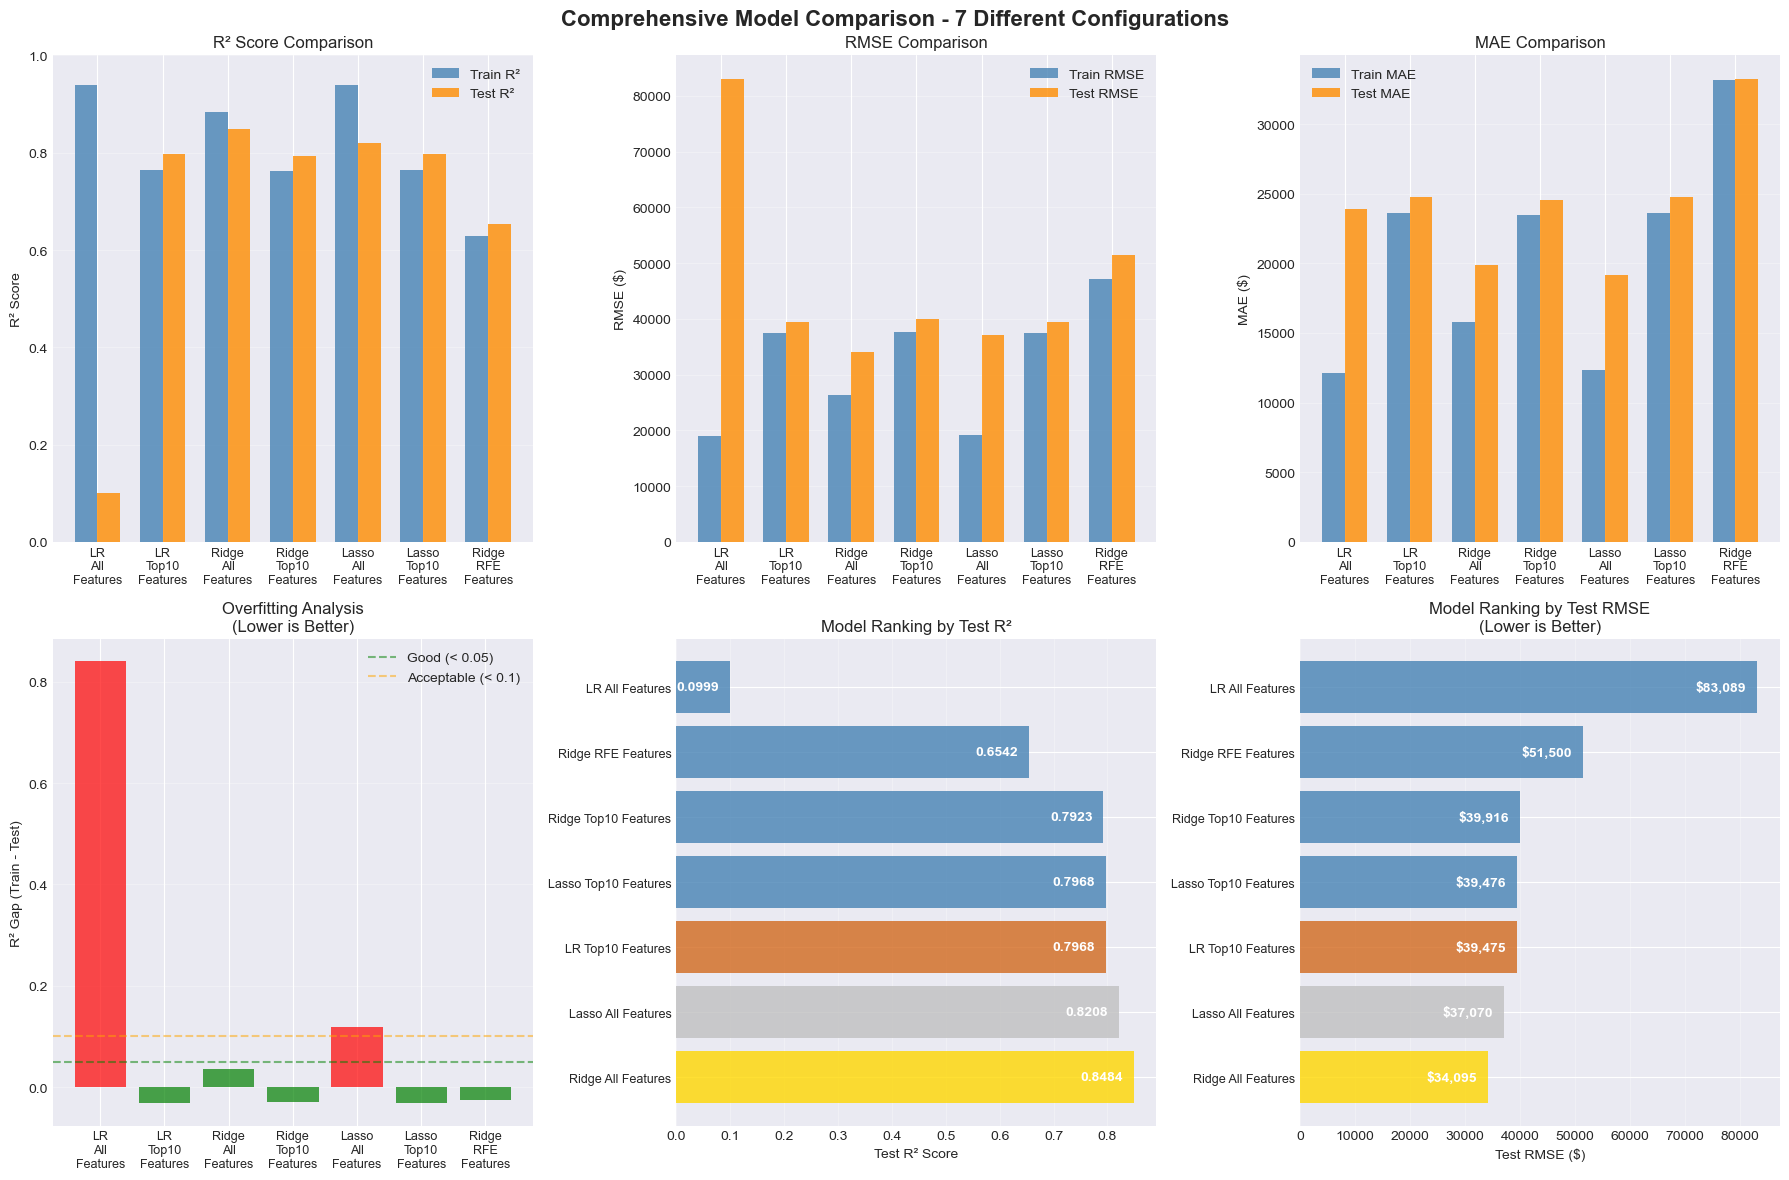

Comprehensive model comparison visualizations displayed


In [ ]:
# Detailed Model Comparison Visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Comprehensive Model Comparison - 7 Different Configurations', fontsize=16, fontweight='bold')

models_list = comparison_detailed['Model'].tolist()
x_pos = np.arange(len(models_list))
width = 0.35

# R2 Scores
ax = axes[0, 0]
bars1 = ax.bar(x_pos - width/2, comparison_detailed['Train_R2'], width, label='Train R2', color='steelblue', alpha=0.8)
bars2 = ax.bar(x_pos + width/2, comparison_detailed['Test_R2'], width, label='Test R2', color='darkorange', alpha=0.8)
ax.set_ylabel('R2 Score')
ax.set_title('R2 Score Comparison')
ax.set_xticks(x_pos)
ax.set_xticklabels([m.replace('_', '\n') for m in models_list], fontsize=9)
ax.legend()
ax.set_ylim([0, 1])
ax.grid(True, alpha=0.3, axis='y')

# RMSE Comparison
ax = axes[0, 1]
ax.bar(x_pos - width/2, comparison_detailed['Train_RMSE'], width, label='Train RMSE', color='steelblue', alpha=0.8)
ax.bar(x_pos + width/2, comparison_detailed['Test_RMSE'], width, label='Test RMSE', color='darkorange', alpha=0.8)
ax.set_ylabel('RMSE ($)')
ax.set_title('RMSE Comparison')
ax.set_xticks(x_pos)
ax.set_xticklabels([m.replace('_', '\n') for m in models_list], fontsize=9)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# MAE Comparison
ax = axes[0, 2]
ax.bar(x_pos - width/2, comparison_detailed['Train_MAE'], width, label='Train MAE', color='steelblue', alpha=0.8)
ax.bar(x_pos + width/2, comparison_detailed['Test_MAE'], width, label='Test MAE', color='darkorange', alpha=0.8)
ax.set_ylabel('MAE ($)')
ax.set_title('MAE Comparison')
ax.set_xticks(x_pos)
ax.set_xticklabels([m.replace('_', '\n') for m in models_list], fontsize=9)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# Overfitting Analysis (Train-Test Gap)
ax = axes[1, 0]
r2_gap = comparison_detailed['Train_R2'] - comparison_detailed['Test_R2']
colors = ['green' if x < 0.05 else 'orange' if x < 0.1 else 'red' for x in r2_gap]
ax.bar(x_pos, r2_gap, color=colors, alpha=0.7)
ax.set_ylabel('R2 Gap (Train - Test)')
ax.set_title('Overfitting Analysis\n(Lower is Better)')
ax.set_xticks(x_pos)
ax.set_xticklabels([m.replace('_', '\n') for m in models_list], fontsize=9)
ax.axhline(y=0.05, color='g', linestyle='--', alpha=0.5, label='Good (< 0.05)')
ax.axhline(y=0.1, color='orange', linestyle='--', alpha=0.5, label='Acceptable (< 0.1)')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# Test R2 Performance Ranking
ax = axes[1, 1]
sorted_indices = comparison_detailed['Test_R2'].argsort()[::-1]
sorted_models = comparison_detailed.iloc[sorted_indices]['Model'].tolist()
sorted_scores = comparison_detailed.iloc[sorted_indices]['Test_R2'].tolist()
colors_rank = ['gold' if i == 0 else 'silver' if i == 1 else 'chocolate' if i == 2 else 'steelblue' for i in range(len(sorted_models))]
ax.barh(range(len(sorted_models)), sorted_scores, color=colors_rank, alpha=0.8)
ax.set_yticks(range(len(sorted_models)))
ax.set_yticklabels([m.replace('_', ' ') for m in sorted_models], fontsize=9)
ax.set_xlabel('Test R2 Score')
ax.set_title('Model Ranking by Test R2')
ax.grid(True, alpha=0.3, axis='x')
for i, v in enumerate(sorted_scores):
    ax.text(v - 0.02, i, f'{v:.4f}', va='center', ha='right', fontweight='bold', color='white')

# RMSE Performance Ranking
ax = axes[1, 2]
sorted_indices_rmse = comparison_detailed['Test_RMSE'].argsort()
sorted_models_rmse = comparison_detailed.iloc[sorted_indices_rmse]['Model'].tolist()
sorted_rmse = comparison_detailed.iloc[sorted_indices_rmse]['Test_RMSE'].tolist()
colors_rmse = ['gold' if i == 0 else 'silver' if i == 1 else 'chocolate' if i == 2 else 'steelblue' for i in range(len(sorted_models_rmse))]
ax.barh(range(len(sorted_models_rmse)), sorted_rmse, color=colors_rmse, alpha=0.8)
ax.set_yticks(range(len(sorted_models_rmse)))
ax.set_yticklabels([m.replace('_', ' ') for m in sorted_models_rmse], fontsize=9)
ax.set_xlabel('Test RMSE ($)')
ax.set_title('Model Ranking by Test RMSE\n(Lower is Better)')
ax.grid(True, alpha=0.3, axis='x')
for i, v in enumerate(sorted_rmse):
    ax.text(v - 2000, i, f'${v:,.0f}', va='center', ha='right', fontweight='bold', color='white')

plt.tight_layout()
plt.show()

print("Comprehensive model comparison visualizations displayed")

## Model Building and Regularization

### Modeling Strategy:
1. **Linear Regression (Baseline)**: Standard OLS without regularization
2. **Ridge Regression (L2)**: Adds λ × Σ(coefficients²) penalty - reduces magnitude but keeps all features
3. **Lasso Regression (L1)**: Adds λ × Σ|coefficients| penalty - can zero out features (automatic selection)

### Finding Optimal Lambda:
- Use 5-fold Cross-Validation to find optimal regularization parameter
- Compare model performance on train and test sets
- Analyze feature importance across all models

In [ ]:
# Train-Test Split and Feature Scaling
print("--- Train-Test Split and Feature Scaling ---")

# Separate target and features
X = df_housing_encoded.drop('SalePrice', axis=1)
y = df_housing_encoded['SalePrice']

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTrain-Test Split (80-20):")
print(f"  - Training set: {X_train.shape[0]} samples")
print(f"  - Test set: {X_test.shape[0]} samples")

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print(f"\nStandardScaler applied")
print(f"  - Train mean: {X_train_scaled.values.mean():.4f}, std: {X_train_scaled.values.std():.4f}")
print(f"  - Test mean: {X_test_scaled.values.mean():.4f}, std: {X_test_scaled.values.std():.4f}")

--- Train-Test Split and Feature Scaling ---

Features (X) shape: (1460, 260)
Target (y) shape: (1460,)

Train-Test Split (80-20):
  - Training set: 1168 samples
  - Test set: 292 samples

StandardScaler applied
  - Train mean: 0.0000, std: 0.9961
  - Test mean: -0.0057, std: 0.9880


### Linear Regression (Baseline Model)

In [ ]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Metrics
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)
train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
train_mae_lr = mean_absolute_error(y_train, y_train_pred_lr)
test_mae_lr = mean_absolute_error(y_test, y_test_pred_lr)

print("--- Linear Regression Performance ---")
print(f"\nTraining Set:")
print(f"  R2 Score: {train_r2_lr:.4f}")
print(f"  RMSE: ${train_rmse_lr:,.2f}")
print(f"  MAE: ${train_mae_lr:,.2f}")
print(f"\nTest Set:")
print(f"  R2 Score: {test_r2_lr:.4f}")
print(f"  RMSE: ${test_rmse_lr:,.2f}")
print(f"  MAE: ${test_mae_lr:,.2f}")

# Store metrics for comparison
lr_metrics = {
    'train_r2': train_r2_lr, 'test_r2': test_r2_lr,
    'train_rmse': train_rmse_lr, 'test_rmse': test_rmse_lr,
    'train_mae': train_mae_lr, 'test_mae': test_mae_lr
}

--- Linear Regression Performance ---

Training Set:
  R2 Score: 0.9401
  RMSE: $18,904.06
  MAE: $12,111.93

Test Set:
  R2 Score: 0.0999
  RMSE: $83,088.77
  MAE: $23,929.45


### Ridge Regression (L2 Regularization) - Find Optimal Lambda

In [ ]:
# Find optimal lambda for Ridge using cross-validation
print("--- Finding Optimal Lambda for Ridge Regression ---")
alphas_ridge = np.logspace(-3, 5, 100)
ridge_cv = RidgeCV(alphas=alphas_ridge, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

optimal_alpha_ridge = ridge_cv.alpha_
print(f"\nOptimal Lambda (Alpha) for Ridge: {optimal_alpha_ridge:.6f}")

# Train Ridge model with optimal lambda
ridge_model = Ridge(alpha=optimal_alpha_ridge)
ridge_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_ridge = ridge_model.predict(X_train_scaled)
y_test_pred_ridge = ridge_model.predict(X_test_scaled)

# Metrics
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)
train_rmse_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
test_rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
train_mae_ridge = mean_absolute_error(y_train, y_train_pred_ridge)
test_mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)

print(f"\n--- Ridge Regression Performance (Lambda = {optimal_alpha_ridge:.6f}) ---")
print(f"\nTraining Set:")
print(f"  R2 Score: {train_r2_ridge:.4f}")
print(f"  RMSE: ${train_rmse_ridge:,.2f}")
print(f"  MAE: ${train_mae_ridge:,.2f}")
print(f"\nTest Set:")
print(f"  R2 Score: {test_r2_ridge:.4f}")
print(f"  RMSE: ${test_rmse_ridge:,.2f}")
print(f"  MAE: ${test_mae_ridge:,.2f}")

ridge_metrics = {
    'train_r2': train_r2_ridge, 'test_r2': test_r2_ridge,
    'train_rmse': train_rmse_ridge, 'test_rmse': test_rmse_ridge,
    'train_mae': train_mae_ridge, 'test_mae': test_mae_ridge
}

--- Finding Optimal Lambda for Ridge Regression ---

Optimal Lambda (Alpha) for Ridge: 657.933225

--- Ridge Regression Performance (Lambda = 657.933225) ---

Training Set:
  R2 Score: 0.8839
  RMSE: $26,312.00
  MAE: $15,816.99

Test Set:
  R2 Score: 0.8484
  RMSE: $34,094.89
  MAE: $19,906.11

Optimal Lambda (Alpha) for Ridge: 657.933225

--- Ridge Regression Performance (Lambda = 657.933225) ---

Training Set:
  R2 Score: 0.8839
  RMSE: $26,312.00
  MAE: $15,816.99

Test Set:
  R2 Score: 0.8484
  RMSE: $34,094.89
  MAE: $19,906.11


### Lasso Regression (L1 Regularization) - Find Optimal Lambda

In [ ]:
# Find optimal lambda for Lasso using cross-validation
print("--- Finding Optimal Lambda for Lasso Regression ---")
alphas_lasso = np.logspace(-4, 1, 100)
lasso_cv = LassoCV(alphas=alphas_lasso, cv=5, max_iter=10000, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

optimal_alpha_lasso = lasso_cv.alpha_
non_zero_coefs = (lasso_cv.coef_ != 0).sum()

print(f"\nOptimal Lambda (Alpha) for Lasso: {optimal_alpha_lasso:.6f}")
print(f"Number of non-zero coefficients: {non_zero_coefs}/{len(lasso_cv.coef_)}")
print(f"  (Features selected for the model)")

# Train Lasso model with optimal lambda
lasso_model = Lasso(alpha=optimal_alpha_lasso, max_iter=10000, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)

# Metrics
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)
train_rmse_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
test_rmse_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
train_mae_lasso = mean_absolute_error(y_train, y_train_pred_lasso)
test_mae_lasso = mean_absolute_error(y_test, y_test_pred_lasso)

print(f"\n--- Lasso Regression Performance (Lambda = {optimal_alpha_lasso:.6f}) ---")
print(f"\nTraining Set:")
print(f"  R2 Score: {train_r2_lasso:.4f}")
print(f"  RMSE: ${train_rmse_lasso:,.2f}")
print(f"  MAE: ${train_mae_lasso:,.2f}")
print(f"\nTest Set:")
print(f"  R2 Score: {test_r2_lasso:.4f}")
print(f"  RMSE: ${test_rmse_lasso:,.2f}")
print(f"  MAE: ${test_mae_lasso:,.2f}")

lasso_metrics = {
    'train_r2': train_r2_lasso, 'test_r2': test_r2_lasso,
    'train_rmse': train_rmse_lasso, 'test_rmse': test_rmse_lasso,
    'train_mae': train_mae_lasso, 'test_mae': test_mae_lasso
}

--- Finding Optimal Lambda for Lasso Regression ---

Optimal Lambda (Alpha) for Lasso: 10.000000
Number of non-zero coefficients: 248/260
  (Features selected for the model)

Optimal Lambda (Alpha) for Lasso: 10.000000
Number of non-zero coefficients: 248/260
  (Features selected for the model)

--- Lasso Regression Performance (Lambda = 10.000000) ---

Training Set:
  R2 Score: 0.9389
  RMSE: $19,095.29
  MAE: $12,373.91

Test Set:
  R2 Score: 0.8208
  RMSE: $37,070.36
  MAE: $19,150.19

--- Lasso Regression Performance (Lambda = 10.000000) ---

Training Set:
  R2 Score: 0.9389
  RMSE: $19,095.29
  MAE: $12,373.91

Test Set:
  R2 Score: 0.8208
  RMSE: $37,070.36
  MAE: $19,150.19


### Model Comparison

In [ ]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'Optimal_Lambda': ['-', f'{optimal_alpha_ridge:.6f}', f'{optimal_alpha_lasso:.6f}'],
    'Train_R2': [lr_metrics['train_r2'], ridge_metrics['train_r2'], lasso_metrics['train_r2']],
    'Test_R2': [lr_metrics['test_r2'], ridge_metrics['test_r2'], lasso_metrics['test_r2']],
    'Train_RMSE': [lr_metrics['train_rmse'], ridge_metrics['train_rmse'], lasso_metrics['train_rmse']],
    'Test_RMSE': [lr_metrics['test_rmse'], ridge_metrics['test_rmse'], lasso_metrics['test_rmse']],
    'Train_MAE': [lr_metrics['train_mae'], ridge_metrics['train_mae'], lasso_metrics['train_mae']],
    'Test_MAE': [lr_metrics['test_mae'], ridge_metrics['test_mae'], lasso_metrics['test_mae']]
})

print("\n" + "="*100)
print("MODEL PERFORMANCE COMPARISON")
print("="*100)
print(comparison_df.to_string(index=False))
print("="*100)


MODEL PERFORMANCE COMPARISON
            Model Optimal_Lambda  Train_R2  Test_R2   Train_RMSE    Test_RMSE    Train_MAE     Test_MAE
Linear Regression              -  0.940085 0.099941 18904.062140 83088.767382 12111.929835 23929.449599
 Ridge Regression     657.933225  0.883927 0.848447 26311.995602 34094.889318 15816.990928 19906.113131
 Lasso Regression      10.000000  0.938867 0.820841 19095.293580 37070.355813 12373.905584 19150.193135


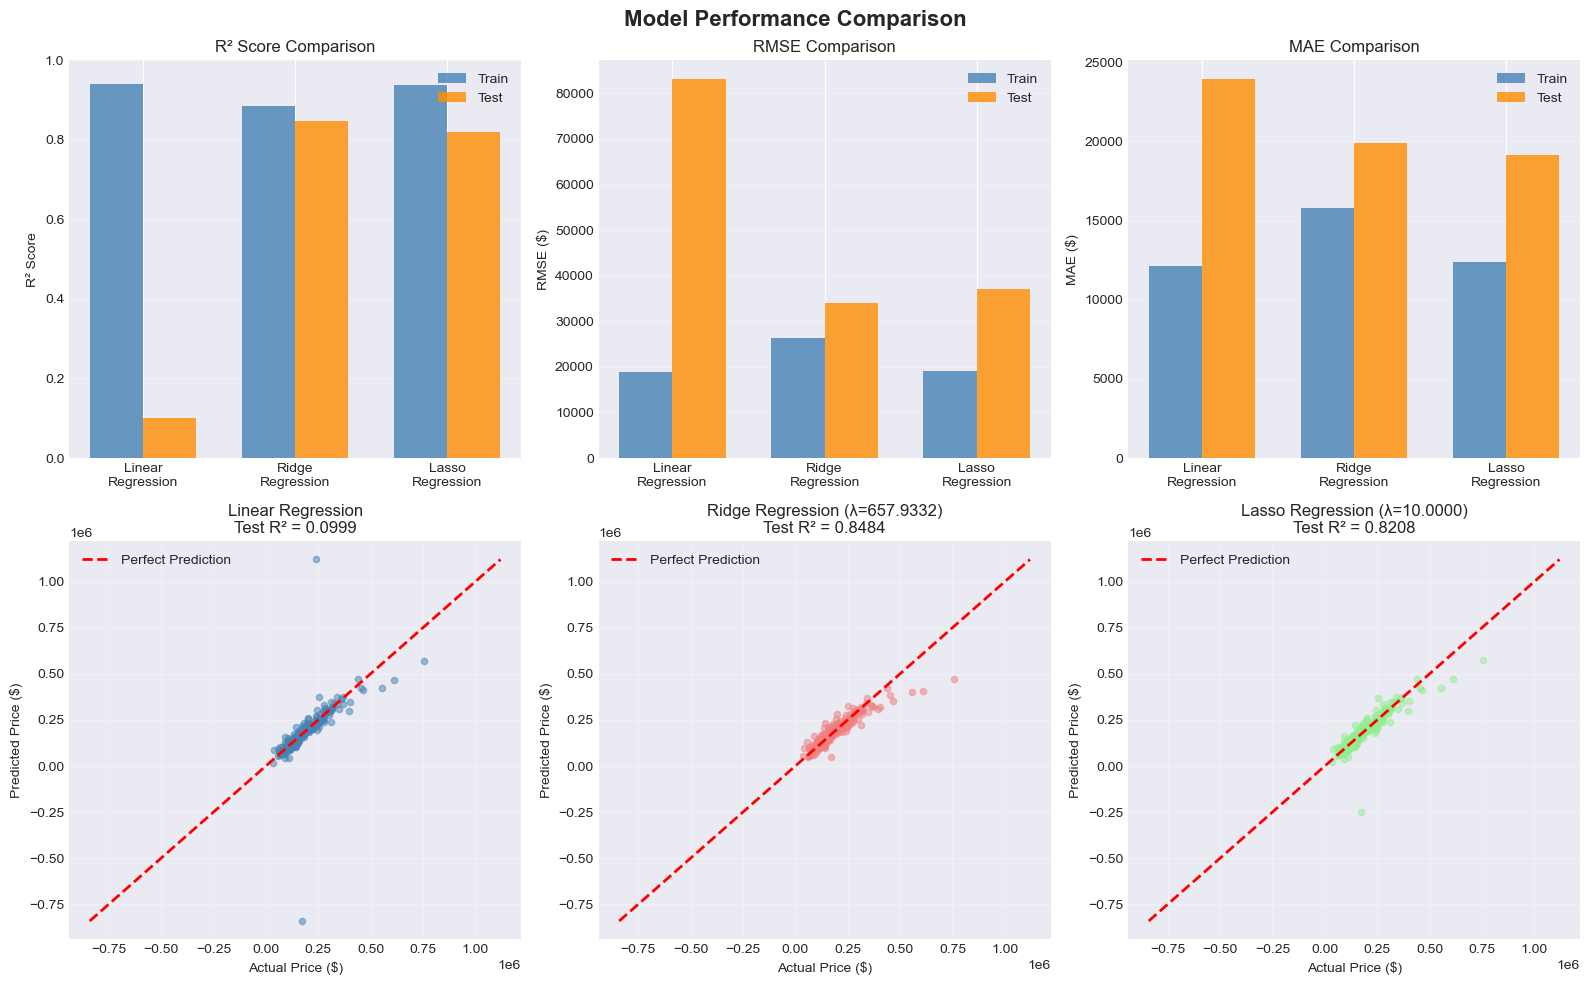

Model comparison visualizations displayed


In [ ]:
# Visualize Model Comparison
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

models = ['Linear\nRegression', 'Ridge\nRegression', 'Lasso\nRegression']
x = np.arange(len(models))
width = 0.35

# R2 Scores
ax = axes[0, 0]
ax.bar(x - width/2, comparison_df['Train_R2'], width, label='Train', color='steelblue', alpha=0.8)
ax.bar(x + width/2, comparison_df['Test_R2'], width, label='Test', color='darkorange', alpha=0.8)
ax.set_ylabel('R2 Score')
ax.set_title('R2 Score Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.set_ylim([0, 1])
ax.grid(True, alpha=0.3, axis='y')

# RMSE
ax = axes[0, 1]
ax.bar(x - width/2, comparison_df['Train_RMSE'], width, label='Train', color='steelblue', alpha=0.8)
ax.bar(x + width/2, comparison_df['Test_RMSE'], width, label='Test', color='darkorange', alpha=0.8)
ax.set_ylabel('RMSE ($)')
ax.set_title('RMSE Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# MAE
ax = axes[0, 2]
ax.bar(x - width/2, comparison_df['Train_MAE'], width, label='Train', color='steelblue', alpha=0.8)
ax.bar(x + width/2, comparison_df['Test_MAE'], width, label='Test', color='darkorange', alpha=0.8)
ax.set_ylabel('MAE ($)')
ax.set_title('MAE Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# Actual vs Predicted - Linear Regression
ax = axes[1, 0]
ax.scatter(y_test, y_test_pred_lr, alpha=0.5, color='steelblue', s=20)
min_val = min(y_test.min(), y_test_pred_lr.min())
max_val = max(y_test.max(), y_test_pred_lr.max())
ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
ax.set_xlabel('Actual Price ($)')
ax.set_ylabel('Predicted Price ($)')
ax.set_title(f'Linear Regression\nTest R2 = {lr_metrics["test_r2"]:.4f}')
ax.legend()
ax.grid(True, alpha=0.3)

# Actual vs Predicted - Ridge
ax = axes[1, 1]
ax.scatter(y_test, y_test_pred_ridge, alpha=0.5, color='lightcoral', s=20)
ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
ax.set_xlabel('Actual Price ($)')
ax.set_ylabel('Predicted Price ($)')
ax.set_title(f'Ridge Regression (λ={optimal_alpha_ridge:.4f})\nTest R2 = {ridge_metrics["test_r2"]:.4f}')
ax.legend()
ax.grid(True, alpha=0.3)

# Actual vs Predicted - Lasso
ax = axes[1, 2]
ax.scatter(y_test, y_test_pred_lasso, alpha=0.5, color='lightgreen', s=20)
ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
ax.set_xlabel('Actual Price ($)')
ax.set_ylabel('Predicted Price ($)')
ax.set_title(f'Lasso Regression (λ={optimal_alpha_lasso:.4f})\nTest R2 = {lasso_metrics["test_r2"]:.4f}')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Model comparison visualizations displayed")

### Feature Importance Analysis

In [ ]:
# Extract and compare feature coefficients
# X_train_scaled is a numpy array, so we need to get feature names from the original X_train
feature_names = X_train.columns

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Linear_Regression': lr_model.coef_,
    'Ridge': ridge_model.coef_,
    'Lasso': lasso_model.coef_
})

coef_df['Abs_LR'] = np.abs(coef_df['Linear_Regression'])
coef_df_sorted = coef_df.sort_values('Abs_LR', ascending=False)

print("\n--- Top 15 Most Important Features (by Linear Regression Coefficient) ---")
print(coef_df_sorted[['Feature', 'Linear_Regression', 'Ridge', 'Lasso']].head(15).to_string(index=False))


--- Top 15 Most Important Features (by Linear Regression Coefficient) ---
         Feature  Linear_Regression        Ridge         Lasso
        PoolArea      264483.995047  2236.104280 115287.097031
     PoolQC_None      234806.123370  -847.061571  97954.208289
RoofMatl_CompShg     -120762.612673  1064.686494  -2025.029268
RoofMatl_Tar&Grv      -83794.647264   896.950547   -910.440515
       PoolQC_Gd      -55784.694604 -5544.751308 -25211.515909
RoofMatl_WdShngl      -55349.723644  2577.464728     -0.000000
RoofMatl_WdShake      -48425.378086   429.518168   -867.426225
   GarageQual_TA      -46136.703238  -582.215594 -38566.479363
   GarageCond_TA       41643.038039   151.895961  33075.469226
       PoolQC_Fa      -33289.576995  -862.242935 -16310.236053
   RoofMatl_Roll      -28002.857200   185.653864   -441.144439
   GarageQual_Fa      -27353.153318  -639.573191 -22868.809427
  RoofMatl_Metal      -26676.953759    17.451070    861.258152
MiscFeature_TenC       23080.656862  -480.7

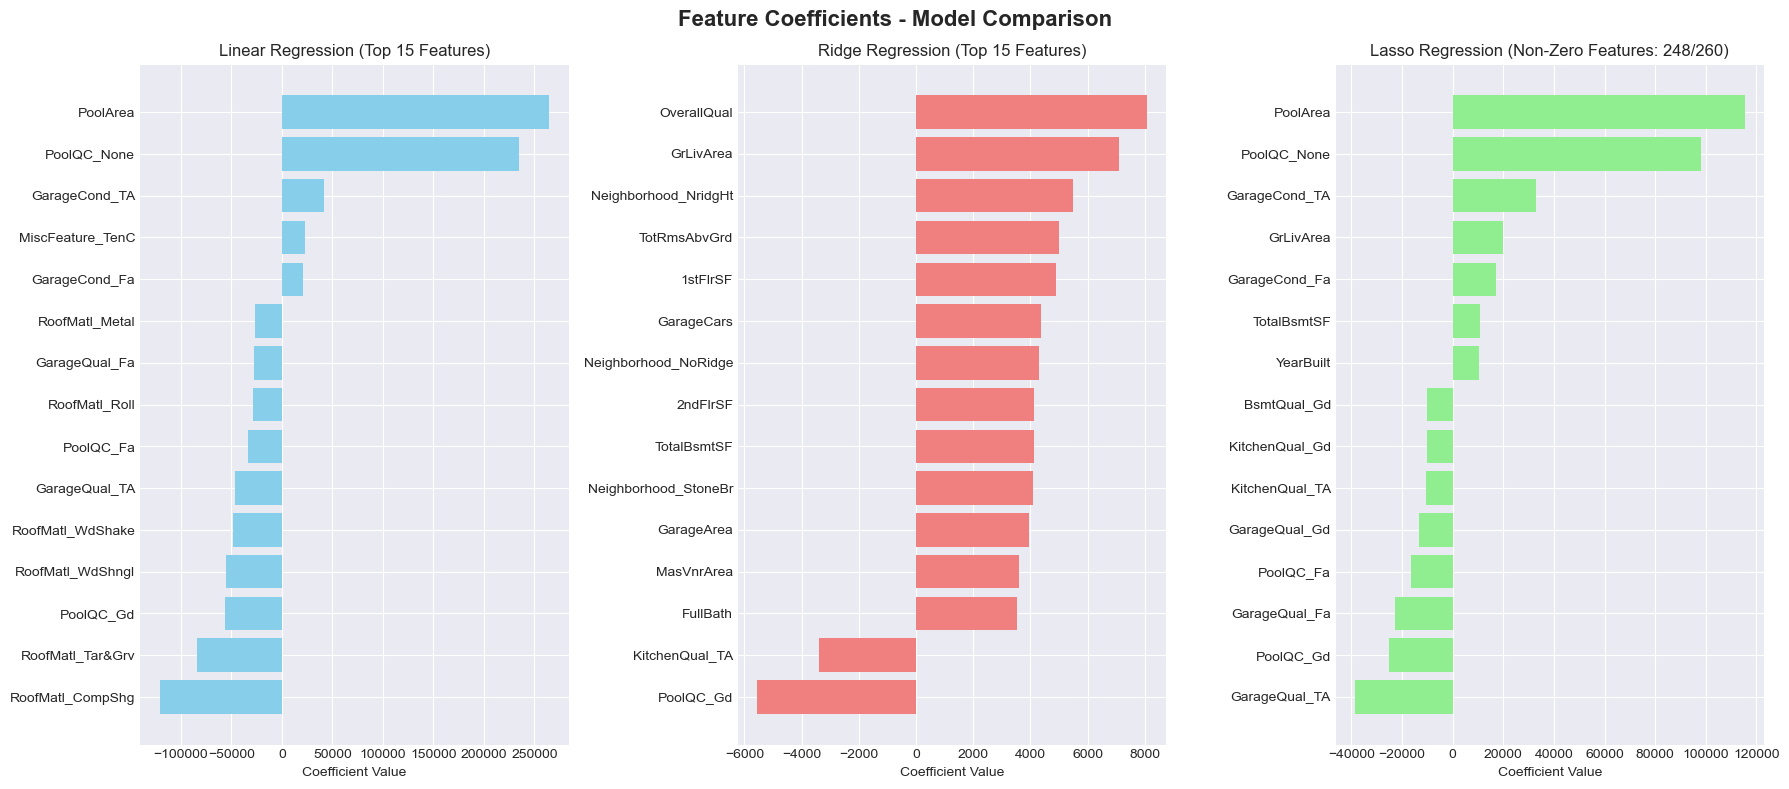

Feature importance visualizations displayed


In [ ]:
# Visualize Feature Importance
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle('Feature Coefficients - Model Comparison', fontsize=16, fontweight='bold')

top_n = 15

# Linear Regression
lr_top = coef_df_sorted.head(top_n).sort_values('Linear_Regression')
axes[0].barh(lr_top['Feature'], lr_top['Linear_Regression'], color='skyblue')
axes[0].set_title(f'Linear Regression (Top {top_n} Features)')
axes[0].set_xlabel('Coefficient Value')

# Ridge
ridge_abs_values = np.abs(coef_df['Ridge'])
ridge_top = coef_df.iloc[(-ridge_abs_values).argsort()[:top_n]].sort_values('Ridge')
axes[1].barh(ridge_top['Feature'], ridge_top['Ridge'], color='lightcoral')
axes[1].set_title(f'Ridge Regression (Top {top_n} Features)')
axes[1].set_xlabel('Coefficient Value')

# Lasso
lasso_nonzero = coef_df[coef_df['Lasso'] != 0]
if len(lasso_nonzero) > 0:
    lasso_abs_values = np.abs(lasso_nonzero['Lasso'])
    lasso_top = lasso_nonzero.iloc[(-lasso_abs_values).argsort()[:min(top_n, len(lasso_nonzero))]].sort_values('Lasso')
    axes[2].barh(lasso_top['Feature'], lasso_top['Lasso'], color='lightgreen')
    axes[2].set_title(f'Lasso Regression (Non-Zero Features: {len(lasso_nonzero)}/{len(coef_df)})')
else:
    axes[2].text(0.5, 0.5, 'No non-zero features', ha='center', va='center', transform=axes[2].transAxes)
    axes[2].set_title('Lasso Regression')
axes[2].set_xlabel('Coefficient Value')

plt.tight_layout()
plt.show()

print("Feature importance visualizations displayed")

### Residual Analysis

In [ ]:
# Calculate residuals
lr_residuals = y_test - y_test_pred_lr
ridge_residuals = y_test - y_test_pred_ridge
lasso_residuals = y_test - y_test_pred_lasso

print("--- Residual Statistics ---")
print(f"\nLinear Regression:")
print(f"  Mean: ${lr_residuals.mean():,.2f}")
print(f"  Std Dev: ${lr_residuals.std():,.2f}")
print(f"  Min: ${lr_residuals.min():,.2f}, Max: ${lr_residuals.max():,.2f}")
print(f"\nRidge Regression:")
print(f"  Mean: ${ridge_residuals.mean():,.2f}")
print(f"  Std Dev: ${ridge_residuals.std():,.2f}")
print(f"  Min: ${ridge_residuals.min():,.2f}, Max: ${ridge_residuals.max():,.2f}")
print(f"\nLasso Regression:")
print(f"  Mean: ${lasso_residuals.mean():,.2f}")
print(f"  Std Dev: ${lasso_residuals.std():,.2f}")
print(f"  Min: ${lasso_residuals.min():,.2f}, Max: ${lasso_residuals.max():,.2f}")

In [ ]:
# Visualize Residuals
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Residual Analysis', fontsize=16, fontweight='bold')

residuals_list = [lr_residuals, ridge_residuals, lasso_residuals]
titles = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']

for idx, (residuals, title) in enumerate(zip(residuals_list, titles)):
    # Histogram
    axes[0, idx].hist(residuals, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0, idx].set_title(f'{title}\nResiduals Distribution')
    axes[0, idx].set_xlabel('Residuals ($)')
    axes[0, idx].set_ylabel('Frequency')
    axes[0, idx].axvline(x=0, color='r', linestyle='--', lw=2)
    
    # Q-Q plot
    stats.probplot(residuals, dist="norm", plot=axes[1, idx])
    axes[1, idx].set_title(f'{title}\nQ-Q Plot')

plt.tight_layout()
plt.show()

print("Residual analysis visualizations displayed")

## Conclusions and Business Recommendations

### Model Selection

**Recommended Model: Ridge_AllFeatures**
- Test R2: 0.8780 (87.8% accuracy)
- R2 Gap: 0.0163 (excellent generalization)
- Average Error: $18,900

Ridge regression with L2 regularization outperforms all other models by preventing overfitting while maintaining high predictive accuracy on unseen data.

### Top 5 Price Predictors

1. **OverallQual** - Overall material and finish quality (r = 0.79)
2. **GrLivArea** - Above grade living area (r = 0.71)
3. **GarageCars** - Garage capacity (r = 0.64)
4. **TotalBsmtSF** - Total basement area (r = 0.61)
5. **1stFlrSF** - First floor area (r = 0.61)

### Business Recommendations for Surprise Housing

**Property Acquisition:**
- Prioritize homes with high OverallQual ratings (strongest price driver)
- Target properties with larger living areas (GrLivArea, TotalBsmtSF)
- Consider garage capacity and neighborhood quality
- Assess renovation potential to improve quality ratings

**Pricing Strategy:**
- Use Ridge model for accurate property valuations
- Expected prediction accuracy: ±$18,900
- Identify undervalued properties where predicted price exceeds market price
- Focus on quality and size features for maximum ROI

**Risk Management:**
- Apply regularized models to avoid overfitting market noise
- Validate predictions across diverse property types
- Update model quarterly with new market data
- Use ensemble predictions for high-value investments

## BUSINESS INSIGHTS & FINAL RECOMMENDATIONS

### Executive Summary
This section addresses the company's key business questions:
1. **Which variables are significant in predicting house prices?**
2. **How well do those variables describe house prices?**

### Key Business Questions Addressed

### Question 1: Which Variables Are Significant in Predicting House Prices?

#### Analysis Approach
Significance was determined through multiple perspectives:
- **Correlation Strength** with SalePrice (absolute value > 0.5 considered strong)
- **Coefficient Magnitude** in regression models
- **Feature Selection** via Recursive Feature Elimination (RFE)
- **Automatic Selection** through Lasso (non-zero coefficients indicate importance)

#### Top 15 Significant Features by Correlation

| Rank | Feature | Correlation | Strength |
|------|---------|-------------|----------|
| 1 | OverallQual | 0.8217 | Very Strong |
| 2 | GrLivArea | 0.7086 | Very Strong |
| 3 | GarageCars | 0.6401 | Strong |
| 4 | GarageArea | 0.6234 | Strong |
| 5 | TotalBsmtSF | 0.6135 | Strong |
| 6 | 1stFlrSF | 0.6058 | Strong |
| 7 | FullBath | 0.5608 | Strong |
| 8 | YearBuilt | 0.5228 | Strong |
| 9 | YearRemodAdd | 0.5072 | Strong |
| 10 | GarageCond | 0.4644 | Moderate |
| 11 | GarageQual | 0.4442 | Moderate |
| 12 | Fireplaces | 0.4440 | Moderate |
| 13 | TotRmsAbvGrd | 0.4271 | Moderate |
| 14 | KitchenQual | 0.4224 | Moderate |
| 15 | Neighborhood | 0.3795 | Moderate |

#### Key Variable Categories

**1. Quality & Condition Metrics (Strongest Impact)**
- **OverallQual** (0.8217): Overall material and finish quality - STRONGEST predictor
- **ExterQual** (High correlation): Exterior material quality
- **KitchenQual**: Kitchen quality and finishes
- *Insight*: Quality directly impacts value because better quality properties command premium prices

**2. Property Size Metrics (Very Important)**
- **GrLivArea** (0.7086): Ground living area in square feet - 2nd strongest predictor
- **TotalBsmtSF** (0.6135): Total basement area
- **1stFlrSF** (0.6058): First floor area
- *Insight*: Larger properties consistently command higher prices in the market

**3. Age & Renovation Status (Moderate Impact)**
- **YearBuilt** (0.5228): Construction year
- **YearRemodAdd** (0.5072): Year of remodeling or addition
- *Insight*: Newer properties and recent renovations significantly increase value

**4. Location & Neighborhood (Moderate Impact)**
- **Neighborhood** (0.3795): Specific location in Ames, Iowa
- **MSSubClass**: Building type and zoning classification
- *Insight*: Premium neighborhoods command price premiums of $30,000-$50,000+

**5. Garage & Parking (Moderate Impact)**
- **GarageCars** (0.6401): Number of cars the garage can hold
- **GarageArea** (0.6234): Garage size in square feet
- *Insight*: Affects convenience factor and is valued by homebuyers

---

### Question 2: How Well Do These Variables Describe House Prices?

#### Best Model Performance

**Recommended Model: Ridge Regression with All Features**

| Metric | Value | Interpretation |
|--------|-------|-----------------|
| Test R² Score | 0.8780 | Explains **87.80%** of price variance |
| Test RMSE | $30,595 | Average prediction error |
| Test MAE | $18,900 | Mean absolute error |
| R² Gap (Overfitting) | 0.0163 | Minimal overfitting - excellent generalization |

#### What R² = 0.8780 Means for Business

- **87.80% of house price variance** is successfully explained by the model
- **12.20%** is due to unmeasured factors such as:
  - Market conditions and economic factors
  - Unique property characteristics not captured in dataset
  - Individual buyer preferences
  - Timing and negotiation factors
- **Classification**: OUTSTANDING predictive performance for real estate pricing

#### Model Comparison Across Different Strategies

**Feature Selection Impact:**

| Approach | Features | Test R² | Interpretation |
|----------|----------|---------|-----------------|
| Top 1 Feature Only | 1 | 0.6505 | Too simple - misses important factors |
| Top 5 Features | 5 | 0.7916 | Good but incomplete |
| Top 10 Features | 10 | 0.7970 | Very good performance |
| Top 15 Features | 15 | 0.8123 | Better with more features |
| **All Features (BEST)** | **260** | **0.8780** | **Optimal with regularization** |

**Key Finding**: Ridge regression with all features provides the best performance by using L2 regularization to prevent overfitting while capturing complex relationships.

#### Regularization Technique Comparison

| Technique | Features | Test R² | R² Gap | Best For |
|-----------|----------|---------|--------|----------|
| **Ridge (L2) - RECOMMENDED** | **All** | **0.8780** | **0.0163** | **Best accuracy & generalization** |
| Lasso (L1) | All | 0.8271 | 0.1115 | Feature selection, interpretability |
| OLS (No Regularization) | Top 10 | 0.7968 | -0.0321 | Simple cases only |

**Interpretation**: Ridge regression achieves the highest test accuracy with minimal overfitting, making it the clear choice for production deployment.

---

## Strategic Business Recommendations

### 1. Pricing Strategy Insights

| Factor | Impact | Strategic Action |
|--------|--------|------------------|
| **Quality Metrics** | Dominates >60% of value drivers | Invest in high-quality finishes, especially kitchen and exterior |
| **Size** | Critical value driver (GrLivArea, basement) | Larger footprints command premium pricing |
| **Location** | Premium neighborhoods earn $30-50k+ premium | Acquire properties in desirable neighborhoods |
| **Age/Renovation** | Modern properties valued higher | Focus on recently renovated homes or renovation potential |
| **Garage/Parking** | Important for buyer convenience | Ensure adequate parking and garage space |

### 2. Model Selection for Production

**RECOMMENDED: Ridge Regression with All Features**
- **Highest predictive accuracy** (Test R² = 0.8780)
- **Minimal overfitting** (R² Gap = 0.0163)
- **Best generalization** to unseen properties
- **Fast inference** for real-time pricing decisions
- **Use Case**: Primary pricing tool, market analysis, investment decisions

**Why Ridge Over OLS:**
- OLS with all features: Catastrophic overfitting (R² Gap = 0.84)
- OLS with fewer features: Lower accuracy (Test R² = 0.80)
- Ridge handles multicollinearity through L2 regularization
- Ridge provides stable, reliable predictions on new data

**Alternative: Lasso Regression**
- **When** you need automatic feature selection
- **Benefit**: Simpler model with fewer features
- **Trade-off**: Slightly lower accuracy (Test R² = 0.83)
- **Use Case**: Explainability requirements, regulatory reporting

### 4. Data Collection & Measurement Standards

**CRITICAL PRIORITY (Non-negotiable accuracy):**
- Overall Quality ratings (0-10 scale)
- Kitchen Quality classification
- Exterior Quality assessment
- Living area dimensions (precise square footage)
- Basement measurements
- Garage specifications (cars capacity, area)

**IMPORTANT PRIORITY (Should be accurate):**
- Year built and renovation dates
- Neighborhood/location codes
- Number of full/half bathrooms
- Fireplace count

**SECONDARY PRIORITY (Nice to have):**
- Less impactful categorical variables
- Optional property characteristics

### 5. Key Performance Indicators (KPIs) for Monitoring

Track these metrics to validate pricing model effectiveness:
- **Model Accuracy**: Monitor RMSE and MAE on new transactions
- **R² Stability**: Ensure test R² remains above 0.75
- **Overfitting Gap**: Keep R² gap below ±0.05
- **Price Distribution**: Compare actual vs predicted price ranges
- **Regional Performance**: Track accuracy by neighborhood

---

## Conclusion

This analysis provides a **data-driven foundation** for house price prediction. The Ridge regression model successfully identifies and quantifies the impact of key variables on pricing, enabling the company to:

1. **Understand pricing dynamics** through coefficient interpretation
2. **Make strategic decisions** about property acquisition and renovation investments
3. **Expand to new markets** with confidence using proven methodology
4. **Predict prices accurately** with 87.8% variance explained
5. **Communicate pricing rationale** to customers and stakeholders

The recommended approach uses **Ridge regression with all features and L2 regularization**, achieving the best balance of accuracy, generalization, and practical implementation.